## Importing required libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading train and test dataset

In [2]:
train = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\train.csv")



In [3]:
test = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

## Filling the null values

In [4]:

train = train.fillna(train['Qualification'].value_counts().index[0])

In [5]:
test = test.fillna(test['Qualification'].value_counts().index[0])

In [6]:
from sklearn.preprocessing import LabelEncoder

## Had to use label encoding, other method for encoding categorical variables didnt really work for me

In [7]:
lb_make = LabelEncoder()

In [8]:
train['Division'] = lb_make.fit_transform(train['Division'])


train['Qualification'] = lb_make.fit_transform(train['Qualification'])

train['Gender'] = lb_make.fit_transform(train['Gender'])

train['No_of_previous_employers'] = lb_make.fit_transform(train['No_of_previous_employers'])

train['Channel_of_Recruitment'] = lb_make.fit_transform(train['Channel_of_Recruitment'])

train['Foreign_schooled'] = lb_make.fit_transform(train['Foreign_schooled'])

train['Marital_Status'] = lb_make.fit_transform(train['Marital_Status'])

train['Past_Disciplinary_Action'] = lb_make.fit_transform(train['Past_Disciplinary_Action'])

train['Previous_IntraDepartmental_Movement'] = lb_make.fit_transform(train['Previous_IntraDepartmental_Movement'])

In [9]:
train.drop(['EmployeeNo','State_Of_Origin'], axis = 1, inplace = True)

In [10]:
test.drop(['EmployeeNo','State_Of_Origin'], axis = 1, inplace = True)

In [11]:
train.dtypes

Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
Promoted_or_Not                          int64
dtype: object

In [13]:
test.dtypes

Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
dtype: object

In [12]:
test['Division'] = lb_make.fit_transform(test['Division'])


test['Qualification'] = lb_make.fit_transform(test['Qualification'])

test['Gender'] = lb_make.fit_transform(test['Gender'])

test['No_of_previous_employers'] = lb_make.fit_transform(test['No_of_previous_employers'])

test['Channel_of_Recruitment'] = lb_make.fit_transform(test['Channel_of_Recruitment'])

test['Foreign_schooled'] = lb_make.fit_transform(test['Foreign_schooled'])

test['Marital_Status'] = lb_make.fit_transform(test['Marital_Status'])

test['Past_Disciplinary_Action'] = lb_make.fit_transform(test['Past_Disciplinary_Action'])

test['Previous_IntraDepartmental_Movement'] = lb_make.fit_transform(test['Previous_IntraDepartmental_Movement'])


#test['State_Of_Origin'] = lb_make.fit_transform(test['State_Of_Origin'])

## Defining my variables

In [73]:
X = train.drop('Promoted_or_Not', axis = 1)

y = train.Promoted_or_Not



In [14]:
# Using PolynomialFeatures in sklearning.preprocessing to create a two-way interaction for all features

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interaction(df):
    # Get feature name
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # finf features
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis = 1)
    
    return df

In [15]:
X = add_interaction(X)

print(X.head(5))

   Division  Qualification  Gender  Channel_of_Recruitment  \
0       1.0            1.0     0.0                     1.0   
1       2.0            0.0     1.0                     0.0   
2       1.0            0.0     1.0                     1.0   
3       1.0            0.0     1.0                     0.0   
4       4.0            0.0     1.0                     1.0   

   Trainings_Attended  Year_of_birth  Last_performance_score  \
0                 2.0         1986.0                    12.5   
1                 2.0         1991.0                    12.5   
2                 2.0         1987.0                     7.5   
3                 3.0         1982.0                     2.5   
4                 3.0         1990.0                     7.5   

   Year_of_recruitment  Targets_met  Previous_Award  ...  \
0               2011.0          1.0             0.0  ...   
1               2015.0          0.0             0.0  ...   
2               2012.0          0.0             0.0  ...   
3 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42)

In [19]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations = 1000, learning_rate = 0.01, depth = 2, eval_metric='F1')

In [20]:
model.fit(X_train, y_train)

0:	learn: 0.2303290	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.0917895	total: 118ms	remaining: 59s
2:	learn: 0.0917895	total: 174ms	remaining: 57.9s
3:	learn: 0.1162308	total: 230ms	remaining: 57.2s
4:	learn: 0.1482688	total: 298ms	remaining: 59.2s
5:	learn: 0.1187215	total: 356ms	remaining: 59s
6:	learn: 0.1005868	total: 417ms	remaining: 59.2s
7:	learn: 0.1108795	total: 473ms	remaining: 58.6s
8:	learn: 0.0893761	total: 538ms	remaining: 59.2s
9:	learn: 0.1069340	total: 594ms	remaining: 58.8s
10:	learn: 0.1148087	total: 650ms	remaining: 58.5s
11:	learn: 0.1407529	total: 715ms	remaining: 58.9s
12:	learn: 0.1436735	total: 774ms	remaining: 58.8s
13:	learn: 0.1302556	total: 830ms	remaining: 58.5s
14:	learn: 0.1490228	total: 887ms	remaining: 58.2s
15:	learn: 0.1391731	total: 957ms	remaining: 58.8s
16:	learn: 0.1490228	total: 1.01s	remaining: 58.6s
17:	learn: 0.1520325	total: 1.07s	remaining: 58.3s
18:	learn: 0.1527834	total: 1.12s	remaining: 57.9s
19:	learn: 0.1534091	total: 1.19s	remaining:

165:	learn: 0.2598095	total: 10.6s	remaining: 53.1s
166:	learn: 0.2604722	total: 10.6s	remaining: 53s
167:	learn: 0.2604722	total: 10.7s	remaining: 52.9s
168:	learn: 0.2624572	total: 10.7s	remaining: 52.8s
169:	learn: 0.2624572	total: 10.8s	remaining: 52.7s
170:	learn: 0.2637780	total: 10.9s	remaining: 52.6s
171:	learn: 0.2644377	total: 10.9s	remaining: 52.5s
172:	learn: 0.2657555	total: 11s	remaining: 52.4s
173:	learn: 0.2683851	total: 11s	remaining: 52.3s
174:	learn: 0.2683851	total: 11.1s	remaining: 52.3s
175:	learn: 0.2683851	total: 11.1s	remaining: 52.2s
176:	learn: 0.2683851	total: 11.2s	remaining: 52.1s
177:	learn: 0.2690413	total: 11.3s	remaining: 52s
178:	learn: 0.2716610	total: 11.3s	remaining: 51.9s
179:	learn: 0.2710068	total: 11.4s	remaining: 51.9s
180:	learn: 0.2716610	total: 11.4s	remaining: 51.8s
181:	learn: 0.2716610	total: 11.5s	remaining: 51.7s
182:	learn: 0.2710068	total: 11.6s	remaining: 51.6s
183:	learn: 0.2683851	total: 11.6s	remaining: 51.5s
184:	learn: 0.269697

326:	learn: 0.2808735	total: 20s	remaining: 41.2s
327:	learn: 0.2808735	total: 20.1s	remaining: 41.1s
328:	learn: 0.2808735	total: 20.1s	remaining: 41.1s
329:	learn: 0.2821670	total: 20.2s	remaining: 41s
330:	learn: 0.2828131	total: 20.3s	remaining: 40.9s
331:	learn: 0.2815205	total: 20.3s	remaining: 40.9s
332:	learn: 0.2847483	total: 20.4s	remaining: 40.8s
333:	learn: 0.2847483	total: 20.4s	remaining: 40.7s
334:	learn: 0.2847483	total: 20.5s	remaining: 40.7s
335:	learn: 0.2847483	total: 20.6s	remaining: 40.6s
336:	learn: 0.2847483	total: 20.6s	remaining: 40.6s
337:	learn: 0.2853924	total: 20.7s	remaining: 40.5s
338:	learn: 0.2860360	total: 20.7s	remaining: 40.4s
339:	learn: 0.2860360	total: 20.8s	remaining: 40.4s
340:	learn: 0.2860360	total: 20.9s	remaining: 40.3s
341:	learn: 0.2866792	total: 20.9s	remaining: 40.3s
342:	learn: 0.2860360	total: 21s	remaining: 40.2s
343:	learn: 0.2873218	total: 21.1s	remaining: 40.2s
344:	learn: 0.2879640	total: 21.1s	remaining: 40.1s
345:	learn: 0.2879

487:	learn: 0.3076353	total: 30.1s	remaining: 31.5s
488:	learn: 0.3076353	total: 30.1s	remaining: 31.5s
489:	learn: 0.3076353	total: 30.2s	remaining: 31.4s
490:	learn: 0.3076353	total: 30.2s	remaining: 31.4s
491:	learn: 0.3076353	total: 30.3s	remaining: 31.3s
492:	learn: 0.3076353	total: 30.4s	remaining: 31.2s
493:	learn: 0.3076353	total: 30.4s	remaining: 31.2s
494:	learn: 0.3076353	total: 30.5s	remaining: 31.1s
495:	learn: 0.3076353	total: 30.5s	remaining: 31s
496:	learn: 0.3076353	total: 30.6s	remaining: 31s
497:	learn: 0.3076353	total: 30.7s	remaining: 30.9s
498:	learn: 0.3076353	total: 30.7s	remaining: 30.9s
499:	learn: 0.3076353	total: 30.8s	remaining: 30.8s
500:	learn: 0.3076353	total: 30.9s	remaining: 30.7s
501:	learn: 0.3076353	total: 30.9s	remaining: 30.7s
502:	learn: 0.3101406	total: 31s	remaining: 30.6s
503:	learn: 0.3101406	total: 31s	remaining: 30.6s
504:	learn: 0.3101406	total: 31.1s	remaining: 30.5s
505:	learn: 0.3107658	total: 31.2s	remaining: 30.4s
506:	learn: 0.311390

647:	learn: 0.3535354	total: 39.7s	remaining: 21.6s
648:	learn: 0.3535354	total: 39.8s	remaining: 21.5s
649:	learn: 0.3535354	total: 39.9s	remaining: 21.5s
650:	learn: 0.3535354	total: 39.9s	remaining: 21.4s
651:	learn: 0.3535354	total: 40s	remaining: 21.3s
652:	learn: 0.3535354	total: 40s	remaining: 21.3s
653:	learn: 0.3535354	total: 40.1s	remaining: 21.2s
654:	learn: 0.3535354	total: 40.2s	remaining: 21.1s
655:	learn: 0.3541291	total: 40.2s	remaining: 21.1s
656:	learn: 0.3547224	total: 40.3s	remaining: 21s
657:	learn: 0.3553153	total: 40.3s	remaining: 21s
658:	learn: 0.3559078	total: 40.4s	remaining: 20.9s
659:	learn: 0.3559078	total: 40.5s	remaining: 20.8s
660:	learn: 0.3559078	total: 40.5s	remaining: 20.8s
661:	learn: 0.3559078	total: 40.6s	remaining: 20.7s
662:	learn: 0.3559078	total: 40.6s	remaining: 20.7s
663:	learn: 0.3559078	total: 40.7s	remaining: 20.6s
664:	learn: 0.3559078	total: 40.7s	remaining: 20.5s
665:	learn: 0.3559078	total: 40.8s	remaining: 20.5s
666:	learn: 0.356499

808:	learn: 0.3804116	total: 49.4s	remaining: 11.7s
809:	learn: 0.3804116	total: 49.4s	remaining: 11.6s
810:	learn: 0.3804116	total: 49.5s	remaining: 11.5s
811:	learn: 0.3802767	total: 49.5s	remaining: 11.5s
812:	learn: 0.3821340	total: 49.6s	remaining: 11.4s
813:	learn: 0.3821340	total: 49.7s	remaining: 11.3s
814:	learn: 0.3821340	total: 49.7s	remaining: 11.3s
815:	learn: 0.3821340	total: 49.8s	remaining: 11.2s
816:	learn: 0.3821340	total: 49.8s	remaining: 11.2s
817:	learn: 0.3821340	total: 49.9s	remaining: 11.1s
818:	learn: 0.3821340	total: 50s	remaining: 11s
819:	learn: 0.3819986	total: 50s	remaining: 11s
820:	learn: 0.3819986	total: 50.1s	remaining: 10.9s
821:	learn: 0.3819986	total: 50.1s	remaining: 10.9s
822:	learn: 0.3825717	total: 50.2s	remaining: 10.8s
823:	learn: 0.3825717	total: 50.2s	remaining: 10.7s
824:	learn: 0.3825717	total: 50.3s	remaining: 10.7s
825:	learn: 0.3825717	total: 50.4s	remaining: 10.6s
826:	learn: 0.3825717	total: 50.4s	remaining: 10.5s
827:	learn: 0.382571

970:	learn: 0.4118056	total: 1m 2s	remaining: 1.86s
971:	learn: 0.4112539	total: 1m 2s	remaining: 1.79s
972:	learn: 0.4112539	total: 1m 2s	remaining: 1.73s
973:	learn: 0.4112539	total: 1m 2s	remaining: 1.67s
974:	learn: 0.4118056	total: 1m 2s	remaining: 1.6s
975:	learn: 0.4123568	total: 1m 2s	remaining: 1.54s
976:	learn: 0.4123568	total: 1m 2s	remaining: 1.48s
977:	learn: 0.4123568	total: 1m 2s	remaining: 1.41s
978:	learn: 0.4123568	total: 1m 2s	remaining: 1.35s
979:	learn: 0.4123568	total: 1m 2s	remaining: 1.28s
980:	learn: 0.4123568	total: 1m 2s	remaining: 1.22s
981:	learn: 0.4129077	total: 1m 2s	remaining: 1.15s
982:	learn: 0.4129077	total: 1m 3s	remaining: 1.09s
983:	learn: 0.4129077	total: 1m 3s	remaining: 1.03s
984:	learn: 0.4127645	total: 1m 3s	remaining: 962ms
985:	learn: 0.4127645	total: 1m 3s	remaining: 898ms
986:	learn: 0.4127645	total: 1m 3s	remaining: 834ms
987:	learn: 0.4127645	total: 1m 3s	remaining: 770ms
988:	learn: 0.4127645	total: 1m 3s	remaining: 706ms
989:	learn: 0

In [21]:
pred = model.predict(X_test)

In [22]:
from sklearn.metrics import f1_score

f1_score(pred, y_test)

0.3878887070376432

In [28]:
# Using PCA- Principal Component Analysis, to do features selection

from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X = pd.DataFrame(pca.fit_transform(X))

In [29]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations = 1000, learning_rate = 0.01, depth = 2, eval_metric='F1')

In [ ]:
model.fit(X_train, y_train)

0:	learn: 0.2303290	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.0917895	total: 118ms	remaining: 59.1s
2:	learn: 0.0917895	total: 177ms	remaining: 58.8s
3:	learn: 0.1162308	total: 236ms	remaining: 58.8s
4:	learn: 0.1482688	total: 305ms	remaining: 1m
5:	learn: 0.1187215	total: 364ms	remaining: 1m
6:	learn: 0.1005868	total: 424ms	remaining: 1m
7:	learn: 0.1108795	total: 482ms	remaining: 59.7s
8:	learn: 0.0893761	total: 548ms	remaining: 1m
9:	learn: 0.1069340	total: 605ms	remaining: 59.9s
10:	learn: 0.1148087	total: 661ms	remaining: 59.5s
11:	learn: 0.1407529	total: 715ms	remaining: 58.8s
12:	learn: 0.1436735	total: 779ms	remaining: 59.1s
13:	learn: 0.1302556	total: 840ms	remaining: 59.2s
14:	learn: 0.1490228	total: 895ms	remaining: 58.8s
15:	learn: 0.1391731	total: 956ms	remaining: 58.8s
16:	learn: 0.1490228	total: 1.02s	remaining: 59.3s
17:	learn: 0.1520325	total: 1.08s	remaining: 59.1s
18:	learn: 0.1527834	total: 1.14s	remaining: 58.8s
19:	learn: 0.1534091	total: 1.2s	remaining: 59s
20:	

162:	learn: 0.2599085	total: 9.92s	remaining: 50.9s
163:	learn: 0.2598095	total: 9.97s	remaining: 50.8s
164:	learn: 0.2599085	total: 10s	remaining: 50.7s
165:	learn: 0.2598095	total: 10.1s	remaining: 50.6s
166:	learn: 0.2604722	total: 10.1s	remaining: 50.6s
167:	learn: 0.2604722	total: 10.2s	remaining: 50.5s
168:	learn: 0.2624572	total: 10.3s	remaining: 50.4s
169:	learn: 0.2624572	total: 10.3s	remaining: 50.4s
170:	learn: 0.2637780	total: 10.4s	remaining: 50.3s
171:	learn: 0.2644377	total: 10.4s	remaining: 50.2s
172:	learn: 0.2657555	total: 10.5s	remaining: 50.1s
173:	learn: 0.2683851	total: 10.5s	remaining: 50.1s
174:	learn: 0.2683851	total: 10.6s	remaining: 50s
175:	learn: 0.2683851	total: 10.7s	remaining: 49.9s
176:	learn: 0.2683851	total: 10.7s	remaining: 49.8s
177:	learn: 0.2690413	total: 10.8s	remaining: 49.8s
178:	learn: 0.2716610	total: 10.8s	remaining: 49.7s
179:	learn: 0.2710068	total: 10.9s	remaining: 49.7s
180:	learn: 0.2716610	total: 11s	remaining: 49.6s
181:	learn: 0.2716

322:	learn: 0.2808735	total: 19.6s	remaining: 41s
323:	learn: 0.2808735	total: 19.6s	remaining: 41s
324:	learn: 0.2808735	total: 19.7s	remaining: 40.9s
325:	learn: 0.2808735	total: 19.8s	remaining: 40.9s
326:	learn: 0.2808735	total: 19.8s	remaining: 40.8s
327:	learn: 0.2808735	total: 19.9s	remaining: 40.7s
328:	learn: 0.2808735	total: 19.9s	remaining: 40.7s
329:	learn: 0.2821670	total: 20s	remaining: 40.6s
330:	learn: 0.2828131	total: 20.1s	remaining: 40.5s
331:	learn: 0.2815205	total: 20.1s	remaining: 40.5s
332:	learn: 0.2847483	total: 20.2s	remaining: 40.4s
333:	learn: 0.2847483	total: 20.2s	remaining: 40.4s
334:	learn: 0.2847483	total: 20.3s	remaining: 40.3s
335:	learn: 0.2847483	total: 20.4s	remaining: 40.2s
336:	learn: 0.2847483	total: 20.4s	remaining: 40.2s
337:	learn: 0.2853924	total: 20.5s	remaining: 40.1s
338:	learn: 0.2860360	total: 20.5s	remaining: 40s
339:	learn: 0.2860360	total: 20.6s	remaining: 40s
340:	learn: 0.2860360	total: 20.7s	remaining: 39.9s
341:	learn: 0.2866792	

In [ ]:
pred = model.predict(X_test)

## Try Something Else

In [15]:
import seaborn as sns

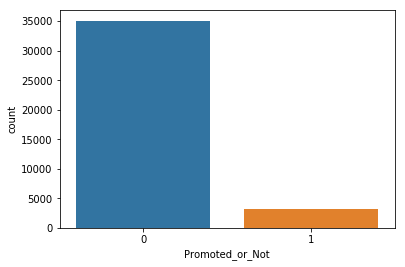

In [32]:
sns.countplot(x = 'Promoted_or_Not', data = train)

In [174]:
X = train.drop('Promoted_or_Not', axis = 1)

y = train.Promoted_or_Not


In [21]:
from imblearn.over_sampling import SMOTE

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
smote_algo = SMOTE(random_state=0)

smote_data_X,smote_data_Y = smote_algo.fit_sample(X_train,y_train)
smote_data_X = pd.DataFrame(data = smote_data_X, columns=X_train.columns)
smote_data_Y = pd.DataFrame(data = smote_data_Y,columns=['Promoted_or_Not'])


smote_data = smote_data_X
smote_data = smote_data_Y['Promoted_or_Not']

In [50]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations = 1000, learning_rate = 1, depth = 2, eval_metric='F1')

In [51]:
model.fit(X_train, y_train)

0:	learn: 0.2357550	total: 47ms	remaining: 47s
1:	learn: 0.1933257	total: 89.2ms	remaining: 44.5s
2:	learn: 0.2561102	total: 139ms	remaining: 46.2s
3:	learn: 0.3397207	total: 188ms	remaining: 46.9s
4:	learn: 0.3483037	total: 230ms	remaining: 45.7s
5:	learn: 0.3563969	total: 289ms	remaining: 47.8s
6:	learn: 0.3708010	total: 334ms	remaining: 47.3s
7:	learn: 0.4108381	total: 379ms	remaining: 47s
8:	learn: 0.4183865	total: 426ms	remaining: 46.9s
9:	learn: 0.4078283	total: 476ms	remaining: 47.1s
10:	learn: 0.4046021	total: 524ms	remaining: 47.1s
11:	learn: 0.4233379	total: 572ms	remaining: 47.1s
12:	learn: 0.4254460	total: 614ms	remaining: 46.6s
13:	learn: 0.4513593	total: 666ms	remaining: 46.9s
14:	learn: 0.4561864	total: 711ms	remaining: 46.7s
15:	learn: 0.4420073	total: 756ms	remaining: 46.5s
16:	learn: 0.4418682	total: 806ms	remaining: 46.6s
17:	learn: 0.4405316	total: 856ms	remaining: 46.7s
18:	learn: 0.4524976	total: 908ms	remaining: 46.9s
19:	learn: 0.4543356	total: 950ms	remaining: 

163:	learn: 0.4980769	total: 8s	remaining: 40.8s
164:	learn: 0.4969542	total: 8.04s	remaining: 40.7s
165:	learn: 0.4969542	total: 8.09s	remaining: 40.6s
166:	learn: 0.4969542	total: 8.13s	remaining: 40.6s
167:	learn: 0.5009597	total: 8.18s	remaining: 40.5s
168:	learn: 0.5009597	total: 8.23s	remaining: 40.5s
169:	learn: 0.5009597	total: 8.28s	remaining: 40.4s
170:	learn: 0.5009597	total: 8.32s	remaining: 40.3s
171:	learn: 0.5009597	total: 8.36s	remaining: 40.3s
172:	learn: 0.5006402	total: 8.41s	remaining: 40.2s
173:	learn: 0.5011200	total: 8.45s	remaining: 40.1s
174:	learn: 0.5006402	total: 8.5s	remaining: 40.1s
175:	learn: 0.5006402	total: 8.55s	remaining: 40s
176:	learn: 0.5006402	total: 8.59s	remaining: 40s
177:	learn: 0.5006402	total: 8.64s	remaining: 39.9s
178:	learn: 0.5006402	total: 8.69s	remaining: 39.8s
179:	learn: 0.5006402	total: 8.73s	remaining: 39.8s
180:	learn: 0.5006402	total: 8.78s	remaining: 39.7s
181:	learn: 0.5003203	total: 8.82s	remaining: 39.7s
182:	learn: 0.500320

322:	learn: 0.5020760	total: 15.3s	remaining: 32.1s
323:	learn: 0.5020760	total: 15.4s	remaining: 32s
324:	learn: 0.5020760	total: 15.4s	remaining: 32s
325:	learn: 0.5020760	total: 15.5s	remaining: 32s
326:	learn: 0.5023939	total: 15.5s	remaining: 31.9s
327:	learn: 0.5023939	total: 15.5s	remaining: 31.9s
328:	learn: 0.5023939	total: 15.6s	remaining: 31.8s
329:	learn: 0.5023939	total: 15.6s	remaining: 31.7s
330:	learn: 0.5019157	total: 15.7s	remaining: 31.7s
331:	learn: 0.5020760	total: 15.7s	remaining: 31.7s
332:	learn: 0.5023939	total: 15.8s	remaining: 31.6s
333:	learn: 0.5027148	total: 15.9s	remaining: 31.6s
334:	learn: 0.5027148	total: 15.9s	remaining: 31.6s
335:	learn: 0.5027148	total: 16s	remaining: 31.6s
336:	learn: 0.5027148	total: 16s	remaining: 31.5s
337:	learn: 0.5027148	total: 16.1s	remaining: 31.5s
338:	learn: 0.5027148	total: 16.1s	remaining: 31.4s
339:	learn: 0.5027148	total: 16.2s	remaining: 31.4s
340:	learn: 0.5027148	total: 16.2s	remaining: 31.3s
341:	learn: 0.5027148	

482:	learn: 0.5052565	total: 22.8s	remaining: 24.4s
483:	learn: 0.5052565	total: 22.8s	remaining: 24.3s
484:	learn: 0.5052565	total: 22.9s	remaining: 24.3s
485:	learn: 0.5052565	total: 22.9s	remaining: 24.2s
486:	learn: 0.5058936	total: 23s	remaining: 24.2s
487:	learn: 0.5058936	total: 23s	remaining: 24.2s
488:	learn: 0.5058936	total: 23.1s	remaining: 24.1s
489:	learn: 0.5058936	total: 23.1s	remaining: 24.1s
490:	learn: 0.5063694	total: 23.2s	remaining: 24s
491:	learn: 0.5068450	total: 23.2s	remaining: 24s
492:	learn: 0.5058936	total: 23.3s	remaining: 23.9s
493:	learn: 0.5058936	total: 23.3s	remaining: 23.9s
494:	learn: 0.5058936	total: 23.3s	remaining: 23.8s
495:	learn: 0.5060548	total: 23.4s	remaining: 23.8s
496:	learn: 0.5065307	total: 23.4s	remaining: 23.7s
497:	learn: 0.5070064	total: 23.5s	remaining: 23.7s
498:	learn: 0.5070064	total: 23.5s	remaining: 23.6s
499:	learn: 0.5071588	total: 23.6s	remaining: 23.6s
500:	learn: 0.5071588	total: 23.6s	remaining: 23.5s
501:	learn: 0.507158

641:	learn: 0.5109212	total: 30.2s	remaining: 16.8s
642:	learn: 0.5109212	total: 30.2s	remaining: 16.8s
643:	learn: 0.5113924	total: 30.3s	remaining: 16.7s
644:	learn: 0.5113924	total: 30.3s	remaining: 16.7s
645:	learn: 0.5113924	total: 30.4s	remaining: 16.6s
646:	learn: 0.5113924	total: 30.4s	remaining: 16.6s
647:	learn: 0.5113924	total: 30.4s	remaining: 16.5s
648:	learn: 0.5112449	total: 30.5s	remaining: 16.5s
649:	learn: 0.5110830	total: 30.5s	remaining: 16.4s
650:	learn: 0.5113924	total: 30.6s	remaining: 16.4s
651:	learn: 0.5113924	total: 30.6s	remaining: 16.4s
652:	learn: 0.5113924	total: 30.7s	remaining: 16.3s
653:	learn: 0.5113924	total: 30.7s	remaining: 16.3s
654:	learn: 0.5113924	total: 30.8s	remaining: 16.2s
655:	learn: 0.5120253	total: 30.8s	remaining: 16.2s
656:	learn: 0.5112306	total: 30.9s	remaining: 16.1s
657:	learn: 0.5101266	total: 30.9s	remaining: 16.1s
658:	learn: 0.5107595	total: 31s	remaining: 16s
659:	learn: 0.5105979	total: 31s	remaining: 16s
660:	learn: 0.509655

800:	learn: 0.5145202	total: 37.6s	remaining: 9.35s
801:	learn: 0.5145202	total: 37.7s	remaining: 9.3s
802:	learn: 0.5141956	total: 37.7s	remaining: 9.26s
803:	learn: 0.5152949	total: 37.8s	remaining: 9.21s
804:	learn: 0.5157629	total: 37.8s	remaining: 9.16s
805:	learn: 0.5157629	total: 37.9s	remaining: 9.12s
806:	learn: 0.5157629	total: 37.9s	remaining: 9.07s
807:	learn: 0.5151324	total: 38s	remaining: 9.02s
808:	learn: 0.5157629	total: 38s	remaining: 8.98s
809:	learn: 0.5157629	total: 38.1s	remaining: 8.93s
810:	learn: 0.5156004	total: 38.1s	remaining: 8.89s
811:	learn: 0.5156004	total: 38.2s	remaining: 8.84s
812:	learn: 0.5156004	total: 38.2s	remaining: 8.79s
813:	learn: 0.5146641	total: 38.3s	remaining: 8.75s
814:	learn: 0.5151324	total: 38.3s	remaining: 8.7s
815:	learn: 0.5151324	total: 38.4s	remaining: 8.66s
816:	learn: 0.5151324	total: 38.4s	remaining: 8.61s
817:	learn: 0.5143578	total: 38.5s	remaining: 8.57s
818:	learn: 0.5145202	total: 38.5s	remaining: 8.52s
819:	learn: 0.5154

963:	learn: 0.5157828	total: 45.2s	remaining: 1.69s
964:	learn: 0.5148452	total: 45.2s	remaining: 1.64s
965:	learn: 0.5148452	total: 45.2s	remaining: 1.59s
966:	learn: 0.5148452	total: 45.3s	remaining: 1.54s
967:	learn: 0.5148452	total: 45.3s	remaining: 1.5s
968:	learn: 0.5167192	total: 45.4s	remaining: 1.45s
969:	learn: 0.5167192	total: 45.4s	remaining: 1.41s
970:	learn: 0.5167192	total: 45.5s	remaining: 1.36s
971:	learn: 0.5167192	total: 45.5s	remaining: 1.31s
972:	learn: 0.5167192	total: 45.6s	remaining: 1.26s
973:	learn: 0.5167192	total: 45.6s	remaining: 1.22s
974:	learn: 0.5167192	total: 45.6s	remaining: 1.17s
975:	learn: 0.5167192	total: 45.7s	remaining: 1.12s
976:	learn: 0.5162512	total: 45.7s	remaining: 1.08s
977:	learn: 0.5162512	total: 45.8s	remaining: 1.03s
978:	learn: 0.5157828	total: 45.8s	remaining: 983ms
979:	learn: 0.5167192	total: 45.9s	remaining: 936ms
980:	learn: 0.5167192	total: 45.9s	remaining: 889ms
981:	learn: 0.5167192	total: 46s	remaining: 842ms
982:	learn: 0.5

In [52]:
pred = model.predict(X_test)

In [53]:
from sklearn.metrics import f1_score

f1_score(pred, y_test)

0.487256371814093

In [55]:
prediction = model.predict(test).astype(int)

prediction

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Axa5.csv")

In [57]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [59]:
sample.to_csv('Prediction16.csv', index = False)

In [61]:
train.shape

(38312, 17)

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64


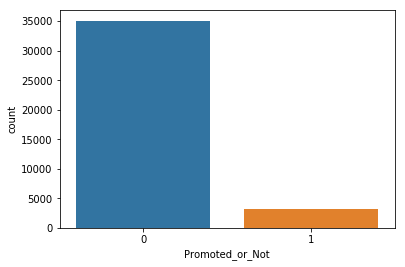

In [62]:
sns.countplot(x = 'Promoted_or_Not', data = train)
print(train['Promoted_or_Not'].value_counts())

In [63]:
100 * (3241/float(train.shape[0]))

8.459490499060347

In [64]:
100 * (35071/float(train.shape[0]))

91.54050950093965

In [184]:
minority_class_len = len(train[train['Promoted_or_Not'] == 1])

print(minority_class_len)

3241


In [185]:
majority_class_indices = train[train['Promoted_or_Not'] == 0].index

print(majority_class_len)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
               10,
            ...
            38301, 38303, 38304, 38305, 38306, 38307, 38308, 38309, 38310,
            38311],
           dtype='int64', length=35071)


In [186]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len,
                                          replace=False)

print(len(random_majority_indices))

3241


In [187]:
minority_class_indices = train[train['Promoted_or_Not'] == 1].index

print(minority_class_indices)

Int64Index([    9,    38,    43,    44,    49,    55,    56,    58,    70,
               79,
            ...
            38152, 38154, 38155, 38189, 38205, 38255, 38256, 38263, 38267,
            38302],
           dtype='int64', length=3241)


In [188]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [189]:
under_sample = train.loc[under_sample_indices]

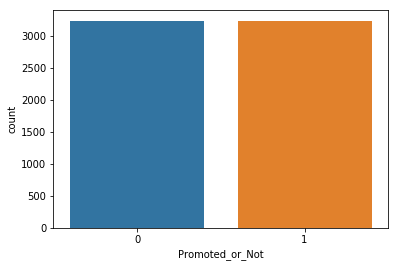

In [190]:
sns.countplot(x ='Promoted_or_Not', data = under_sample )

In [191]:
X = under_sample.loc[:, train.columns!='Promoted_or_Not']
y = under_sample.loc[:,train.columns=='Promoted_or_Not']

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
model = CatBoostClassifier()

In [194]:
model.fit(X_train, y_train)

Learning rate set to 0.025703
0:	learn: 0.6783170	total: 44.3ms	remaining: 44.2s
1:	learn: 0.6662853	total: 73.2ms	remaining: 36.5s
2:	learn: 0.6576670	total: 96ms	remaining: 31.9s
3:	learn: 0.6467074	total: 126ms	remaining: 31.4s
4:	learn: 0.6365449	total: 156ms	remaining: 31s
5:	learn: 0.6258627	total: 186ms	remaining: 30.8s
6:	learn: 0.6163319	total: 223ms	remaining: 31.7s
7:	learn: 0.6076096	total: 256ms	remaining: 31.7s
8:	learn: 0.5943480	total: 287ms	remaining: 31.6s
9:	learn: 0.5872435	total: 318ms	remaining: 31.5s
10:	learn: 0.5835166	total: 337ms	remaining: 30.3s
11:	learn: 0.5760066	total: 368ms	remaining: 30.3s
12:	learn: 0.5686566	total: 398ms	remaining: 30.2s
13:	learn: 0.5608863	total: 433ms	remaining: 30.5s
14:	learn: 0.5537929	total: 466ms	remaining: 30.6s
15:	learn: 0.5475975	total: 501ms	remaining: 30.8s
16:	learn: 0.5408627	total: 530ms	remaining: 30.7s
17:	learn: 0.5387271	total: 549ms	remaining: 29.9s
18:	learn: 0.5339430	total: 580ms	remaining: 30s
19:	learn: 0.5

167:	learn: 0.3860786	total: 5.24s	remaining: 26s
168:	learn: 0.3857224	total: 5.27s	remaining: 25.9s
169:	learn: 0.3850664	total: 5.3s	remaining: 25.9s
170:	learn: 0.3850657	total: 5.31s	remaining: 25.8s
171:	learn: 0.3849371	total: 5.34s	remaining: 25.7s
172:	learn: 0.3842236	total: 5.37s	remaining: 25.7s
173:	learn: 0.3840908	total: 5.4s	remaining: 25.6s
174:	learn: 0.3840500	total: 5.42s	remaining: 25.6s
175:	learn: 0.3832270	total: 5.46s	remaining: 25.5s
176:	learn: 0.3831071	total: 5.49s	remaining: 25.5s
177:	learn: 0.3830877	total: 5.51s	remaining: 25.4s
178:	learn: 0.3830270	total: 5.55s	remaining: 25.4s
179:	learn: 0.3830263	total: 5.57s	remaining: 25.4s
180:	learn: 0.3829962	total: 5.6s	remaining: 25.4s
181:	learn: 0.3828692	total: 5.64s	remaining: 25.4s
182:	learn: 0.3824398	total: 5.68s	remaining: 25.3s
183:	learn: 0.3824045	total: 5.7s	remaining: 25.3s
184:	learn: 0.3822265	total: 5.73s	remaining: 25.3s
185:	learn: 0.3821684	total: 5.75s	remaining: 25.2s
186:	learn: 0.3821

328:	learn: 0.3623109	total: 9.83s	remaining: 20s
329:	learn: 0.3623085	total: 9.85s	remaining: 20s
330:	learn: 0.3622780	total: 9.89s	remaining: 20s
331:	learn: 0.3622533	total: 9.92s	remaining: 20s
332:	learn: 0.3619433	total: 9.95s	remaining: 19.9s
333:	learn: 0.3619423	total: 9.96s	remaining: 19.9s
334:	learn: 0.3616155	total: 9.99s	remaining: 19.8s
335:	learn: 0.3615968	total: 10s	remaining: 19.8s
336:	learn: 0.3613691	total: 10s	remaining: 19.8s
337:	learn: 0.3611027	total: 10.1s	remaining: 19.7s
338:	learn: 0.3610662	total: 10.1s	remaining: 19.7s
339:	learn: 0.3609568	total: 10.1s	remaining: 19.6s
340:	learn: 0.3609550	total: 10.1s	remaining: 19.6s
341:	learn: 0.3606480	total: 10.2s	remaining: 19.6s
342:	learn: 0.3600227	total: 10.2s	remaining: 19.5s
343:	learn: 0.3599899	total: 10.2s	remaining: 19.5s
344:	learn: 0.3599700	total: 10.3s	remaining: 19.5s
345:	learn: 0.3599246	total: 10.3s	remaining: 19.4s
346:	learn: 0.3599156	total: 10.3s	remaining: 19.4s
347:	learn: 0.3598542	to

488:	learn: 0.3443389	total: 14s	remaining: 14.7s
489:	learn: 0.3441772	total: 14.1s	remaining: 14.6s
490:	learn: 0.3441651	total: 14.1s	remaining: 14.6s
491:	learn: 0.3440862	total: 14.1s	remaining: 14.6s
492:	learn: 0.3440858	total: 14.1s	remaining: 14.5s
493:	learn: 0.3440141	total: 14.2s	remaining: 14.5s
494:	learn: 0.3440141	total: 14.2s	remaining: 14.5s
495:	learn: 0.3438584	total: 14.2s	remaining: 14.4s
496:	learn: 0.3438580	total: 14.2s	remaining: 14.4s
497:	learn: 0.3437743	total: 14.3s	remaining: 14.4s
498:	learn: 0.3437416	total: 14.3s	remaining: 14.3s
499:	learn: 0.3436752	total: 14.3s	remaining: 14.3s
500:	learn: 0.3436277	total: 14.3s	remaining: 14.3s
501:	learn: 0.3435598	total: 14.4s	remaining: 14.3s
502:	learn: 0.3435219	total: 14.4s	remaining: 14.2s
503:	learn: 0.3434880	total: 14.4s	remaining: 14.2s
504:	learn: 0.3434876	total: 14.4s	remaining: 14.2s
505:	learn: 0.3434872	total: 14.5s	remaining: 14.1s
506:	learn: 0.3432309	total: 14.5s	remaining: 14.1s
507:	learn: 0.

654:	learn: 0.3361279	total: 18.1s	remaining: 9.55s
655:	learn: 0.3361222	total: 18.2s	remaining: 9.52s
656:	learn: 0.3361220	total: 18.2s	remaining: 9.49s
657:	learn: 0.3361158	total: 18.2s	remaining: 9.46s
658:	learn: 0.3361095	total: 18.2s	remaining: 9.43s
659:	learn: 0.3361094	total: 18.3s	remaining: 9.4s
660:	learn: 0.3359384	total: 18.3s	remaining: 9.37s
661:	learn: 0.3357930	total: 18.3s	remaining: 9.34s
662:	learn: 0.3357929	total: 18.3s	remaining: 9.31s
663:	learn: 0.3357928	total: 18.3s	remaining: 9.28s
664:	learn: 0.3357512	total: 18.4s	remaining: 9.25s
665:	learn: 0.3357451	total: 18.4s	remaining: 9.22s
666:	learn: 0.3357208	total: 18.4s	remaining: 9.2s
667:	learn: 0.3355174	total: 18.4s	remaining: 9.17s
668:	learn: 0.3354258	total: 18.5s	remaining: 9.14s
669:	learn: 0.3352403	total: 18.5s	remaining: 9.11s
670:	learn: 0.3351892	total: 18.5s	remaining: 9.09s
671:	learn: 0.3351891	total: 18.5s	remaining: 9.05s
672:	learn: 0.3349170	total: 18.6s	remaining: 9.03s
673:	learn: 0.

813:	learn: 0.3295085	total: 22s	remaining: 5.02s
814:	learn: 0.3294118	total: 22s	remaining: 5s
815:	learn: 0.3293669	total: 22s	remaining: 4.97s
816:	learn: 0.3293669	total: 22.1s	remaining: 4.94s
817:	learn: 0.3293667	total: 22.1s	remaining: 4.91s
818:	learn: 0.3293566	total: 22.1s	remaining: 4.88s
819:	learn: 0.3290843	total: 22.1s	remaining: 4.86s
820:	learn: 0.3290199	total: 22.2s	remaining: 4.83s
821:	learn: 0.3289742	total: 22.2s	remaining: 4.8s
822:	learn: 0.3289728	total: 22.2s	remaining: 4.78s
823:	learn: 0.3289720	total: 22.2s	remaining: 4.75s
824:	learn: 0.3289720	total: 22.3s	remaining: 4.72s
825:	learn: 0.3289555	total: 22.3s	remaining: 4.69s
826:	learn: 0.3289536	total: 22.3s	remaining: 4.67s
827:	learn: 0.3289536	total: 22.3s	remaining: 4.64s
828:	learn: 0.3289532	total: 22.3s	remaining: 4.61s
829:	learn: 0.3289492	total: 22.4s	remaining: 4.58s
830:	learn: 0.3289380	total: 22.4s	remaining: 4.55s
831:	learn: 0.3288409	total: 22.4s	remaining: 4.53s
832:	learn: 0.3288243	

976:	learn: 0.3237506	total: 26.5s	remaining: 625ms
977:	learn: 0.3237506	total: 26.6s	remaining: 598ms
978:	learn: 0.3237450	total: 26.6s	remaining: 571ms
979:	learn: 0.3237450	total: 26.6s	remaining: 543ms
980:	learn: 0.3237450	total: 26.6s	remaining: 516ms
981:	learn: 0.3235412	total: 26.7s	remaining: 489ms
982:	learn: 0.3235288	total: 26.7s	remaining: 462ms
983:	learn: 0.3235287	total: 26.7s	remaining: 435ms
984:	learn: 0.3235287	total: 26.7s	remaining: 407ms
985:	learn: 0.3235233	total: 26.8s	remaining: 380ms
986:	learn: 0.3235002	total: 26.8s	remaining: 353ms
987:	learn: 0.3234957	total: 26.8s	remaining: 326ms
988:	learn: 0.3234957	total: 26.9s	remaining: 299ms
989:	learn: 0.3234889	total: 26.9s	remaining: 272ms
990:	learn: 0.3234889	total: 26.9s	remaining: 244ms
991:	learn: 0.3234888	total: 26.9s	remaining: 217ms
992:	learn: 0.3234295	total: 27s	remaining: 190ms
993:	learn: 0.3234294	total: 27s	remaining: 163ms
994:	learn: 0.3234294	total: 27s	remaining: 136ms
995:	learn: 0.3234

In [195]:
pred = model.predict(X_test)

In [196]:
from sklearn.metrics import f1_score

f1_score(pred, y_test)

0.8259292837715322

In [197]:
prediction = model.predict(test).astype(int)

prediction

array([0, 0, 0, ..., 1, 0, 0])

In [198]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [199]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [95]:
sample.to_csv('Prediction17.csv', index = False)

In [200]:
sample.to_csv('Prediction23.csv', index = False)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf = LogisticRegression().fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
pred = clf.predict(X_test)

In [99]:
f1_score(pred, y_test)

0.7452135493372607

In [100]:
prediction = model.predict(test).astype(int)

prediction

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [102]:
sample.to_csv('Prediction18.csv', index = False)

In [103]:
train.shape

(38312, 17)

In [104]:
from sklearn.feature_selection import SelectKBest

In [105]:
from sklearn.feature_selection import chi2

In [106]:
X = train.drop('Promoted_or_Not', axis = 1)

y = train.Promoted_or_Not


In [107]:
X.shape

(38312, 16)

In [134]:
X_new = SelectKBest(chi2, k = 16).fit_transform(X,y)

In [135]:
X_new.shape

(38312, 16)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [176]:
model = CatBoostClassifier()

In [155]:
#model = CatBoostClassifier(iterations = 1000, learning_rate = 1,  eval_metric='F1',
                          #use_best_model = True)

In [177]:
model.fit(X_train, y_train)

Learning rate set to 0.042498
0:	learn: 0.6376371	total: 84.5ms	remaining: 1m 24s
1:	learn: 0.5886577	total: 166ms	remaining: 1m 23s
2:	learn: 0.5475377	total: 274ms	remaining: 1m 31s
3:	learn: 0.5175050	total: 360ms	remaining: 1m 29s
4:	learn: 0.4904610	total: 429ms	remaining: 1m 25s
5:	learn: 0.4531793	total: 520ms	remaining: 1m 26s
6:	learn: 0.4296401	total: 628ms	remaining: 1m 29s
7:	learn: 0.4051720	total: 723ms	remaining: 1m 29s
8:	learn: 0.3873450	total: 807ms	remaining: 1m 28s
9:	learn: 0.3729786	total: 877ms	remaining: 1m 26s
10:	learn: 0.3588336	total: 970ms	remaining: 1m 27s
11:	learn: 0.3479342	total: 1.02s	remaining: 1m 24s
12:	learn: 0.3323520	total: 1.14s	remaining: 1m 26s
13:	learn: 0.3222045	total: 1.22s	remaining: 1m 25s
14:	learn: 0.3136524	total: 1.29s	remaining: 1m 24s
15:	learn: 0.3054337	total: 1.39s	remaining: 1m 25s
16:	learn: 0.2990421	total: 1.47s	remaining: 1m 25s
17:	learn: 0.2914636	total: 1.55s	remaining: 1m 24s
18:	learn: 0.2855061	total: 1.64s	remaining

159:	learn: 0.1666556	total: 12.1s	remaining: 1m 3s
160:	learn: 0.1666511	total: 12.2s	remaining: 1m 3s
161:	learn: 0.1665111	total: 12.3s	remaining: 1m 3s
162:	learn: 0.1664404	total: 12.3s	remaining: 1m 3s
163:	learn: 0.1664286	total: 12.4s	remaining: 1m 3s
164:	learn: 0.1663498	total: 12.4s	remaining: 1m 3s
165:	learn: 0.1662785	total: 12.5s	remaining: 1m 2s
166:	learn: 0.1662394	total: 12.6s	remaining: 1m 2s
167:	learn: 0.1662087	total: 12.6s	remaining: 1m 2s
168:	learn: 0.1661791	total: 12.7s	remaining: 1m 2s
169:	learn: 0.1661110	total: 12.8s	remaining: 1m 2s
170:	learn: 0.1660391	total: 12.8s	remaining: 1m 2s
171:	learn: 0.1660079	total: 12.9s	remaining: 1m 2s
172:	learn: 0.1659004	total: 13s	remaining: 1m 1s
173:	learn: 0.1658467	total: 13s	remaining: 1m 1s
174:	learn: 0.1657690	total: 13.1s	remaining: 1m 1s
175:	learn: 0.1656400	total: 13.2s	remaining: 1m 1s
176:	learn: 0.1656052	total: 13.2s	remaining: 1m 1s
177:	learn: 0.1655763	total: 13.3s	remaining: 1m 1s
178:	learn: 0.16

321:	learn: 0.1589777	total: 23.1s	remaining: 48.6s
322:	learn: 0.1589376	total: 23.2s	remaining: 48.5s
323:	learn: 0.1589136	total: 23.2s	remaining: 48.5s
324:	learn: 0.1588871	total: 23.3s	remaining: 48.4s
325:	learn: 0.1588343	total: 23.4s	remaining: 48.3s
326:	learn: 0.1587851	total: 23.4s	remaining: 48.3s
327:	learn: 0.1587454	total: 23.5s	remaining: 48.2s
328:	learn: 0.1587291	total: 23.6s	remaining: 48.1s
329:	learn: 0.1586973	total: 23.7s	remaining: 48s
330:	learn: 0.1586811	total: 23.7s	remaining: 48s
331:	learn: 0.1586481	total: 23.8s	remaining: 47.9s
332:	learn: 0.1585997	total: 23.9s	remaining: 47.8s
333:	learn: 0.1585895	total: 23.9s	remaining: 47.7s
334:	learn: 0.1585669	total: 24s	remaining: 47.7s
335:	learn: 0.1585621	total: 24.1s	remaining: 47.6s
336:	learn: 0.1585328	total: 24.2s	remaining: 47.5s
337:	learn: 0.1584356	total: 24.2s	remaining: 47.5s
338:	learn: 0.1584033	total: 24.3s	remaining: 47.4s
339:	learn: 0.1583650	total: 24.4s	remaining: 47.3s
340:	learn: 0.1583

482:	learn: 0.1548980	total: 34.6s	remaining: 37.1s
483:	learn: 0.1548687	total: 34.7s	remaining: 37s
484:	learn: 0.1548665	total: 34.8s	remaining: 37s
485:	learn: 0.1548542	total: 34.9s	remaining: 36.9s
486:	learn: 0.1548133	total: 35s	remaining: 36.9s
487:	learn: 0.1547659	total: 35.1s	remaining: 36.8s
488:	learn: 0.1547386	total: 35.2s	remaining: 36.8s
489:	learn: 0.1547245	total: 35.3s	remaining: 36.8s
490:	learn: 0.1547118	total: 35.4s	remaining: 36.7s
491:	learn: 0.1546953	total: 35.5s	remaining: 36.7s
492:	learn: 0.1546928	total: 35.6s	remaining: 36.6s
493:	learn: 0.1546857	total: 35.7s	remaining: 36.6s
494:	learn: 0.1546855	total: 35.8s	remaining: 36.5s
495:	learn: 0.1546205	total: 35.9s	remaining: 36.5s
496:	learn: 0.1545878	total: 36s	remaining: 36.5s
497:	learn: 0.1545370	total: 36.2s	remaining: 36.4s
498:	learn: 0.1545041	total: 36.3s	remaining: 36.4s
499:	learn: 0.1544810	total: 36.4s	remaining: 36.4s
500:	learn: 0.1544809	total: 36.4s	remaining: 36.3s
501:	learn: 0.154476

642:	learn: 0.1528195	total: 46.5s	remaining: 25.8s
643:	learn: 0.1528191	total: 46.6s	remaining: 25.8s
644:	learn: 0.1528042	total: 46.7s	remaining: 25.7s
645:	learn: 0.1528028	total: 46.7s	remaining: 25.6s
646:	learn: 0.1527872	total: 46.8s	remaining: 25.5s
647:	learn: 0.1527865	total: 46.9s	remaining: 25.5s
648:	learn: 0.1527684	total: 46.9s	remaining: 25.4s
649:	learn: 0.1527600	total: 47s	remaining: 25.3s
650:	learn: 0.1527469	total: 47.1s	remaining: 25.2s
651:	learn: 0.1527068	total: 47.1s	remaining: 25.2s
652:	learn: 0.1526995	total: 47.2s	remaining: 25.1s
653:	learn: 0.1526991	total: 47.3s	remaining: 25s
654:	learn: 0.1526991	total: 47.3s	remaining: 24.9s
655:	learn: 0.1526990	total: 47.4s	remaining: 24.8s
656:	learn: 0.1526935	total: 47.4s	remaining: 24.8s
657:	learn: 0.1526569	total: 47.5s	remaining: 24.7s
658:	learn: 0.1526411	total: 47.6s	remaining: 24.6s
659:	learn: 0.1526384	total: 47.6s	remaining: 24.5s
660:	learn: 0.1526027	total: 47.7s	remaining: 24.5s
661:	learn: 0.15

801:	learn: 0.1510469	total: 57.2s	remaining: 14.1s
802:	learn: 0.1510316	total: 57.2s	remaining: 14s
803:	learn: 0.1510223	total: 57.3s	remaining: 14s
804:	learn: 0.1510140	total: 57.4s	remaining: 13.9s
805:	learn: 0.1510115	total: 57.4s	remaining: 13.8s
806:	learn: 0.1510050	total: 57.5s	remaining: 13.8s
807:	learn: 0.1510046	total: 57.6s	remaining: 13.7s
808:	learn: 0.1509922	total: 57.6s	remaining: 13.6s
809:	learn: 0.1509921	total: 57.7s	remaining: 13.5s
810:	learn: 0.1509896	total: 57.8s	remaining: 13.5s
811:	learn: 0.1509864	total: 57.8s	remaining: 13.4s
812:	learn: 0.1509841	total: 57.9s	remaining: 13.3s
813:	learn: 0.1509662	total: 58s	remaining: 13.2s
814:	learn: 0.1509658	total: 58s	remaining: 13.2s
815:	learn: 0.1509500	total: 58.1s	remaining: 13.1s
816:	learn: 0.1509239	total: 58.2s	remaining: 13s
817:	learn: 0.1509235	total: 58.2s	remaining: 13s
818:	learn: 0.1509207	total: 58.3s	remaining: 12.9s
819:	learn: 0.1508939	total: 58.4s	remaining: 12.8s
820:	learn: 0.1508906	to

960:	learn: 0.1496621	total: 1m 7s	remaining: 2.75s
961:	learn: 0.1496608	total: 1m 7s	remaining: 2.68s
962:	learn: 0.1496601	total: 1m 7s	remaining: 2.61s
963:	learn: 0.1496589	total: 1m 8s	remaining: 2.54s
964:	learn: 0.1496529	total: 1m 8s	remaining: 2.47s
965:	learn: 0.1496477	total: 1m 8s	remaining: 2.4s
966:	learn: 0.1496476	total: 1m 8s	remaining: 2.33s
967:	learn: 0.1496242	total: 1m 8s	remaining: 2.26s
968:	learn: 0.1496223	total: 1m 8s	remaining: 2.19s
969:	learn: 0.1496222	total: 1m 8s	remaining: 2.12s
970:	learn: 0.1495979	total: 1m 8s	remaining: 2.05s
971:	learn: 0.1495974	total: 1m 8s	remaining: 1.98s
972:	learn: 0.1495952	total: 1m 8s	remaining: 1.9s
973:	learn: 0.1495928	total: 1m 8s	remaining: 1.83s
974:	learn: 0.1495763	total: 1m 8s	remaining: 1.76s
975:	learn: 0.1495755	total: 1m 8s	remaining: 1.69s
976:	learn: 0.1495743	total: 1m 8s	remaining: 1.62s
977:	learn: 0.1495741	total: 1m 8s	remaining: 1.55s
978:	learn: 0.1495698	total: 1m 9s	remaining: 1.48s
979:	learn: 0.

In [178]:
pred = model.predict(X_test)

In [179]:
f1_score(pred, y_test)

0.4831804281345566

In [180]:
prediction = model.predict(test).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [182]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [183]:
sample.to_csv('Prediction22.csv', index = False)

In [202]:
train1 = train.copy()

In [204]:
test1 = test.copy()

In [205]:
X = train1.drop('Promoted_or_Not', axis = 1)

y = train1.Promoted_or_Not


In [206]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
model = CatBoostClassifier(learning_rate=0.02)

In [214]:
model.fit(X_train1, y_train1)

0:	learn: 0.6664388	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.6412185	total: 125ms	remaining: 1m 2s
2:	learn: 0.6185008	total: 186ms	remaining: 1m 1s
3:	learn: 0.6007612	total: 245ms	remaining: 1m 1s
4:	learn: 0.5837968	total: 306ms	remaining: 1m
5:	learn: 0.5594343	total: 375ms	remaining: 1m 2s
6:	learn: 0.5423449	total: 447ms	remaining: 1m 3s
7:	learn: 0.5238074	total: 536ms	remaining: 1m 6s
8:	learn: 0.5088730	total: 609ms	remaining: 1m 7s
9:	learn: 0.4961948	total: 660ms	remaining: 1m 5s
10:	learn: 0.4816055	total: 742ms	remaining: 1m 6s
11:	learn: 0.4707050	total: 790ms	remaining: 1m 5s
12:	learn: 0.4578413	total: 853ms	remaining: 1m 4s
13:	learn: 0.4475021	total: 926ms	remaining: 1m 5s
14:	learn: 0.4351914	total: 1s	remaining: 1m 5s
15:	learn: 0.4251917	total: 1.08s	remaining: 1m 6s
16:	learn: 0.4169859	total: 1.16s	remaining: 1m 6s
17:	learn: 0.4076030	total: 1.22s	remaining: 1m 6s
18:	learn: 0.3991433	total: 1.29s	remaining: 1m 6s
19:	learn: 0.3909081	total: 1.37s	remaining: 1

164:	learn: 0.1802759	total: 11.3s	remaining: 57.3s
165:	learn: 0.1801588	total: 11.4s	remaining: 57.1s
166:	learn: 0.1801246	total: 11.4s	remaining: 57.1s
167:	learn: 0.1800723	total: 11.5s	remaining: 56.9s
168:	learn: 0.1798846	total: 11.6s	remaining: 56.8s
169:	learn: 0.1797516	total: 11.6s	remaining: 56.7s
170:	learn: 0.1795322	total: 11.7s	remaining: 56.6s
171:	learn: 0.1793100	total: 11.7s	remaining: 56.6s
172:	learn: 0.1790074	total: 11.8s	remaining: 56.4s
173:	learn: 0.1787434	total: 11.9s	remaining: 56.4s
174:	learn: 0.1786398	total: 11.9s	remaining: 56.3s
175:	learn: 0.1783955	total: 12s	remaining: 56.2s
176:	learn: 0.1781930	total: 12.1s	remaining: 56.1s
177:	learn: 0.1781549	total: 12.1s	remaining: 56s
178:	learn: 0.1779563	total: 12.2s	remaining: 55.9s
179:	learn: 0.1777913	total: 12.3s	remaining: 55.8s
180:	learn: 0.1775687	total: 12.3s	remaining: 55.8s
181:	learn: 0.1774578	total: 12.4s	remaining: 55.7s
182:	learn: 0.1773069	total: 12.4s	remaining: 55.6s
183:	learn: 0.17

325:	learn: 0.1673316	total: 21.6s	remaining: 44.7s
326:	learn: 0.1672828	total: 21.7s	remaining: 44.6s
327:	learn: 0.1672734	total: 21.7s	remaining: 44.5s
328:	learn: 0.1672420	total: 21.8s	remaining: 44.5s
329:	learn: 0.1671925	total: 21.9s	remaining: 44.4s
330:	learn: 0.1671495	total: 22s	remaining: 44.4s
331:	learn: 0.1670902	total: 22s	remaining: 44.4s
332:	learn: 0.1670649	total: 22.1s	remaining: 44.3s
333:	learn: 0.1669895	total: 22.2s	remaining: 44.2s
334:	learn: 0.1669307	total: 22.3s	remaining: 44.2s
335:	learn: 0.1668795	total: 22.3s	remaining: 44.1s
336:	learn: 0.1668340	total: 22.4s	remaining: 44.1s
337:	learn: 0.1667918	total: 22.5s	remaining: 44s
338:	learn: 0.1667877	total: 22.5s	remaining: 43.9s
339:	learn: 0.1667849	total: 22.6s	remaining: 43.9s
340:	learn: 0.1667292	total: 22.7s	remaining: 43.8s
341:	learn: 0.1666849	total: 22.7s	remaining: 43.8s
342:	learn: 0.1666368	total: 22.8s	remaining: 43.7s
343:	learn: 0.1666236	total: 22.9s	remaining: 43.6s
344:	learn: 0.1665

486:	learn: 0.1627337	total: 32.9s	remaining: 34.7s
487:	learn: 0.1627135	total: 33s	remaining: 34.6s
488:	learn: 0.1626379	total: 33.1s	remaining: 34.6s
489:	learn: 0.1626139	total: 33.2s	remaining: 34.5s
490:	learn: 0.1626086	total: 33.2s	remaining: 34.4s
491:	learn: 0.1626008	total: 33.3s	remaining: 34.4s
492:	learn: 0.1625956	total: 33.3s	remaining: 34.3s
493:	learn: 0.1625815	total: 33.4s	remaining: 34.2s
494:	learn: 0.1625705	total: 33.5s	remaining: 34.1s
495:	learn: 0.1625473	total: 33.5s	remaining: 34.1s
496:	learn: 0.1625400	total: 33.6s	remaining: 34s
497:	learn: 0.1624648	total: 33.7s	remaining: 33.9s
498:	learn: 0.1624561	total: 33.7s	remaining: 33.9s
499:	learn: 0.1624319	total: 33.8s	remaining: 33.8s
500:	learn: 0.1624198	total: 33.9s	remaining: 33.7s
501:	learn: 0.1624187	total: 33.9s	remaining: 33.7s
502:	learn: 0.1624148	total: 34s	remaining: 33.6s
503:	learn: 0.1623870	total: 34.1s	remaining: 33.5s
504:	learn: 0.1623863	total: 34.1s	remaining: 33.5s
505:	learn: 0.1623

647:	learn: 0.1592077	total: 44.4s	remaining: 24.1s
648:	learn: 0.1592010	total: 44.5s	remaining: 24.1s
649:	learn: 0.1591951	total: 44.6s	remaining: 24s
650:	learn: 0.1591942	total: 44.6s	remaining: 23.9s
651:	learn: 0.1591784	total: 44.7s	remaining: 23.9s
652:	learn: 0.1591109	total: 44.8s	remaining: 23.8s
653:	learn: 0.1590564	total: 44.9s	remaining: 23.7s
654:	learn: 0.1590505	total: 44.9s	remaining: 23.7s
655:	learn: 0.1590452	total: 45s	remaining: 23.6s
656:	learn: 0.1590250	total: 45.1s	remaining: 23.5s
657:	learn: 0.1590243	total: 45.2s	remaining: 23.5s
658:	learn: 0.1590017	total: 45.3s	remaining: 23.4s
659:	learn: 0.1589962	total: 45.3s	remaining: 23.4s
660:	learn: 0.1589761	total: 45.4s	remaining: 23.3s
661:	learn: 0.1589598	total: 45.5s	remaining: 23.2s
662:	learn: 0.1589573	total: 45.5s	remaining: 23.1s
663:	learn: 0.1589503	total: 45.6s	remaining: 23.1s
664:	learn: 0.1589503	total: 45.7s	remaining: 23s
665:	learn: 0.1589413	total: 45.8s	remaining: 22.9s
666:	learn: 0.1589

808:	learn: 0.1566842	total: 56.3s	remaining: 13.3s
809:	learn: 0.1566720	total: 56.3s	remaining: 13.2s
810:	learn: 0.1566639	total: 56.4s	remaining: 13.1s
811:	learn: 0.1566302	total: 56.5s	remaining: 13.1s
812:	learn: 0.1566296	total: 56.5s	remaining: 13s
813:	learn: 0.1566235	total: 56.6s	remaining: 12.9s
814:	learn: 0.1566069	total: 56.7s	remaining: 12.9s
815:	learn: 0.1566025	total: 56.7s	remaining: 12.8s
816:	learn: 0.1565957	total: 56.8s	remaining: 12.7s
817:	learn: 0.1565715	total: 56.9s	remaining: 12.7s
818:	learn: 0.1565526	total: 57s	remaining: 12.6s
819:	learn: 0.1565334	total: 57.1s	remaining: 12.5s
820:	learn: 0.1565158	total: 57.1s	remaining: 12.5s
821:	learn: 0.1565146	total: 57.2s	remaining: 12.4s
822:	learn: 0.1565065	total: 57.3s	remaining: 12.3s
823:	learn: 0.1564943	total: 57.4s	remaining: 12.3s
824:	learn: 0.1564859	total: 57.4s	remaining: 12.2s
825:	learn: 0.1564801	total: 57.5s	remaining: 12.1s
826:	learn: 0.1564730	total: 57.6s	remaining: 12s
827:	learn: 0.1564

970:	learn: 0.1550321	total: 1m 8s	remaining: 2.04s
971:	learn: 0.1550123	total: 1m 8s	remaining: 1.97s
972:	learn: 0.1549943	total: 1m 8s	remaining: 1.9s
973:	learn: 0.1549885	total: 1m 8s	remaining: 1.83s
974:	learn: 0.1549852	total: 1m 8s	remaining: 1.76s
975:	learn: 0.1549546	total: 1m 8s	remaining: 1.69s
976:	learn: 0.1549447	total: 1m 8s	remaining: 1.62s
977:	learn: 0.1549431	total: 1m 9s	remaining: 1.55s
978:	learn: 0.1549389	total: 1m 9s	remaining: 1.48s
979:	learn: 0.1549357	total: 1m 9s	remaining: 1.41s
980:	learn: 0.1549243	total: 1m 9s	remaining: 1.34s
981:	learn: 0.1549118	total: 1m 9s	remaining: 1.27s
982:	learn: 0.1549015	total: 1m 9s	remaining: 1.2s
983:	learn: 0.1548988	total: 1m 9s	remaining: 1.13s
984:	learn: 0.1548914	total: 1m 9s	remaining: 1.06s
985:	learn: 0.1548887	total: 1m 9s	remaining: 990ms
986:	learn: 0.1548623	total: 1m 9s	remaining: 919ms
987:	learn: 0.1548497	total: 1m 9s	remaining: 849ms
988:	learn: 0.1548470	total: 1m 9s	remaining: 778ms
989:	learn: 0.

In [215]:
pred = model.predict(X_test1)

In [218]:
# The default parameters seems to perform better

f1_score(pred, y_test1)

0.47611710323574724

## I am going to do something else

## I will add interaction to X and use sklearn KselectBest



In [74]:
train1 = train.copy()

In [75]:
test1 = test.copy()

In [76]:
train1.shape

(38312, 17)

In [77]:
test1.shape

(16496, 16)

In [18]:
test1.dtypes

Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
dtype: object

In [19]:
train.dtypes

Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
Promoted_or_Not                          int64
dtype: object

In [20]:
X = train1.drop('Promoted_or_Not', axis = 1)

y = train1.Promoted_or_Not


In [32]:
# Using PolynomialFeatures in sklearning.preprocessing to create a two-way interaction for all features

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interaction(df):
    # Get feature name
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # finf features
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis = 1)
    
    return df

In [33]:
X = add_interaction(X)

print(X.head(5))

   Division  Qualification  Gender  Channel_of_Recruitment  \
0       1.0            1.0     0.0                     1.0   
1       2.0            0.0     1.0                     0.0   
2       1.0            0.0     1.0                     1.0   
3       1.0            0.0     1.0                     0.0   
4       4.0            0.0     1.0                     1.0   

   Trainings_Attended  Year_of_birth  Last_performance_score  \
0                 2.0         1986.0                    12.5   
1                 2.0         1991.0                    12.5   
2                 2.0         1987.0                     7.5   
3                 3.0         1982.0                     2.5   
4                 3.0         1990.0                     7.5   

   Year_of_recruitment  Targets_met  Previous_Award  ...  \
0               2011.0          1.0             0.0  ...   
1               2015.0          0.0             0.0  ...   
2               2012.0          0.0             0.0  ...   
3 

In [34]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [35]:
X_new = SelectKBest(chi2, k = 20).fit_transform(X,y)

In [36]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X.shape

(38312, 136)

In [38]:
# I decided not tune any of the parameters because because the default parameters seems to work better

from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [39]:
model.fit(X_train1, y_train1)

Learning rate set to 0.042498
0:	learn: 0.6380107	total: 167ms	remaining: 2m 47s
1:	learn: 0.5912783	total: 305ms	remaining: 2m 32s
2:	learn: 0.5511553	total: 443ms	remaining: 2m 27s
3:	learn: 0.5199043	total: 557ms	remaining: 2m 18s
4:	learn: 0.4901838	total: 651ms	remaining: 2m 9s
5:	learn: 0.4650798	total: 776ms	remaining: 2m 8s
6:	learn: 0.4427638	total: 919ms	remaining: 2m 10s
7:	learn: 0.4190551	total: 1.05s	remaining: 2m 9s
8:	learn: 0.4006841	total: 1.19s	remaining: 2m 10s
9:	learn: 0.3825957	total: 1.31s	remaining: 2m 10s
10:	learn: 0.3627880	total: 1.46s	remaining: 2m 11s
11:	learn: 0.3495131	total: 1.58s	remaining: 2m 10s
12:	learn: 0.3384466	total: 1.71s	remaining: 2m 9s
13:	learn: 0.3245066	total: 1.84s	remaining: 2m 9s
14:	learn: 0.3137687	total: 1.98s	remaining: 2m 10s
15:	learn: 0.3058747	total: 2.1s	remaining: 2m 9s
16:	learn: 0.2996346	total: 2.24s	remaining: 2m 9s
17:	learn: 0.2933570	total: 2.37s	remaining: 2m 9s
18:	learn: 0.2880388	total: 2.5s	remaining: 2m 8s
19:

160:	learn: 0.1682045	total: 22.3s	remaining: 1m 56s
161:	learn: 0.1680049	total: 22.4s	remaining: 1m 56s
162:	learn: 0.1679476	total: 22.6s	remaining: 1m 55s
163:	learn: 0.1679146	total: 22.7s	remaining: 1m 55s
164:	learn: 0.1679012	total: 22.8s	remaining: 1m 55s
165:	learn: 0.1678522	total: 23s	remaining: 1m 55s
166:	learn: 0.1676732	total: 23.1s	remaining: 1m 55s
167:	learn: 0.1676385	total: 23.2s	remaining: 1m 55s
168:	learn: 0.1676054	total: 23.4s	remaining: 1m 54s
169:	learn: 0.1675863	total: 23.5s	remaining: 1m 54s
170:	learn: 0.1674769	total: 23.6s	remaining: 1m 54s
171:	learn: 0.1674657	total: 23.7s	remaining: 1m 54s
172:	learn: 0.1673418	total: 23.9s	remaining: 1m 54s
173:	learn: 0.1672944	total: 24s	remaining: 1m 53s
174:	learn: 0.1672873	total: 24.1s	remaining: 1m 53s
175:	learn: 0.1672398	total: 24.2s	remaining: 1m 53s
176:	learn: 0.1672235	total: 24.3s	remaining: 1m 53s
177:	learn: 0.1671618	total: 24.4s	remaining: 1m 52s
178:	learn: 0.1671451	total: 24.6s	remaining: 1m 5

316:	learn: 0.1601190	total: 45.7s	remaining: 1m 38s
317:	learn: 0.1599881	total: 45.9s	remaining: 1m 38s
318:	learn: 0.1599687	total: 46s	remaining: 1m 38s
319:	learn: 0.1599115	total: 46.2s	remaining: 1m 38s
320:	learn: 0.1599003	total: 46.3s	remaining: 1m 38s
321:	learn: 0.1598491	total: 46.5s	remaining: 1m 37s
322:	learn: 0.1598070	total: 46.6s	remaining: 1m 37s
323:	learn: 0.1598017	total: 46.7s	remaining: 1m 37s
324:	learn: 0.1597948	total: 46.9s	remaining: 1m 37s
325:	learn: 0.1597862	total: 47s	remaining: 1m 37s
326:	learn: 0.1597436	total: 47.2s	remaining: 1m 37s
327:	learn: 0.1596904	total: 47.3s	remaining: 1m 36s
328:	learn: 0.1596209	total: 47.5s	remaining: 1m 36s
329:	learn: 0.1596103	total: 47.6s	remaining: 1m 36s
330:	learn: 0.1595868	total: 47.7s	remaining: 1m 36s
331:	learn: 0.1595045	total: 47.9s	remaining: 1m 36s
332:	learn: 0.1594566	total: 48s	remaining: 1m 36s
333:	learn: 0.1594470	total: 48.2s	remaining: 1m 36s
334:	learn: 0.1594373	total: 48.3s	remaining: 1m 35s

472:	learn: 0.1554626	total: 1m 7s	remaining: 1m 15s
473:	learn: 0.1554082	total: 1m 7s	remaining: 1m 15s
474:	learn: 0.1553896	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.1553235	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.1553230	total: 1m 8s	remaining: 1m 14s
477:	learn: 0.1552890	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.1552622	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.1552085	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.1551765	total: 1m 9s	remaining: 1m 14s
481:	learn: 0.1551510	total: 1m 9s	remaining: 1m 14s
482:	learn: 0.1551482	total: 1m 9s	remaining: 1m 14s
483:	learn: 0.1551181	total: 1m 9s	remaining: 1m 14s
484:	learn: 0.1550938	total: 1m 9s	remaining: 1m 14s
485:	learn: 0.1550898	total: 1m 9s	remaining: 1m 13s
486:	learn: 0.1550032	total: 1m 10s	remaining: 1m 13s
487:	learn: 0.1549919	total: 1m 10s	remaining: 1m 13s
488:	learn: 0.1549461	total: 1m 10s	remaining: 1m 13s
489:	learn: 0.1549304	total: 1m 10s	remaining: 1m 13s
490:	learn: 0.1549098	total: 1m 10s	remain

627:	learn: 0.1515050	total: 1m 31s	remaining: 54.4s
628:	learn: 0.1515043	total: 1m 32s	remaining: 54.3s
629:	learn: 0.1514962	total: 1m 32s	remaining: 54.1s
630:	learn: 0.1514648	total: 1m 32s	remaining: 54s
631:	learn: 0.1514250	total: 1m 32s	remaining: 53.9s
632:	learn: 0.1513643	total: 1m 32s	remaining: 53.7s
633:	learn: 0.1513499	total: 1m 32s	remaining: 53.6s
634:	learn: 0.1513385	total: 1m 32s	remaining: 53.4s
635:	learn: 0.1512829	total: 1m 33s	remaining: 53.3s
636:	learn: 0.1512288	total: 1m 33s	remaining: 53.1s
637:	learn: 0.1511943	total: 1m 33s	remaining: 53s
638:	learn: 0.1511931	total: 1m 33s	remaining: 52.8s
639:	learn: 0.1511880	total: 1m 33s	remaining: 52.7s
640:	learn: 0.1511730	total: 1m 33s	remaining: 52.5s
641:	learn: 0.1511215	total: 1m 33s	remaining: 52.4s
642:	learn: 0.1510076	total: 1m 34s	remaining: 52.3s
643:	learn: 0.1510046	total: 1m 34s	remaining: 52.1s
644:	learn: 0.1510018	total: 1m 34s	remaining: 52s
645:	learn: 0.1509945	total: 1m 34s	remaining: 51.8s

784:	learn: 0.1486835	total: 1m 53s	remaining: 31s
785:	learn: 0.1486621	total: 1m 53s	remaining: 30.8s
786:	learn: 0.1486618	total: 1m 53s	remaining: 30.7s
787:	learn: 0.1486216	total: 1m 53s	remaining: 30.5s
788:	learn: 0.1486077	total: 1m 53s	remaining: 30.4s
789:	learn: 0.1486071	total: 1m 53s	remaining: 30.2s
790:	learn: 0.1485996	total: 1m 53s	remaining: 30.1s
791:	learn: 0.1485972	total: 1m 53s	remaining: 29.9s
792:	learn: 0.1485954	total: 1m 54s	remaining: 29.8s
793:	learn: 0.1485925	total: 1m 54s	remaining: 29.6s
794:	learn: 0.1485922	total: 1m 54s	remaining: 29.5s
795:	learn: 0.1485779	total: 1m 54s	remaining: 29.3s
796:	learn: 0.1485676	total: 1m 54s	remaining: 29.2s
797:	learn: 0.1485590	total: 1m 54s	remaining: 29s
798:	learn: 0.1485581	total: 1m 54s	remaining: 28.9s
799:	learn: 0.1485408	total: 1m 54s	remaining: 28.7s
800:	learn: 0.1484954	total: 1m 55s	remaining: 28.6s
801:	learn: 0.1484788	total: 1m 55s	remaining: 28.5s
802:	learn: 0.1484517	total: 1m 55s	remaining: 28.

942:	learn: 0.1461121	total: 2m 13s	remaining: 8.05s
943:	learn: 0.1461094	total: 2m 13s	remaining: 7.91s
944:	learn: 0.1461018	total: 2m 13s	remaining: 7.77s
945:	learn: 0.1461010	total: 2m 13s	remaining: 7.63s
946:	learn: 0.1460979	total: 2m 13s	remaining: 7.49s
947:	learn: 0.1460926	total: 2m 13s	remaining: 7.34s
948:	learn: 0.1459764	total: 2m 14s	remaining: 7.2s
949:	learn: 0.1459729	total: 2m 14s	remaining: 7.06s
950:	learn: 0.1459549	total: 2m 14s	remaining: 6.92s
951:	learn: 0.1459322	total: 2m 14s	remaining: 6.78s
952:	learn: 0.1459321	total: 2m 14s	remaining: 6.63s
953:	learn: 0.1458921	total: 2m 14s	remaining: 6.49s
954:	learn: 0.1458862	total: 2m 14s	remaining: 6.35s
955:	learn: 0.1458676	total: 2m 14s	remaining: 6.21s
956:	learn: 0.1458391	total: 2m 15s	remaining: 6.07s
957:	learn: 0.1458323	total: 2m 15s	remaining: 5.93s
958:	learn: 0.1458108	total: 2m 15s	remaining: 5.79s
959:	learn: 0.1458098	total: 2m 15s	remaining: 5.64s
960:	learn: 0.1458091	total: 2m 15s	remaining: 

In [40]:
pred = model.predict(X_test1)

In [41]:
from sklearn.metrics import f1_score


f1_score(pred, y_test1)

0.48286367098248284

In [17]:
train1 = train.copy()

test1 = test.copy()


print(train.dtypes,'\n', test.dtypes)

Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
Promoted_or_Not                          int64
dtype: object 
 Division                                 int32
Qualification                            int32
Gender                                   int32
Channel_of_Recruitment                   int

In [18]:
X = train1.drop('Promoted_or_Not', axis = 1)

y = train1.Promoted_or_Not


In [19]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# I am going to try to use imblearn to balance the dataset label
# Using the imblearn libary

from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1.ravel())

In [23]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [25]:
model.fit(X_train_res, y_train_res.ravel())

Learning rate set to 0.050432
0:	learn: 0.6447301	total: 325ms	remaining: 5m 25s
1:	learn: 0.5931531	total: 439ms	remaining: 3m 39s
2:	learn: 0.5486093	total: 572ms	remaining: 3m 10s
3:	learn: 0.5180498	total: 700ms	remaining: 2m 54s
4:	learn: 0.4914010	total: 837ms	remaining: 2m 46s
5:	learn: 0.4639954	total: 954ms	remaining: 2m 37s
6:	learn: 0.4441290	total: 1.08s	remaining: 2m 33s
7:	learn: 0.4301795	total: 1.2s	remaining: 2m 28s
8:	learn: 0.4053723	total: 1.33s	remaining: 2m 26s
9:	learn: 0.3841027	total: 1.45s	remaining: 2m 23s
10:	learn: 0.3667899	total: 1.58s	remaining: 2m 22s
11:	learn: 0.3537079	total: 1.7s	remaining: 2m 20s
12:	learn: 0.3418564	total: 1.83s	remaining: 2m 18s
13:	learn: 0.3268787	total: 1.96s	remaining: 2m 18s
14:	learn: 0.3190144	total: 2.09s	remaining: 2m 17s
15:	learn: 0.3106295	total: 2.21s	remaining: 2m 15s
16:	learn: 0.2968344	total: 2.33s	remaining: 2m 14s
17:	learn: 0.2907981	total: 2.45s	remaining: 2m 13s
18:	learn: 0.2849670	total: 2.58s	remaining: 2

158:	learn: 0.1173004	total: 19.3s	remaining: 1m 41s
159:	learn: 0.1171893	total: 19.4s	remaining: 1m 41s
160:	learn: 0.1170645	total: 19.5s	remaining: 1m 41s
161:	learn: 0.1169769	total: 19.6s	remaining: 1m 41s
162:	learn: 0.1167535	total: 19.7s	remaining: 1m 41s
163:	learn: 0.1166435	total: 19.8s	remaining: 1m 41s
164:	learn: 0.1164127	total: 19.9s	remaining: 1m 40s
165:	learn: 0.1162960	total: 20s	remaining: 1m 40s
166:	learn: 0.1160400	total: 20.2s	remaining: 1m 40s
167:	learn: 0.1158781	total: 20.3s	remaining: 1m 40s
168:	learn: 0.1157958	total: 20.4s	remaining: 1m 40s
169:	learn: 0.1156633	total: 20.5s	remaining: 1m 40s
170:	learn: 0.1154284	total: 20.6s	remaining: 1m 39s
171:	learn: 0.1150310	total: 20.7s	remaining: 1m 39s
172:	learn: 0.1149867	total: 20.8s	remaining: 1m 39s
173:	learn: 0.1146732	total: 20.9s	remaining: 1m 39s
174:	learn: 0.1143165	total: 21.1s	remaining: 1m 39s
175:	learn: 0.1141268	total: 21.2s	remaining: 1m 39s
176:	learn: 0.1140073	total: 21.3s	remaining: 1m

314:	learn: 0.1001885	total: 37.6s	remaining: 1m 21s
315:	learn: 0.1001502	total: 37.7s	remaining: 1m 21s
316:	learn: 0.1001502	total: 37.8s	remaining: 1m 21s
317:	learn: 0.1000816	total: 37.9s	remaining: 1m 21s
318:	learn: 0.1000816	total: 37.9s	remaining: 1m 20s
319:	learn: 0.1000659	total: 38.1s	remaining: 1m 20s
320:	learn: 0.1000653	total: 38.1s	remaining: 1m 20s
321:	learn: 0.1000653	total: 38.2s	remaining: 1m 20s
322:	learn: 0.0999681	total: 38.3s	remaining: 1m 20s
323:	learn: 0.0997849	total: 38.4s	remaining: 1m 20s
324:	learn: 0.0996827	total: 38.5s	remaining: 1m 20s
325:	learn: 0.0995773	total: 38.7s	remaining: 1m 19s
326:	learn: 0.0995358	total: 38.8s	remaining: 1m 19s
327:	learn: 0.0994558	total: 38.9s	remaining: 1m 19s
328:	learn: 0.0991480	total: 39s	remaining: 1m 19s
329:	learn: 0.0991431	total: 39.1s	remaining: 1m 19s
330:	learn: 0.0991055	total: 39.2s	remaining: 1m 19s
331:	learn: 0.0989862	total: 39.4s	remaining: 1m 19s
332:	learn: 0.0988582	total: 39.5s	remaining: 1m

471:	learn: 0.0925122	total: 56.4s	remaining: 1m 3s
472:	learn: 0.0924979	total: 56.5s	remaining: 1m 2s
473:	learn: 0.0924902	total: 56.6s	remaining: 1m 2s
474:	learn: 0.0924287	total: 56.8s	remaining: 1m 2s
475:	learn: 0.0924286	total: 56.8s	remaining: 1m 2s
476:	learn: 0.0923769	total: 56.9s	remaining: 1m 2s
477:	learn: 0.0923671	total: 57.1s	remaining: 1m 2s
478:	learn: 0.0923669	total: 57.1s	remaining: 1m 2s
479:	learn: 0.0923640	total: 57.2s	remaining: 1m 2s
480:	learn: 0.0922857	total: 57.4s	remaining: 1m 1s
481:	learn: 0.0922417	total: 57.5s	remaining: 1m 1s
482:	learn: 0.0922388	total: 57.6s	remaining: 1m 1s
483:	learn: 0.0922213	total: 57.7s	remaining: 1m 1s
484:	learn: 0.0921690	total: 57.9s	remaining: 1m 1s
485:	learn: 0.0921331	total: 58s	remaining: 1m 1s
486:	learn: 0.0921304	total: 58.1s	remaining: 1m 1s
487:	learn: 0.0921135	total: 58.2s	remaining: 1m 1s
488:	learn: 0.0920604	total: 58.3s	remaining: 1m
489:	learn: 0.0920152	total: 58.5s	remaining: 1m
490:	learn: 0.091986

630:	learn: 0.0893822	total: 1m 14s	remaining: 43.5s
631:	learn: 0.0893813	total: 1m 14s	remaining: 43.4s
632:	learn: 0.0893572	total: 1m 14s	remaining: 43.3s
633:	learn: 0.0893241	total: 1m 14s	remaining: 43.2s
634:	learn: 0.0892798	total: 1m 14s	remaining: 43s
635:	learn: 0.0892707	total: 1m 15s	remaining: 42.9s
636:	learn: 0.0892638	total: 1m 15s	remaining: 42.8s
637:	learn: 0.0892444	total: 1m 15s	remaining: 42.7s
638:	learn: 0.0892444	total: 1m 15s	remaining: 42.5s
639:	learn: 0.0892442	total: 1m 15s	remaining: 42.4s
640:	learn: 0.0892442	total: 1m 15s	remaining: 42.3s
641:	learn: 0.0892319	total: 1m 15s	remaining: 42.2s
642:	learn: 0.0892319	total: 1m 15s	remaining: 42s
643:	learn: 0.0892308	total: 1m 15s	remaining: 41.9s
644:	learn: 0.0891923	total: 1m 15s	remaining: 41.8s
645:	learn: 0.0891918	total: 1m 15s	remaining: 41.6s
646:	learn: 0.0891912	total: 1m 15s	remaining: 41.5s
647:	learn: 0.0891824	total: 1m 16s	remaining: 41.4s
648:	learn: 0.0891539	total: 1m 16s	remaining: 41.

786:	learn: 0.0877738	total: 1m 30s	remaining: 24.5s
787:	learn: 0.0877176	total: 1m 30s	remaining: 24.4s
788:	learn: 0.0877176	total: 1m 30s	remaining: 24.3s
789:	learn: 0.0876921	total: 1m 31s	remaining: 24.2s
790:	learn: 0.0876918	total: 1m 31s	remaining: 24.1s
791:	learn: 0.0876782	total: 1m 31s	remaining: 24s
792:	learn: 0.0876782	total: 1m 31s	remaining: 23.9s
793:	learn: 0.0876613	total: 1m 31s	remaining: 23.7s
794:	learn: 0.0876613	total: 1m 31s	remaining: 23.6s
795:	learn: 0.0876463	total: 1m 31s	remaining: 23.5s
796:	learn: 0.0876458	total: 1m 31s	remaining: 23.4s
797:	learn: 0.0876271	total: 1m 31s	remaining: 23.3s
798:	learn: 0.0876266	total: 1m 32s	remaining: 23.2s
799:	learn: 0.0876074	total: 1m 32s	remaining: 23.1s
800:	learn: 0.0876056	total: 1m 32s	remaining: 23s
801:	learn: 0.0875805	total: 1m 32s	remaining: 22.8s
802:	learn: 0.0875569	total: 1m 32s	remaining: 22.7s
803:	learn: 0.0875306	total: 1m 32s	remaining: 22.6s
804:	learn: 0.0875275	total: 1m 32s	remaining: 22.

942:	learn: 0.0861356	total: 1m 45s	remaining: 6.41s
943:	learn: 0.0860934	total: 1m 46s	remaining: 6.29s
944:	learn: 0.0860639	total: 1m 46s	remaining: 6.18s
945:	learn: 0.0860410	total: 1m 46s	remaining: 6.07s
946:	learn: 0.0860184	total: 1m 46s	remaining: 5.96s
947:	learn: 0.0860184	total: 1m 46s	remaining: 5.84s
948:	learn: 0.0859961	total: 1m 46s	remaining: 5.73s
949:	learn: 0.0859961	total: 1m 46s	remaining: 5.62s
950:	learn: 0.0859900	total: 1m 46s	remaining: 5.5s
951:	learn: 0.0859881	total: 1m 46s	remaining: 5.39s
952:	learn: 0.0859874	total: 1m 47s	remaining: 5.28s
953:	learn: 0.0859873	total: 1m 47s	remaining: 5.17s
954:	learn: 0.0859872	total: 1m 47s	remaining: 5.05s
955:	learn: 0.0859640	total: 1m 47s	remaining: 4.94s
956:	learn: 0.0859545	total: 1m 47s	remaining: 4.83s
957:	learn: 0.0859539	total: 1m 47s	remaining: 4.71s
958:	learn: 0.0859538	total: 1m 47s	remaining: 4.6s
959:	learn: 0.0859538	total: 1m 47s	remaining: 4.49s
960:	learn: 0.0859537	total: 1m 47s	remaining: 4

In [26]:
pred = model.predict(X_test1)

In [27]:
from sklearn.metrics import f1_score


f1_score(pred, y_test1)

0.4747320061255742

## there was however no increase increase in F1 score

In [28]:
prediction = model.predict(test1).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [30]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [31]:
sample.to_csv('Prediction24.csv', index = False)

## Using imblearn NearMiss Algorithm

In [45]:
from imblearn.under_sampling import NearMiss

In [46]:
nr = NearMiss()

In [47]:

X_train_miss, y_train_miss = nr.fit_sample(X_train1, y_train1.ravel())

In [48]:
model = CatBoostClassifier()

In [49]:
model.fit(X_train_miss, y_train_miss.ravel())

Learning rate set to 0.025695
0:	learn: 0.6836083	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.6754367	total: 122ms	remaining: 1m
2:	learn: 0.6643362	total: 189ms	remaining: 1m 2s
3:	learn: 0.6549694	total: 251ms	remaining: 1m 2s
4:	learn: 0.6481735	total: 315ms	remaining: 1m 2s
5:	learn: 0.6399031	total: 377ms	remaining: 1m 2s
6:	learn: 0.6332967	total: 450ms	remaining: 1m 3s
7:	learn: 0.6260548	total: 513ms	remaining: 1m 3s
8:	learn: 0.6196656	total: 579ms	remaining: 1m 3s
9:	learn: 0.6134904	total: 638ms	remaining: 1m 3s
10:	learn: 0.6079906	total: 708ms	remaining: 1m 3s
11:	learn: 0.6009636	total: 771ms	remaining: 1m 3s
12:	learn: 0.5928431	total: 834ms	remaining: 1m 3s
13:	learn: 0.5854750	total: 910ms	remaining: 1m 4s
14:	learn: 0.5797052	total: 979ms	remaining: 1m 4s
15:	learn: 0.5751169	total: 1.05s	remaining: 1m 4s
16:	learn: 0.5707721	total: 1.13s	remaining: 1m 5s
17:	learn: 0.5657952	total: 1.2s	remaining: 1m 5s
18:	learn: 0.5609642	total: 1.26s	remaining: 1m 5s
19:	learn: 0.5

162:	learn: 0.3858829	total: 10.7s	remaining: 55s
163:	learn: 0.3855342	total: 10.8s	remaining: 54.9s
164:	learn: 0.3837980	total: 10.8s	remaining: 54.9s
165:	learn: 0.3833908	total: 10.9s	remaining: 54.8s
166:	learn: 0.3831948	total: 11s	remaining: 54.7s
167:	learn: 0.3829506	total: 11s	remaining: 54.6s
168:	learn: 0.3827906	total: 11.1s	remaining: 54.5s
169:	learn: 0.3826361	total: 11.1s	remaining: 54.4s
170:	learn: 0.3822043	total: 11.2s	remaining: 54.3s
171:	learn: 0.3819595	total: 11.3s	remaining: 54.2s
172:	learn: 0.3817695	total: 11.3s	remaining: 54.1s
173:	learn: 0.3816171	total: 11.4s	remaining: 54s
174:	learn: 0.3814974	total: 11.4s	remaining: 53.9s
175:	learn: 0.3813715	total: 11.5s	remaining: 53.8s
176:	learn: 0.3812683	total: 11.5s	remaining: 53.7s
177:	learn: 0.3804360	total: 11.6s	remaining: 53.6s
178:	learn: 0.3801644	total: 11.7s	remaining: 53.5s
179:	learn: 0.3797582	total: 11.7s	remaining: 53.4s
180:	learn: 0.3796448	total: 11.8s	remaining: 53.3s
181:	learn: 0.379172

322:	learn: 0.3487843	total: 20.7s	remaining: 43.4s
323:	learn: 0.3486709	total: 20.8s	remaining: 43.3s
324:	learn: 0.3486032	total: 20.8s	remaining: 43.3s
325:	learn: 0.3485199	total: 20.9s	remaining: 43.2s
326:	learn: 0.3484029	total: 21s	remaining: 43.2s
327:	learn: 0.3483665	total: 21s	remaining: 43.1s
328:	learn: 0.3482508	total: 21.1s	remaining: 43s
329:	learn: 0.3481027	total: 21.1s	remaining: 42.9s
330:	learn: 0.3481005	total: 21.2s	remaining: 42.8s
331:	learn: 0.3474596	total: 21.2s	remaining: 42.8s
332:	learn: 0.3473765	total: 21.3s	remaining: 42.7s
333:	learn: 0.3473740	total: 21.3s	remaining: 42.6s
334:	learn: 0.3471744	total: 21.4s	remaining: 42.5s
335:	learn: 0.3470359	total: 21.5s	remaining: 42.4s
336:	learn: 0.3469830	total: 21.5s	remaining: 42.3s
337:	learn: 0.3464959	total: 21.6s	remaining: 42.3s
338:	learn: 0.3463258	total: 21.6s	remaining: 42.2s
339:	learn: 0.3462870	total: 21.7s	remaining: 42.1s
340:	learn: 0.3460838	total: 21.8s	remaining: 42.1s
341:	learn: 0.3459

482:	learn: 0.3262190	total: 30.6s	remaining: 32.7s
483:	learn: 0.3262016	total: 30.6s	remaining: 32.6s
484:	learn: 0.3261335	total: 30.7s	remaining: 32.6s
485:	learn: 0.3259958	total: 30.7s	remaining: 32.5s
486:	learn: 0.3259343	total: 30.8s	remaining: 32.4s
487:	learn: 0.3258446	total: 30.8s	remaining: 32.4s
488:	learn: 0.3257357	total: 30.9s	remaining: 32.3s
489:	learn: 0.3255663	total: 31s	remaining: 32.2s
490:	learn: 0.3254528	total: 31s	remaining: 32.2s
491:	learn: 0.3254449	total: 31.1s	remaining: 32.1s
492:	learn: 0.3252870	total: 31.2s	remaining: 32s
493:	learn: 0.3251743	total: 31.2s	remaining: 32s
494:	learn: 0.3251636	total: 31.3s	remaining: 31.9s
495:	learn: 0.3250999	total: 31.3s	remaining: 31.8s
496:	learn: 0.3249910	total: 31.4s	remaining: 31.8s
497:	learn: 0.3249113	total: 31.4s	remaining: 31.7s
498:	learn: 0.3247617	total: 31.5s	remaining: 31.6s
499:	learn: 0.3246680	total: 31.6s	remaining: 31.6s
500:	learn: 0.3245866	total: 31.6s	remaining: 31.5s
501:	learn: 0.324375

642:	learn: 0.3123462	total: 40.2s	remaining: 22.3s
643:	learn: 0.3121600	total: 40.2s	remaining: 22.2s
644:	learn: 0.3121420	total: 40.3s	remaining: 22.2s
645:	learn: 0.3120426	total: 40.4s	remaining: 22.1s
646:	learn: 0.3120209	total: 40.4s	remaining: 22.1s
647:	learn: 0.3120165	total: 40.5s	remaining: 22s
648:	learn: 0.3119496	total: 40.5s	remaining: 21.9s
649:	learn: 0.3118586	total: 40.6s	remaining: 21.9s
650:	learn: 0.3118033	total: 40.7s	remaining: 21.8s
651:	learn: 0.3116813	total: 40.7s	remaining: 21.7s
652:	learn: 0.3116082	total: 40.8s	remaining: 21.7s
653:	learn: 0.3113026	total: 40.9s	remaining: 21.6s
654:	learn: 0.3112334	total: 40.9s	remaining: 21.6s
655:	learn: 0.3110232	total: 41s	remaining: 21.5s
656:	learn: 0.3110188	total: 41.1s	remaining: 21.4s
657:	learn: 0.3109288	total: 41.1s	remaining: 21.4s
658:	learn: 0.3108880	total: 41.2s	remaining: 21.3s
659:	learn: 0.3108666	total: 41.3s	remaining: 21.3s
660:	learn: 0.3108353	total: 41.3s	remaining: 21.2s
661:	learn: 0.31

804:	learn: 0.3018773	total: 49.6s	remaining: 12s
805:	learn: 0.3018085	total: 49.7s	remaining: 12s
806:	learn: 0.3017739	total: 49.7s	remaining: 11.9s
807:	learn: 0.3017025	total: 49.8s	remaining: 11.8s
808:	learn: 0.3016975	total: 49.9s	remaining: 11.8s
809:	learn: 0.3016537	total: 49.9s	remaining: 11.7s
810:	learn: 0.3015811	total: 50s	remaining: 11.6s
811:	learn: 0.3014249	total: 50s	remaining: 11.6s
812:	learn: 0.3013237	total: 50.1s	remaining: 11.5s
813:	learn: 0.3013184	total: 50.1s	remaining: 11.5s
814:	learn: 0.3012243	total: 50.2s	remaining: 11.4s
815:	learn: 0.3011300	total: 50.2s	remaining: 11.3s
816:	learn: 0.3010845	total: 50.3s	remaining: 11.3s
817:	learn: 0.3009631	total: 50.3s	remaining: 11.2s
818:	learn: 0.3009086	total: 50.4s	remaining: 11.1s
819:	learn: 0.3008772	total: 50.4s	remaining: 11.1s
820:	learn: 0.3006361	total: 50.5s	remaining: 11s
821:	learn: 0.3005558	total: 50.5s	remaining: 10.9s
822:	learn: 0.3001986	total: 50.6s	remaining: 10.9s
823:	learn: 0.3000735	

966:	learn: 0.2939460	total: 58.5s	remaining: 2s
967:	learn: 0.2939442	total: 58.6s	remaining: 1.94s
968:	learn: 0.2938933	total: 58.6s	remaining: 1.88s
969:	learn: 0.2938738	total: 58.7s	remaining: 1.81s
970:	learn: 0.2937957	total: 58.7s	remaining: 1.75s
971:	learn: 0.2937654	total: 58.8s	remaining: 1.69s
972:	learn: 0.2937396	total: 58.8s	remaining: 1.63s
973:	learn: 0.2937212	total: 58.9s	remaining: 1.57s
974:	learn: 0.2936974	total: 58.9s	remaining: 1.51s
975:	learn: 0.2936814	total: 59s	remaining: 1.45s
976:	learn: 0.2936140	total: 59s	remaining: 1.39s
977:	learn: 0.2935282	total: 59.1s	remaining: 1.33s
978:	learn: 0.2934740	total: 59.2s	remaining: 1.27s
979:	learn: 0.2934441	total: 59.2s	remaining: 1.21s
980:	learn: 0.2933043	total: 59.3s	remaining: 1.15s
981:	learn: 0.2932750	total: 59.3s	remaining: 1.09s
982:	learn: 0.2932178	total: 59.4s	remaining: 1.03s
983:	learn: 0.2931766	total: 59.4s	remaining: 966ms
984:	learn: 0.2931023	total: 59.5s	remaining: 906ms
985:	learn: 0.29309

In [50]:
pred = model.predict(X_test1)

In [51]:

f1_score(pred, y_test1)

0.1930541368743616

## F1 didnt improve

In [52]:
from sklearn.model_selection import cross_val_predict, KFold

In [53]:
cv = KFold(n_splits=20)

model = CatBoostClassifier()

In [54]:
pred = cross_val_predict(model, X_train1, y_train1, cv = cv)

Learning rate set to 0.041886
0:	learn: 0.6462821	total: 121ms	remaining: 2m
1:	learn: 0.6056745	total: 234ms	remaining: 1m 56s
2:	learn: 0.5650219	total: 356ms	remaining: 1m 58s
3:	learn: 0.5289892	total: 466ms	remaining: 1m 56s
4:	learn: 0.4954193	total: 583ms	remaining: 1m 55s
5:	learn: 0.4688439	total: 699ms	remaining: 1m 55s
6:	learn: 0.4456133	total: 822ms	remaining: 1m 56s
7:	learn: 0.4251472	total: 940ms	remaining: 1m 56s
8:	learn: 0.4068717	total: 1.05s	remaining: 1m 55s
9:	learn: 0.3872448	total: 1.16s	remaining: 1m 54s
10:	learn: 0.3710720	total: 1.28s	remaining: 1m 54s
11:	learn: 0.3512472	total: 1.42s	remaining: 1m 56s
12:	learn: 0.3396817	total: 1.55s	remaining: 1m 57s
13:	learn: 0.3286762	total: 1.66s	remaining: 1m 56s
14:	learn: 0.3202295	total: 1.78s	remaining: 1m 56s
15:	learn: 0.3107186	total: 1.89s	remaining: 1m 56s
16:	learn: 0.3021993	total: 2s	remaining: 1m 55s
17:	learn: 0.2951413	total: 2.13s	remaining: 1m 56s
18:	learn: 0.2883404	total: 2.24s	remaining: 1m 55s

158:	learn: 0.1723451	total: 19.3s	remaining: 1m 42s
159:	learn: 0.1723192	total: 19.4s	remaining: 1m 41s
160:	learn: 0.1722997	total: 19.5s	remaining: 1m 41s
161:	learn: 0.1722449	total: 19.6s	remaining: 1m 41s
162:	learn: 0.1721876	total: 19.8s	remaining: 1m 41s
163:	learn: 0.1721360	total: 19.9s	remaining: 1m 41s
164:	learn: 0.1719286	total: 20s	remaining: 1m 41s
165:	learn: 0.1718510	total: 20.1s	remaining: 1m 41s
166:	learn: 0.1717912	total: 20.2s	remaining: 1m 40s
167:	learn: 0.1717757	total: 20.3s	remaining: 1m 40s
168:	learn: 0.1715382	total: 20.5s	remaining: 1m 40s
169:	learn: 0.1714581	total: 20.6s	remaining: 1m 40s
170:	learn: 0.1710668	total: 20.7s	remaining: 1m 40s
171:	learn: 0.1710193	total: 20.8s	remaining: 1m 40s
172:	learn: 0.1709799	total: 20.9s	remaining: 1m 40s
173:	learn: 0.1708382	total: 21.1s	remaining: 1m 39s
174:	learn: 0.1705578	total: 21.2s	remaining: 1m 39s
175:	learn: 0.1705457	total: 21.3s	remaining: 1m 39s
176:	learn: 0.1704670	total: 21.4s	remaining: 1m

313:	learn: 0.1610648	total: 37.2s	remaining: 1m 21s
314:	learn: 0.1610057	total: 37.4s	remaining: 1m 21s
315:	learn: 0.1609591	total: 37.5s	remaining: 1m 21s
316:	learn: 0.1609151	total: 37.6s	remaining: 1m 20s
317:	learn: 0.1608750	total: 37.7s	remaining: 1m 20s
318:	learn: 0.1608689	total: 37.8s	remaining: 1m 20s
319:	learn: 0.1608447	total: 37.9s	remaining: 1m 20s
320:	learn: 0.1608129	total: 38s	remaining: 1m 20s
321:	learn: 0.1607926	total: 38.1s	remaining: 1m 20s
322:	learn: 0.1607440	total: 38.3s	remaining: 1m 20s
323:	learn: 0.1607262	total: 38.4s	remaining: 1m 20s
324:	learn: 0.1606518	total: 38.5s	remaining: 1m 19s
325:	learn: 0.1605900	total: 38.6s	remaining: 1m 19s
326:	learn: 0.1605696	total: 38.7s	remaining: 1m 19s
327:	learn: 0.1605319	total: 38.9s	remaining: 1m 19s
328:	learn: 0.1605163	total: 39s	remaining: 1m 19s
329:	learn: 0.1604669	total: 39.1s	remaining: 1m 19s
330:	learn: 0.1604327	total: 39.2s	remaining: 1m 19s
331:	learn: 0.1603698	total: 39.3s	remaining: 1m 1

471:	learn: 0.1558007	total: 55.3s	remaining: 1m 1s
472:	learn: 0.1557406	total: 55.5s	remaining: 1m 1s
473:	learn: 0.1557009	total: 55.6s	remaining: 1m 1s
474:	learn: 0.1556848	total: 55.7s	remaining: 1m 1s
475:	learn: 0.1556833	total: 55.7s	remaining: 1m 1s
476:	learn: 0.1556577	total: 55.8s	remaining: 1m 1s
477:	learn: 0.1556070	total: 56s	remaining: 1m 1s
478:	learn: 0.1555753	total: 56.1s	remaining: 1m
479:	learn: 0.1555239	total: 56.1s	remaining: 1m
480:	learn: 0.1555027	total: 56.3s	remaining: 1m
481:	learn: 0.1554963	total: 56.4s	remaining: 1m
482:	learn: 0.1554045	total: 56.5s	remaining: 1m
483:	learn: 0.1553639	total: 56.6s	remaining: 1m
484:	learn: 0.1553603	total: 56.7s	remaining: 1m
485:	learn: 0.1553340	total: 56.8s	remaining: 1m
486:	learn: 0.1553257	total: 56.8s	remaining: 59.9s
487:	learn: 0.1553104	total: 56.9s	remaining: 59.7s
488:	learn: 0.1552558	total: 57s	remaining: 59.6s
489:	learn: 0.1552445	total: 57.1s	remaining: 59.5s
490:	learn: 0.1552009	total: 57.2s	remai

631:	learn: 0.1519289	total: 1m 11s	remaining: 41.4s
632:	learn: 0.1519127	total: 1m 11s	remaining: 41.3s
633:	learn: 0.1519009	total: 1m 11s	remaining: 41.2s
634:	learn: 0.1518925	total: 1m 11s	remaining: 41.1s
635:	learn: 0.1518695	total: 1m 11s	remaining: 40.9s
636:	learn: 0.1518594	total: 1m 11s	remaining: 40.8s
637:	learn: 0.1518573	total: 1m 11s	remaining: 40.7s
638:	learn: 0.1518063	total: 1m 11s	remaining: 40.6s
639:	learn: 0.1517531	total: 1m 11s	remaining: 40.5s
640:	learn: 0.1517384	total: 1m 12s	remaining: 40.3s
641:	learn: 0.1517374	total: 1m 12s	remaining: 40.2s
642:	learn: 0.1517352	total: 1m 12s	remaining: 40.1s
643:	learn: 0.1517284	total: 1m 12s	remaining: 40s
644:	learn: 0.1516973	total: 1m 12s	remaining: 39.8s
645:	learn: 0.1516674	total: 1m 12s	remaining: 39.7s
646:	learn: 0.1516380	total: 1m 12s	remaining: 39.6s
647:	learn: 0.1516327	total: 1m 12s	remaining: 39.5s
648:	learn: 0.1516043	total: 1m 12s	remaining: 39.4s
649:	learn: 0.1516026	total: 1m 12s	remaining: 3

787:	learn: 0.1489606	total: 1m 26s	remaining: 23.3s
788:	learn: 0.1489214	total: 1m 26s	remaining: 23.2s
789:	learn: 0.1488061	total: 1m 26s	remaining: 23.1s
790:	learn: 0.1488002	total: 1m 27s	remaining: 23s
791:	learn: 0.1487861	total: 1m 27s	remaining: 22.9s
792:	learn: 0.1487851	total: 1m 27s	remaining: 22.8s
793:	learn: 0.1487722	total: 1m 27s	remaining: 22.7s
794:	learn: 0.1487699	total: 1m 27s	remaining: 22.6s
795:	learn: 0.1487668	total: 1m 27s	remaining: 22.4s
796:	learn: 0.1487588	total: 1m 27s	remaining: 22.3s
797:	learn: 0.1487466	total: 1m 27s	remaining: 22.2s
798:	learn: 0.1487463	total: 1m 27s	remaining: 22.1s
799:	learn: 0.1487458	total: 1m 27s	remaining: 22s
800:	learn: 0.1487391	total: 1m 28s	remaining: 21.9s
801:	learn: 0.1487119	total: 1m 28s	remaining: 21.8s
802:	learn: 0.1487090	total: 1m 28s	remaining: 21.6s
803:	learn: 0.1486650	total: 1m 28s	remaining: 21.5s
804:	learn: 0.1486528	total: 1m 28s	remaining: 21.4s
805:	learn: 0.1486398	total: 1m 28s	remaining: 21.

945:	learn: 0.1462164	total: 1m 42s	remaining: 5.84s
946:	learn: 0.1462162	total: 1m 42s	remaining: 5.73s
947:	learn: 0.1462103	total: 1m 42s	remaining: 5.62s
948:	learn: 0.1462101	total: 1m 42s	remaining: 5.51s
949:	learn: 0.1461735	total: 1m 42s	remaining: 5.4s
950:	learn: 0.1461731	total: 1m 42s	remaining: 5.29s
951:	learn: 0.1461709	total: 1m 42s	remaining: 5.19s
952:	learn: 0.1461684	total: 1m 42s	remaining: 5.08s
953:	learn: 0.1461292	total: 1m 43s	remaining: 4.97s
954:	learn: 0.1461283	total: 1m 43s	remaining: 4.86s
955:	learn: 0.1461266	total: 1m 43s	remaining: 4.75s
956:	learn: 0.1461172	total: 1m 43s	remaining: 4.64s
957:	learn: 0.1461033	total: 1m 43s	remaining: 4.54s
958:	learn: 0.1460878	total: 1m 43s	remaining: 4.43s
959:	learn: 0.1460846	total: 1m 43s	remaining: 4.32s
960:	learn: 0.1460810	total: 1m 43s	remaining: 4.21s
961:	learn: 0.1460759	total: 1m 43s	remaining: 4.1s
962:	learn: 0.1460497	total: 1m 43s	remaining: 3.99s
963:	learn: 0.1460105	total: 1m 44s	remaining: 3

104:	learn: 0.1771941	total: 11.7s	remaining: 1m 40s
105:	learn: 0.1769669	total: 11.9s	remaining: 1m 40s
106:	learn: 0.1769097	total: 12s	remaining: 1m 39s
107:	learn: 0.1767226	total: 12.1s	remaining: 1m 39s
108:	learn: 0.1766088	total: 12.2s	remaining: 1m 39s
109:	learn: 0.1765197	total: 12.3s	remaining: 1m 39s
110:	learn: 0.1764739	total: 12.4s	remaining: 1m 39s
111:	learn: 0.1764220	total: 12.5s	remaining: 1m 39s
112:	learn: 0.1763764	total: 12.7s	remaining: 1m 39s
113:	learn: 0.1763621	total: 12.8s	remaining: 1m 39s
114:	learn: 0.1763090	total: 12.9s	remaining: 1m 39s
115:	learn: 0.1761571	total: 13s	remaining: 1m 39s
116:	learn: 0.1760489	total: 13.1s	remaining: 1m 39s
117:	learn: 0.1760456	total: 13.2s	remaining: 1m 38s
118:	learn: 0.1760375	total: 13.3s	remaining: 1m 38s
119:	learn: 0.1757377	total: 13.4s	remaining: 1m 38s
120:	learn: 0.1756580	total: 13.5s	remaining: 1m 38s
121:	learn: 0.1756484	total: 13.6s	remaining: 1m 38s
122:	learn: 0.1756381	total: 13.7s	remaining: 1m 3

261:	learn: 0.1649500	total: 29.8s	remaining: 1m 23s
262:	learn: 0.1648828	total: 29.9s	remaining: 1m 23s
263:	learn: 0.1648448	total: 30.1s	remaining: 1m 23s
264:	learn: 0.1647689	total: 30.2s	remaining: 1m 23s
265:	learn: 0.1645680	total: 30.3s	remaining: 1m 23s
266:	learn: 0.1645404	total: 30.4s	remaining: 1m 23s
267:	learn: 0.1645105	total: 30.5s	remaining: 1m 23s
268:	learn: 0.1643607	total: 30.6s	remaining: 1m 23s
269:	learn: 0.1643511	total: 30.8s	remaining: 1m 23s
270:	learn: 0.1643027	total: 30.9s	remaining: 1m 23s
271:	learn: 0.1642587	total: 31s	remaining: 1m 22s
272:	learn: 0.1642448	total: 31.1s	remaining: 1m 22s
273:	learn: 0.1641809	total: 31.2s	remaining: 1m 22s
274:	learn: 0.1641496	total: 31.3s	remaining: 1m 22s
275:	learn: 0.1641322	total: 31.5s	remaining: 1m 22s
276:	learn: 0.1640404	total: 31.6s	remaining: 1m 22s
277:	learn: 0.1639785	total: 31.7s	remaining: 1m 22s
278:	learn: 0.1639345	total: 31.8s	remaining: 1m 22s
279:	learn: 0.1638955	total: 31.9s	remaining: 1m

417:	learn: 0.1584671	total: 47.8s	remaining: 1m 6s
418:	learn: 0.1584596	total: 47.9s	remaining: 1m 6s
419:	learn: 0.1584042	total: 48.1s	remaining: 1m 6s
420:	learn: 0.1583937	total: 48.2s	remaining: 1m 6s
421:	learn: 0.1583900	total: 48.3s	remaining: 1m 6s
422:	learn: 0.1583819	total: 48.4s	remaining: 1m 5s
423:	learn: 0.1583612	total: 48.5s	remaining: 1m 5s
424:	learn: 0.1582971	total: 48.6s	remaining: 1m 5s
425:	learn: 0.1581941	total: 48.7s	remaining: 1m 5s
426:	learn: 0.1581437	total: 48.9s	remaining: 1m 5s
427:	learn: 0.1581372	total: 49s	remaining: 1m 5s
428:	learn: 0.1580517	total: 49.1s	remaining: 1m 5s
429:	learn: 0.1580418	total: 49.2s	remaining: 1m 5s
430:	learn: 0.1580163	total: 49.3s	remaining: 1m 5s
431:	learn: 0.1578888	total: 49.5s	remaining: 1m 5s
432:	learn: 0.1578512	total: 49.6s	remaining: 1m 4s
433:	learn: 0.1578034	total: 49.7s	remaining: 1m 4s
434:	learn: 0.1578017	total: 49.8s	remaining: 1m 4s
435:	learn: 0.1577943	total: 49.9s	remaining: 1m 4s
436:	learn: 0.

577:	learn: 0.1539124	total: 1m 6s	remaining: 48.2s
578:	learn: 0.1538657	total: 1m 6s	remaining: 48.1s
579:	learn: 0.1538629	total: 1m 6s	remaining: 48s
580:	learn: 0.1538426	total: 1m 6s	remaining: 47.9s
581:	learn: 0.1537674	total: 1m 6s	remaining: 47.8s
582:	learn: 0.1537658	total: 1m 6s	remaining: 47.6s
583:	learn: 0.1536955	total: 1m 6s	remaining: 47.5s
584:	learn: 0.1536558	total: 1m 6s	remaining: 47.4s
585:	learn: 0.1536053	total: 1m 6s	remaining: 47.3s
586:	learn: 0.1535672	total: 1m 7s	remaining: 47.2s
587:	learn: 0.1535434	total: 1m 7s	remaining: 47.1s
588:	learn: 0.1535142	total: 1m 7s	remaining: 47s
589:	learn: 0.1535013	total: 1m 7s	remaining: 46.8s
590:	learn: 0.1534956	total: 1m 7s	remaining: 46.7s
591:	learn: 0.1534909	total: 1m 7s	remaining: 46.6s
592:	learn: 0.1534559	total: 1m 7s	remaining: 46.5s
593:	learn: 0.1534483	total: 1m 7s	remaining: 46.4s
594:	learn: 0.1534320	total: 1m 7s	remaining: 46.2s
595:	learn: 0.1534283	total: 1m 8s	remaining: 46.1s
596:	learn: 0.15

733:	learn: 0.1503776	total: 1m 21s	remaining: 29.5s
734:	learn: 0.1503598	total: 1m 21s	remaining: 29.4s
735:	learn: 0.1503313	total: 1m 21s	remaining: 29.3s
736:	learn: 0.1503304	total: 1m 21s	remaining: 29.2s
737:	learn: 0.1503283	total: 1m 21s	remaining: 29.1s
738:	learn: 0.1503108	total: 1m 21s	remaining: 28.9s
739:	learn: 0.1503020	total: 1m 22s	remaining: 28.8s
740:	learn: 0.1502977	total: 1m 22s	remaining: 28.7s
741:	learn: 0.1502923	total: 1m 22s	remaining: 28.6s
742:	learn: 0.1502904	total: 1m 22s	remaining: 28.5s
743:	learn: 0.1502896	total: 1m 22s	remaining: 28.4s
744:	learn: 0.1502663	total: 1m 22s	remaining: 28.2s
745:	learn: 0.1502507	total: 1m 22s	remaining: 28.1s
746:	learn: 0.1502483	total: 1m 22s	remaining: 28s
747:	learn: 0.1502244	total: 1m 22s	remaining: 27.9s
748:	learn: 0.1502224	total: 1m 22s	remaining: 27.8s
749:	learn: 0.1502076	total: 1m 23s	remaining: 27.7s
750:	learn: 0.1501877	total: 1m 23s	remaining: 27.6s
751:	learn: 0.1501773	total: 1m 23s	remaining: 2

889:	learn: 0.1479799	total: 1m 36s	remaining: 11.9s
890:	learn: 0.1479633	total: 1m 36s	remaining: 11.8s
891:	learn: 0.1479629	total: 1m 36s	remaining: 11.7s
892:	learn: 0.1479595	total: 1m 36s	remaining: 11.6s
893:	learn: 0.1479584	total: 1m 36s	remaining: 11.5s
894:	learn: 0.1479457	total: 1m 36s	remaining: 11.4s
895:	learn: 0.1479393	total: 1m 37s	remaining: 11.3s
896:	learn: 0.1479385	total: 1m 37s	remaining: 11.1s
897:	learn: 0.1478818	total: 1m 37s	remaining: 11s
898:	learn: 0.1478771	total: 1m 37s	remaining: 10.9s
899:	learn: 0.1478743	total: 1m 37s	remaining: 10.8s
900:	learn: 0.1478680	total: 1m 37s	remaining: 10.7s
901:	learn: 0.1478626	total: 1m 37s	remaining: 10.6s
902:	learn: 0.1478603	total: 1m 37s	remaining: 10.5s
903:	learn: 0.1478221	total: 1m 37s	remaining: 10.4s
904:	learn: 0.1478188	total: 1m 37s	remaining: 10.3s
905:	learn: 0.1478036	total: 1m 37s	remaining: 10.2s
906:	learn: 0.1478031	total: 1m 38s	remaining: 10.1s
907:	learn: 0.1477933	total: 1m 38s	remaining: 9

45:	learn: 0.2092246	total: 4.67s	remaining: 1m 36s
46:	learn: 0.2079383	total: 4.77s	remaining: 1m 36s
47:	learn: 0.2067131	total: 4.88s	remaining: 1m 36s
48:	learn: 0.2064455	total: 4.97s	remaining: 1m 36s
49:	learn: 0.2054740	total: 5.08s	remaining: 1m 36s
50:	learn: 0.2049410	total: 5.18s	remaining: 1m 36s
51:	learn: 0.2030252	total: 5.29s	remaining: 1m 36s
52:	learn: 0.2013931	total: 5.4s	remaining: 1m 36s
53:	learn: 0.1993599	total: 5.52s	remaining: 1m 36s
54:	learn: 0.1988611	total: 5.62s	remaining: 1m 36s
55:	learn: 0.1980099	total: 5.72s	remaining: 1m 36s
56:	learn: 0.1973635	total: 5.83s	remaining: 1m 36s
57:	learn: 0.1951549	total: 5.94s	remaining: 1m 36s
58:	learn: 0.1949897	total: 6.03s	remaining: 1m 36s
59:	learn: 0.1948455	total: 6.12s	remaining: 1m 35s
60:	learn: 0.1936802	total: 6.23s	remaining: 1m 35s
61:	learn: 0.1935658	total: 6.32s	remaining: 1m 35s
62:	learn: 0.1924505	total: 6.44s	remaining: 1m 35s
63:	learn: 0.1910953	total: 6.55s	remaining: 1m 35s
64:	learn: 0.

203:	learn: 0.1692394	total: 24.7s	remaining: 1m 36s
204:	learn: 0.1691985	total: 24.8s	remaining: 1m 36s
205:	learn: 0.1689402	total: 24.9s	remaining: 1m 36s
206:	learn: 0.1688732	total: 25.1s	remaining: 1m 35s
207:	learn: 0.1686810	total: 25.2s	remaining: 1m 35s
208:	learn: 0.1686677	total: 25.3s	remaining: 1m 35s
209:	learn: 0.1685956	total: 25.4s	remaining: 1m 35s
210:	learn: 0.1685258	total: 25.5s	remaining: 1m 35s
211:	learn: 0.1685198	total: 25.6s	remaining: 1m 35s
212:	learn: 0.1685092	total: 25.8s	remaining: 1m 35s
213:	learn: 0.1683748	total: 25.9s	remaining: 1m 35s
214:	learn: 0.1683340	total: 26s	remaining: 1m 34s
215:	learn: 0.1682601	total: 26.1s	remaining: 1m 34s
216:	learn: 0.1682268	total: 26.2s	remaining: 1m 34s
217:	learn: 0.1682165	total: 26.3s	remaining: 1m 34s
218:	learn: 0.1682105	total: 26.4s	remaining: 1m 34s
219:	learn: 0.1682056	total: 26.5s	remaining: 1m 34s
220:	learn: 0.1681844	total: 26.6s	remaining: 1m 33s
221:	learn: 0.1681790	total: 26.7s	remaining: 1m

360:	learn: 0.1615800	total: 42.1s	remaining: 1m 14s
361:	learn: 0.1615633	total: 42.2s	remaining: 1m 14s
362:	learn: 0.1615185	total: 42.4s	remaining: 1m 14s
363:	learn: 0.1615150	total: 42.5s	remaining: 1m 14s
364:	learn: 0.1615068	total: 42.6s	remaining: 1m 14s
365:	learn: 0.1614621	total: 42.7s	remaining: 1m 13s
366:	learn: 0.1614567	total: 42.8s	remaining: 1m 13s
367:	learn: 0.1614400	total: 42.9s	remaining: 1m 13s
368:	learn: 0.1613905	total: 43s	remaining: 1m 13s
369:	learn: 0.1613710	total: 43.1s	remaining: 1m 13s
370:	learn: 0.1613704	total: 43.2s	remaining: 1m 13s
371:	learn: 0.1613655	total: 43.3s	remaining: 1m 13s
372:	learn: 0.1613144	total: 43.4s	remaining: 1m 13s
373:	learn: 0.1613116	total: 43.5s	remaining: 1m 12s
374:	learn: 0.1612872	total: 43.6s	remaining: 1m 12s
375:	learn: 0.1612482	total: 43.8s	remaining: 1m 12s
376:	learn: 0.1611369	total: 43.9s	remaining: 1m 12s
377:	learn: 0.1610226	total: 44s	remaining: 1m 12s
378:	learn: 0.1610136	total: 44.1s	remaining: 1m 1

519:	learn: 0.1569092	total: 60s	remaining: 55.4s
520:	learn: 0.1568997	total: 1m	remaining: 55.2s
521:	learn: 0.1568092	total: 1m	remaining: 55.1s
522:	learn: 0.1567935	total: 1m	remaining: 55s
523:	learn: 0.1567909	total: 1m	remaining: 54.9s
524:	learn: 0.1567848	total: 1m	remaining: 54.8s
525:	learn: 0.1567765	total: 1m	remaining: 54.7s
526:	learn: 0.1567566	total: 1m	remaining: 54.5s
527:	learn: 0.1567403	total: 1m	remaining: 54.4s
528:	learn: 0.1567363	total: 1m	remaining: 54.3s
529:	learn: 0.1567053	total: 1m 1s	remaining: 54.2s
530:	learn: 0.1566869	total: 1m 1s	remaining: 54.1s
531:	learn: 0.1566819	total: 1m 1s	remaining: 53.9s
532:	learn: 0.1566727	total: 1m 1s	remaining: 53.8s
533:	learn: 0.1566475	total: 1m 1s	remaining: 53.7s
534:	learn: 0.1566173	total: 1m 1s	remaining: 53.6s
535:	learn: 0.1566120	total: 1m 1s	remaining: 53.5s
536:	learn: 0.1565593	total: 1m 1s	remaining: 53.3s
537:	learn: 0.1565572	total: 1m 1s	remaining: 53.2s
538:	learn: 0.1565568	total: 1m 2s	remainin

677:	learn: 0.1536788	total: 1m 18s	remaining: 37.1s
678:	learn: 0.1536222	total: 1m 18s	remaining: 37s
679:	learn: 0.1535862	total: 1m 18s	remaining: 36.8s
680:	learn: 0.1535837	total: 1m 18s	remaining: 36.7s
681:	learn: 0.1535715	total: 1m 18s	remaining: 36.6s
682:	learn: 0.1535699	total: 1m 18s	remaining: 36.5s
683:	learn: 0.1535691	total: 1m 18s	remaining: 36.4s
684:	learn: 0.1535684	total: 1m 18s	remaining: 36.3s
685:	learn: 0.1535676	total: 1m 18s	remaining: 36.1s
686:	learn: 0.1535594	total: 1m 19s	remaining: 36s
687:	learn: 0.1535591	total: 1m 19s	remaining: 35.9s
688:	learn: 0.1535577	total: 1m 19s	remaining: 35.8s
689:	learn: 0.1535555	total: 1m 19s	remaining: 35.7s
690:	learn: 0.1535208	total: 1m 19s	remaining: 35.5s
691:	learn: 0.1535143	total: 1m 19s	remaining: 35.4s
692:	learn: 0.1535081	total: 1m 19s	remaining: 35.3s
693:	learn: 0.1534960	total: 1m 19s	remaining: 35.2s
694:	learn: 0.1534914	total: 1m 19s	remaining: 35.1s
695:	learn: 0.1534507	total: 1m 20s	remaining: 35s

834:	learn: 0.1513828	total: 1m 33s	remaining: 18.4s
835:	learn: 0.1513762	total: 1m 33s	remaining: 18.3s
836:	learn: 0.1513759	total: 1m 33s	remaining: 18.2s
837:	learn: 0.1513757	total: 1m 33s	remaining: 18.1s
838:	learn: 0.1513475	total: 1m 33s	remaining: 18s
839:	learn: 0.1513343	total: 1m 33s	remaining: 17.9s
840:	learn: 0.1513274	total: 1m 33s	remaining: 17.8s
841:	learn: 0.1513226	total: 1m 34s	remaining: 17.6s
842:	learn: 0.1512964	total: 1m 34s	remaining: 17.5s
843:	learn: 0.1512232	total: 1m 34s	remaining: 17.4s
844:	learn: 0.1512172	total: 1m 34s	remaining: 17.3s
845:	learn: 0.1512166	total: 1m 34s	remaining: 17.2s
846:	learn: 0.1511785	total: 1m 34s	remaining: 17.1s
847:	learn: 0.1511679	total: 1m 34s	remaining: 17s
848:	learn: 0.1511677	total: 1m 34s	remaining: 16.8s
849:	learn: 0.1511672	total: 1m 34s	remaining: 16.7s
850:	learn: 0.1511662	total: 1m 34s	remaining: 16.6s
851:	learn: 0.1511630	total: 1m 34s	remaining: 16.5s
852:	learn: 0.1511620	total: 1m 35s	remaining: 16.

990:	learn: 0.1489077	total: 1m 48s	remaining: 984ms
991:	learn: 0.1488964	total: 1m 48s	remaining: 874ms
992:	learn: 0.1488504	total: 1m 48s	remaining: 765ms
993:	learn: 0.1488356	total: 1m 48s	remaining: 656ms
994:	learn: 0.1488329	total: 1m 48s	remaining: 546ms
995:	learn: 0.1488145	total: 1m 48s	remaining: 437ms
996:	learn: 0.1488141	total: 1m 48s	remaining: 328ms
997:	learn: 0.1487806	total: 1m 48s	remaining: 218ms
998:	learn: 0.1487669	total: 1m 49s	remaining: 109ms
999:	learn: 0.1487292	total: 1m 49s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6462220	total: 144ms	remaining: 2m 23s
1:	learn: 0.6056353	total: 248ms	remaining: 2m 3s
2:	learn: 0.5648893	total: 368ms	remaining: 2m 2s
3:	learn: 0.5287222	total: 468ms	remaining: 1m 56s
4:	learn: 0.4954283	total: 571ms	remaining: 1m 53s
5:	learn: 0.4685773	total: 671ms	remaining: 1m 51s
6:	learn: 0.4403127	total: 777ms	remaining: 1m 50s
7:	learn: 0.4208932	total: 883ms	remaining: 1m 49s
8:	learn: 0.4028696	total: 982ms	rem

147:	learn: 0.1727938	total: 15.1s	remaining: 1m 26s
148:	learn: 0.1726388	total: 15.2s	remaining: 1m 26s
149:	learn: 0.1726087	total: 15.3s	remaining: 1m 26s
150:	learn: 0.1724809	total: 15.4s	remaining: 1m 26s
151:	learn: 0.1724756	total: 15.5s	remaining: 1m 26s
152:	learn: 0.1721043	total: 15.6s	remaining: 1m 26s
153:	learn: 0.1720645	total: 15.7s	remaining: 1m 26s
154:	learn: 0.1720491	total: 15.8s	remaining: 1m 26s
155:	learn: 0.1719318	total: 15.9s	remaining: 1m 25s
156:	learn: 0.1716617	total: 16s	remaining: 1m 25s
157:	learn: 0.1716583	total: 16.1s	remaining: 1m 25s
158:	learn: 0.1716489	total: 16.1s	remaining: 1m 25s
159:	learn: 0.1716093	total: 16.2s	remaining: 1m 25s
160:	learn: 0.1715671	total: 16.3s	remaining: 1m 25s
161:	learn: 0.1711678	total: 16.4s	remaining: 1m 25s
162:	learn: 0.1707722	total: 16.6s	remaining: 1m 24s
163:	learn: 0.1707555	total: 16.6s	remaining: 1m 24s
164:	learn: 0.1706948	total: 16.7s	remaining: 1m 24s
165:	learn: 0.1706674	total: 16.8s	remaining: 1m

304:	learn: 0.1639579	total: 31.6s	remaining: 1m 12s
305:	learn: 0.1639548	total: 31.8s	remaining: 1m 12s
306:	learn: 0.1638129	total: 31.9s	remaining: 1m 11s
307:	learn: 0.1637098	total: 32s	remaining: 1m 11s
308:	learn: 0.1636872	total: 32.1s	remaining: 1m 11s
309:	learn: 0.1635972	total: 32.2s	remaining: 1m 11s
310:	learn: 0.1635542	total: 32.3s	remaining: 1m 11s
311:	learn: 0.1635320	total: 32.5s	remaining: 1m 11s
312:	learn: 0.1634711	total: 32.6s	remaining: 1m 11s
313:	learn: 0.1634565	total: 32.7s	remaining: 1m 11s
314:	learn: 0.1634385	total: 32.8s	remaining: 1m 11s
315:	learn: 0.1632216	total: 32.9s	remaining: 1m 11s
316:	learn: 0.1631708	total: 33s	remaining: 1m 11s
317:	learn: 0.1630563	total: 33.1s	remaining: 1m 11s
318:	learn: 0.1630540	total: 33.2s	remaining: 1m 10s
319:	learn: 0.1630437	total: 33.3s	remaining: 1m 10s
320:	learn: 0.1629979	total: 33.4s	remaining: 1m 10s
321:	learn: 0.1629632	total: 33.6s	remaining: 1m 10s
322:	learn: 0.1628861	total: 33.7s	remaining: 1m 1

464:	learn: 0.1583383	total: 49.9s	remaining: 57.4s
465:	learn: 0.1583357	total: 50s	remaining: 57.3s
466:	learn: 0.1582292	total: 50.2s	remaining: 57.2s
467:	learn: 0.1582184	total: 50.3s	remaining: 57.1s
468:	learn: 0.1582056	total: 50.4s	remaining: 57s
469:	learn: 0.1581487	total: 50.5s	remaining: 56.9s
470:	learn: 0.1580473	total: 50.6s	remaining: 56.8s
471:	learn: 0.1580444	total: 50.7s	remaining: 56.7s
472:	learn: 0.1579858	total: 50.8s	remaining: 56.6s
473:	learn: 0.1579666	total: 50.9s	remaining: 56.5s
474:	learn: 0.1579605	total: 51.1s	remaining: 56.4s
475:	learn: 0.1579457	total: 51.2s	remaining: 56.3s
476:	learn: 0.1579078	total: 51.3s	remaining: 56.2s
477:	learn: 0.1578464	total: 51.4s	remaining: 56.1s
478:	learn: 0.1578213	total: 51.5s	remaining: 56s
479:	learn: 0.1577854	total: 51.6s	remaining: 55.9s
480:	learn: 0.1577192	total: 51.8s	remaining: 55.8s
481:	learn: 0.1576591	total: 51.9s	remaining: 55.8s
482:	learn: 0.1576501	total: 52s	remaining: 55.6s
483:	learn: 0.157645

624:	learn: 0.1536436	total: 1m 8s	remaining: 41.2s
625:	learn: 0.1536427	total: 1m 8s	remaining: 41s
626:	learn: 0.1536410	total: 1m 8s	remaining: 40.9s
627:	learn: 0.1536006	total: 1m 8s	remaining: 40.8s
628:	learn: 0.1536001	total: 1m 9s	remaining: 40.7s
629:	learn: 0.1535650	total: 1m 9s	remaining: 40.6s
630:	learn: 0.1535537	total: 1m 9s	remaining: 40.5s
631:	learn: 0.1535143	total: 1m 9s	remaining: 40.4s
632:	learn: 0.1535086	total: 1m 9s	remaining: 40.3s
633:	learn: 0.1534688	total: 1m 9s	remaining: 40.2s
634:	learn: 0.1534680	total: 1m 9s	remaining: 40.1s
635:	learn: 0.1534627	total: 1m 9s	remaining: 40s
636:	learn: 0.1534396	total: 1m 9s	remaining: 39.9s
637:	learn: 0.1534309	total: 1m 10s	remaining: 39.7s
638:	learn: 0.1534251	total: 1m 10s	remaining: 39.6s
639:	learn: 0.1534224	total: 1m 10s	remaining: 39.5s
640:	learn: 0.1533955	total: 1m 10s	remaining: 39.4s
641:	learn: 0.1533945	total: 1m 10s	remaining: 39.3s
642:	learn: 0.1533905	total: 1m 10s	remaining: 39.2s
643:	learn

780:	learn: 0.1506346	total: 1m 26s	remaining: 24.2s
781:	learn: 0.1505980	total: 1m 26s	remaining: 24.1s
782:	learn: 0.1505952	total: 1m 26s	remaining: 24s
783:	learn: 0.1505930	total: 1m 26s	remaining: 23.9s
784:	learn: 0.1505811	total: 1m 26s	remaining: 23.8s
785:	learn: 0.1505672	total: 1m 26s	remaining: 23.7s
786:	learn: 0.1505193	total: 1m 27s	remaining: 23.6s
787:	learn: 0.1504991	total: 1m 27s	remaining: 23.5s
788:	learn: 0.1504590	total: 1m 27s	remaining: 23.4s
789:	learn: 0.1504261	total: 1m 27s	remaining: 23.2s
790:	learn: 0.1504230	total: 1m 27s	remaining: 23.1s
791:	learn: 0.1503803	total: 1m 27s	remaining: 23s
792:	learn: 0.1503348	total: 1m 27s	remaining: 22.9s
793:	learn: 0.1503331	total: 1m 27s	remaining: 22.8s
794:	learn: 0.1503220	total: 1m 27s	remaining: 22.7s
795:	learn: 0.1502485	total: 1m 28s	remaining: 22.6s
796:	learn: 0.1502471	total: 1m 28s	remaining: 22.5s
797:	learn: 0.1502445	total: 1m 28s	remaining: 22.3s
798:	learn: 0.1502330	total: 1m 28s	remaining: 22.

936:	learn: 0.1483323	total: 1m 41s	remaining: 6.84s
937:	learn: 0.1483321	total: 1m 41s	remaining: 6.73s
938:	learn: 0.1483298	total: 1m 41s	remaining: 6.62s
939:	learn: 0.1483245	total: 1m 42s	remaining: 6.51s
940:	learn: 0.1483238	total: 1m 42s	remaining: 6.4s
941:	learn: 0.1483081	total: 1m 42s	remaining: 6.29s
942:	learn: 0.1483078	total: 1m 42s	remaining: 6.18s
943:	learn: 0.1483075	total: 1m 42s	remaining: 6.07s
944:	learn: 0.1482864	total: 1m 42s	remaining: 5.96s
945:	learn: 0.1482811	total: 1m 42s	remaining: 5.86s
946:	learn: 0.1482802	total: 1m 42s	remaining: 5.75s
947:	learn: 0.1482756	total: 1m 42s	remaining: 5.64s
948:	learn: 0.1482600	total: 1m 42s	remaining: 5.53s
949:	learn: 0.1482589	total: 1m 42s	remaining: 5.42s
950:	learn: 0.1482586	total: 1m 43s	remaining: 5.31s
951:	learn: 0.1482066	total: 1m 43s	remaining: 5.2s
952:	learn: 0.1481915	total: 1m 43s	remaining: 5.09s
953:	learn: 0.1481910	total: 1m 43s	remaining: 4.98s
954:	learn: 0.1481909	total: 1m 43s	remaining: 4

93:	learn: 0.1775218	total: 9.81s	remaining: 1m 34s
94:	learn: 0.1771497	total: 9.92s	remaining: 1m 34s
95:	learn: 0.1767620	total: 10s	remaining: 1m 34s
96:	learn: 0.1767514	total: 10.1s	remaining: 1m 34s
97:	learn: 0.1766092	total: 10.3s	remaining: 1m 34s
98:	learn: 0.1766030	total: 10.4s	remaining: 1m 34s
99:	learn: 0.1764852	total: 10.5s	remaining: 1m 34s
100:	learn: 0.1764700	total: 10.6s	remaining: 1m 34s
101:	learn: 0.1764061	total: 10.7s	remaining: 1m 33s
102:	learn: 0.1761121	total: 10.8s	remaining: 1m 33s
103:	learn: 0.1759085	total: 10.9s	remaining: 1m 33s
104:	learn: 0.1752756	total: 11s	remaining: 1m 33s
105:	learn: 0.1752597	total: 11.1s	remaining: 1m 33s
106:	learn: 0.1751716	total: 11.2s	remaining: 1m 33s
107:	learn: 0.1749175	total: 11.3s	remaining: 1m 33s
108:	learn: 0.1748980	total: 11.4s	remaining: 1m 33s
109:	learn: 0.1748459	total: 11.5s	remaining: 1m 32s
110:	learn: 0.1745682	total: 11.6s	remaining: 1m 32s
111:	learn: 0.1744686	total: 11.7s	remaining: 1m 32s
112:

250:	learn: 0.1637979	total: 25.5s	remaining: 1m 16s
251:	learn: 0.1637779	total: 25.6s	remaining: 1m 16s
252:	learn: 0.1637042	total: 25.7s	remaining: 1m 15s
253:	learn: 0.1636794	total: 25.8s	remaining: 1m 15s
254:	learn: 0.1636211	total: 25.9s	remaining: 1m 15s
255:	learn: 0.1636107	total: 26s	remaining: 1m 15s
256:	learn: 0.1636016	total: 26.1s	remaining: 1m 15s
257:	learn: 0.1635746	total: 26.2s	remaining: 1m 15s
258:	learn: 0.1635698	total: 26.3s	remaining: 1m 15s
259:	learn: 0.1634805	total: 26.4s	remaining: 1m 15s
260:	learn: 0.1634780	total: 26.5s	remaining: 1m 14s
261:	learn: 0.1634459	total: 26.5s	remaining: 1m 14s
262:	learn: 0.1634436	total: 26.6s	remaining: 1m 14s
263:	learn: 0.1634340	total: 26.7s	remaining: 1m 14s
264:	learn: 0.1633466	total: 26.8s	remaining: 1m 14s
265:	learn: 0.1632555	total: 26.9s	remaining: 1m 14s
266:	learn: 0.1631503	total: 27s	remaining: 1m 14s
267:	learn: 0.1631302	total: 27.1s	remaining: 1m 14s
268:	learn: 0.1631063	total: 27.2s	remaining: 1m 1

409:	learn: 0.1564986	total: 43.2s	remaining: 1m 2s
410:	learn: 0.1564728	total: 43.3s	remaining: 1m 2s
411:	learn: 0.1564701	total: 43.4s	remaining: 1m 1s
412:	learn: 0.1564019	total: 43.5s	remaining: 1m 1s
413:	learn: 0.1563734	total: 43.6s	remaining: 1m 1s
414:	learn: 0.1563384	total: 43.8s	remaining: 1m 1s
415:	learn: 0.1563354	total: 43.9s	remaining: 1m 1s
416:	learn: 0.1563249	total: 44s	remaining: 1m 1s
417:	learn: 0.1562759	total: 44.1s	remaining: 1m 1s
418:	learn: 0.1562578	total: 44.2s	remaining: 1m 1s
419:	learn: 0.1562273	total: 44.3s	remaining: 1m 1s
420:	learn: 0.1562070	total: 44.4s	remaining: 1m 1s
421:	learn: 0.1562013	total: 44.5s	remaining: 1m 1s
422:	learn: 0.1561906	total: 44.7s	remaining: 1m
423:	learn: 0.1561236	total: 44.8s	remaining: 1m
424:	learn: 0.1560831	total: 44.9s	remaining: 1m
425:	learn: 0.1560195	total: 45s	remaining: 1m
426:	learn: 0.1559861	total: 45.1s	remaining: 1m
427:	learn: 0.1559695	total: 45.3s	remaining: 1m
428:	learn: 0.1559602	total: 45.4s

569:	learn: 0.1518132	total: 1m 1s	remaining: 46.6s
570:	learn: 0.1518038	total: 1m 1s	remaining: 46.5s
571:	learn: 0.1517250	total: 1m 1s	remaining: 46.4s
572:	learn: 0.1517123	total: 1m 2s	remaining: 46.3s
573:	learn: 0.1517086	total: 1m 2s	remaining: 46.2s
574:	learn: 0.1516113	total: 1m 2s	remaining: 46.1s
575:	learn: 0.1515752	total: 1m 2s	remaining: 46s
576:	learn: 0.1515676	total: 1m 2s	remaining: 45.9s
577:	learn: 0.1515406	total: 1m 2s	remaining: 45.8s
578:	learn: 0.1515321	total: 1m 2s	remaining: 45.7s
579:	learn: 0.1515264	total: 1m 2s	remaining: 45.5s
580:	learn: 0.1515245	total: 1m 2s	remaining: 45.4s
581:	learn: 0.1515229	total: 1m 3s	remaining: 45.3s
582:	learn: 0.1514509	total: 1m 3s	remaining: 45.2s
583:	learn: 0.1514263	total: 1m 3s	remaining: 45.1s
584:	learn: 0.1513919	total: 1m 3s	remaining: 45s
585:	learn: 0.1513620	total: 1m 3s	remaining: 44.9s
586:	learn: 0.1513126	total: 1m 3s	remaining: 44.8s
587:	learn: 0.1512836	total: 1m 3s	remaining: 44.7s
588:	learn: 0.15

727:	learn: 0.1489144	total: 1m 20s	remaining: 30s
728:	learn: 0.1489120	total: 1m 20s	remaining: 29.8s
729:	learn: 0.1489102	total: 1m 20s	remaining: 29.7s
730:	learn: 0.1489032	total: 1m 20s	remaining: 29.6s
731:	learn: 0.1488765	total: 1m 20s	remaining: 29.5s
732:	learn: 0.1488758	total: 1m 20s	remaining: 29.4s
733:	learn: 0.1487843	total: 1m 20s	remaining: 29.3s
734:	learn: 0.1487468	total: 1m 20s	remaining: 29.2s
735:	learn: 0.1487101	total: 1m 21s	remaining: 29.1s
736:	learn: 0.1487073	total: 1m 21s	remaining: 29s
737:	learn: 0.1487055	total: 1m 21s	remaining: 28.9s
738:	learn: 0.1486469	total: 1m 21s	remaining: 28.8s
739:	learn: 0.1486368	total: 1m 21s	remaining: 28.7s
740:	learn: 0.1486131	total: 1m 21s	remaining: 28.6s
741:	learn: 0.1486116	total: 1m 21s	remaining: 28.4s
742:	learn: 0.1486077	total: 1m 21s	remaining: 28.3s
743:	learn: 0.1486019	total: 1m 22s	remaining: 28.2s
744:	learn: 0.1485840	total: 1m 22s	remaining: 28.1s
745:	learn: 0.1485823	total: 1m 22s	remaining: 28s

883:	learn: 0.1462828	total: 1m 37s	remaining: 12.9s
884:	learn: 0.1462826	total: 1m 38s	remaining: 12.7s
885:	learn: 0.1462555	total: 1m 38s	remaining: 12.6s
886:	learn: 0.1462302	total: 1m 38s	remaining: 12.5s
887:	learn: 0.1461945	total: 1m 38s	remaining: 12.4s
888:	learn: 0.1461833	total: 1m 38s	remaining: 12.3s
889:	learn: 0.1461769	total: 1m 38s	remaining: 12.2s
890:	learn: 0.1461762	total: 1m 38s	remaining: 12.1s
891:	learn: 0.1461173	total: 1m 38s	remaining: 12s
892:	learn: 0.1461170	total: 1m 38s	remaining: 11.8s
893:	learn: 0.1460709	total: 1m 38s	remaining: 11.7s
894:	learn: 0.1460707	total: 1m 39s	remaining: 11.6s
895:	learn: 0.1460351	total: 1m 39s	remaining: 11.5s
896:	learn: 0.1460294	total: 1m 39s	remaining: 11.4s
897:	learn: 0.1460286	total: 1m 39s	remaining: 11.3s
898:	learn: 0.1460077	total: 1m 39s	remaining: 11.2s
899:	learn: 0.1460073	total: 1m 39s	remaining: 11.1s
900:	learn: 0.1459861	total: 1m 39s	remaining: 10.9s
901:	learn: 0.1459784	total: 1m 39s	remaining: 1

40:	learn: 0.2086606	total: 4.23s	remaining: 1m 38s
41:	learn: 0.2081557	total: 4.32s	remaining: 1m 38s
42:	learn: 0.2059703	total: 4.43s	remaining: 1m 38s
43:	learn: 0.2047396	total: 4.54s	remaining: 1m 38s
44:	learn: 0.2025980	total: 4.64s	remaining: 1m 38s
45:	learn: 0.2011796	total: 4.76s	remaining: 1m 38s
46:	learn: 0.2006671	total: 4.86s	remaining: 1m 38s
47:	learn: 0.1993825	total: 4.97s	remaining: 1m 38s
48:	learn: 0.1991079	total: 5.06s	remaining: 1m 38s
49:	learn: 0.1980239	total: 5.17s	remaining: 1m 38s
50:	learn: 0.1977557	total: 5.26s	remaining: 1m 37s
51:	learn: 0.1967884	total: 5.37s	remaining: 1m 37s
52:	learn: 0.1956345	total: 5.49s	remaining: 1m 38s
53:	learn: 0.1942393	total: 5.6s	remaining: 1m 38s
54:	learn: 0.1929839	total: 5.71s	remaining: 1m 38s
55:	learn: 0.1924278	total: 5.81s	remaining: 1m 37s
56:	learn: 0.1915658	total: 5.92s	remaining: 1m 37s
57:	learn: 0.1913418	total: 6.02s	remaining: 1m 37s
58:	learn: 0.1909736	total: 6.12s	remaining: 1m 37s
59:	learn: 0.

197:	learn: 0.1680418	total: 20.1s	remaining: 1m 21s
198:	learn: 0.1680390	total: 20.2s	remaining: 1m 21s
199:	learn: 0.1680174	total: 20.3s	remaining: 1m 21s
200:	learn: 0.1679741	total: 20.4s	remaining: 1m 20s
201:	learn: 0.1679581	total: 20.5s	remaining: 1m 20s
202:	learn: 0.1679042	total: 20.6s	remaining: 1m 20s
203:	learn: 0.1678978	total: 20.6s	remaining: 1m 20s
204:	learn: 0.1678808	total: 20.8s	remaining: 1m 20s
205:	learn: 0.1678127	total: 20.9s	remaining: 1m 20s
206:	learn: 0.1677335	total: 21s	remaining: 1m 20s
207:	learn: 0.1676955	total: 21.1s	remaining: 1m 20s
208:	learn: 0.1676934	total: 21.1s	remaining: 1m 19s
209:	learn: 0.1676836	total: 21.2s	remaining: 1m 19s
210:	learn: 0.1676364	total: 21.3s	remaining: 1m 19s
211:	learn: 0.1675845	total: 21.4s	remaining: 1m 19s
212:	learn: 0.1675040	total: 21.5s	remaining: 1m 19s
213:	learn: 0.1674389	total: 21.6s	remaining: 1m 19s
214:	learn: 0.1673499	total: 21.7s	remaining: 1m 19s
215:	learn: 0.1672884	total: 21.8s	remaining: 1m

354:	learn: 0.1597611	total: 35.8s	remaining: 1m 5s
355:	learn: 0.1597385	total: 35.9s	remaining: 1m 4s
356:	learn: 0.1596763	total: 36s	remaining: 1m 4s
357:	learn: 0.1596497	total: 36.1s	remaining: 1m 4s
358:	learn: 0.1596212	total: 36.2s	remaining: 1m 4s
359:	learn: 0.1595848	total: 36.3s	remaining: 1m 4s
360:	learn: 0.1595369	total: 36.4s	remaining: 1m 4s
361:	learn: 0.1595262	total: 36.5s	remaining: 1m 4s
362:	learn: 0.1594463	total: 36.6s	remaining: 1m 4s
363:	learn: 0.1594207	total: 36.7s	remaining: 1m 4s
364:	learn: 0.1593703	total: 36.8s	remaining: 1m 4s
365:	learn: 0.1592333	total: 36.9s	remaining: 1m 3s
366:	learn: 0.1591475	total: 37s	remaining: 1m 3s
367:	learn: 0.1591276	total: 37.1s	remaining: 1m 3s
368:	learn: 0.1591053	total: 37.2s	remaining: 1m 3s
369:	learn: 0.1590940	total: 37.3s	remaining: 1m 3s
370:	learn: 0.1590685	total: 37.4s	remaining: 1m 3s
371:	learn: 0.1589547	total: 37.5s	remaining: 1m 3s
372:	learn: 0.1589415	total: 37.6s	remaining: 1m 3s
373:	learn: 0.15

515:	learn: 0.1544325	total: 54.1s	remaining: 50.7s
516:	learn: 0.1543912	total: 54.2s	remaining: 50.6s
517:	learn: 0.1543430	total: 54.3s	remaining: 50.5s
518:	learn: 0.1542650	total: 54.4s	remaining: 50.4s
519:	learn: 0.1542637	total: 54.5s	remaining: 50.3s
520:	learn: 0.1542410	total: 54.7s	remaining: 50.3s
521:	learn: 0.1542222	total: 54.8s	remaining: 50.2s
522:	learn: 0.1541629	total: 54.9s	remaining: 50.1s
523:	learn: 0.1541566	total: 55s	remaining: 50s
524:	learn: 0.1541377	total: 55.1s	remaining: 49.9s
525:	learn: 0.1541364	total: 55.2s	remaining: 49.8s
526:	learn: 0.1540774	total: 55.4s	remaining: 49.7s
527:	learn: 0.1540709	total: 55.5s	remaining: 49.6s
528:	learn: 0.1540507	total: 55.6s	remaining: 49.5s
529:	learn: 0.1540433	total: 55.7s	remaining: 49.4s
530:	learn: 0.1540220	total: 55.8s	remaining: 49.3s
531:	learn: 0.1539859	total: 55.9s	remaining: 49.2s
532:	learn: 0.1539548	total: 56s	remaining: 49.1s
533:	learn: 0.1539395	total: 56.2s	remaining: 49s
534:	learn: 0.153937

675:	learn: 0.1511753	total: 1m 12s	remaining: 34.9s
676:	learn: 0.1511592	total: 1m 12s	remaining: 34.8s
677:	learn: 0.1511565	total: 1m 12s	remaining: 34.6s
678:	learn: 0.1511466	total: 1m 13s	remaining: 34.5s
679:	learn: 0.1511181	total: 1m 13s	remaining: 34.4s
680:	learn: 0.1511147	total: 1m 13s	remaining: 34.3s
681:	learn: 0.1510929	total: 1m 13s	remaining: 34.2s
682:	learn: 0.1510784	total: 1m 13s	remaining: 34.1s
683:	learn: 0.1510770	total: 1m 13s	remaining: 34s
684:	learn: 0.1510759	total: 1m 13s	remaining: 33.9s
685:	learn: 0.1510577	total: 1m 13s	remaining: 33.8s
686:	learn: 0.1510309	total: 1m 13s	remaining: 33.7s
687:	learn: 0.1509818	total: 1m 14s	remaining: 33.6s
688:	learn: 0.1509712	total: 1m 14s	remaining: 33.5s
689:	learn: 0.1509635	total: 1m 14s	remaining: 33.4s
690:	learn: 0.1509409	total: 1m 14s	remaining: 33.3s
691:	learn: 0.1509323	total: 1m 14s	remaining: 33.2s
692:	learn: 0.1509271	total: 1m 14s	remaining: 33.1s
693:	learn: 0.1508784	total: 1m 14s	remaining: 3

831:	learn: 0.1483518	total: 1m 30s	remaining: 18.3s
832:	learn: 0.1483242	total: 1m 30s	remaining: 18.2s
833:	learn: 0.1483224	total: 1m 30s	remaining: 18.1s
834:	learn: 0.1483213	total: 1m 31s	remaining: 18s
835:	learn: 0.1483005	total: 1m 31s	remaining: 17.9s
836:	learn: 0.1482980	total: 1m 31s	remaining: 17.8s
837:	learn: 0.1482540	total: 1m 31s	remaining: 17.7s
838:	learn: 0.1482386	total: 1m 31s	remaining: 17.6s
839:	learn: 0.1482014	total: 1m 31s	remaining: 17.5s
840:	learn: 0.1482009	total: 1m 31s	remaining: 17.3s
841:	learn: 0.1481889	total: 1m 31s	remaining: 17.2s
842:	learn: 0.1481585	total: 1m 31s	remaining: 17.1s
843:	learn: 0.1481580	total: 1m 32s	remaining: 17s
844:	learn: 0.1481392	total: 1m 32s	remaining: 16.9s
845:	learn: 0.1480916	total: 1m 32s	remaining: 16.8s
846:	learn: 0.1480912	total: 1m 32s	remaining: 16.7s
847:	learn: 0.1480911	total: 1m 32s	remaining: 16.6s
848:	learn: 0.1480907	total: 1m 32s	remaining: 16.5s
849:	learn: 0.1480711	total: 1m 32s	remaining: 16.

989:	learn: 0.1461367	total: 1m 48s	remaining: 1.09s
990:	learn: 0.1461277	total: 1m 48s	remaining: 984ms
991:	learn: 0.1461208	total: 1m 48s	remaining: 875ms
992:	learn: 0.1461114	total: 1m 48s	remaining: 765ms
993:	learn: 0.1461108	total: 1m 48s	remaining: 656ms
994:	learn: 0.1461102	total: 1m 48s	remaining: 546ms
995:	learn: 0.1460998	total: 1m 48s	remaining: 437ms
996:	learn: 0.1460991	total: 1m 48s	remaining: 328ms
997:	learn: 0.1460989	total: 1m 48s	remaining: 218ms
998:	learn: 0.1460986	total: 1m 49s	remaining: 109ms
999:	learn: 0.1460956	total: 1m 49s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6461481	total: 105ms	remaining: 1m 44s
1:	learn: 0.6057485	total: 209ms	remaining: 1m 44s
2:	learn: 0.5650540	total: 302ms	remaining: 1m 40s
3:	learn: 0.5336434	total: 392ms	remaining: 1m 37s
4:	learn: 0.4990573	total: 500ms	remaining: 1m 39s
5:	learn: 0.4704131	total: 604ms	remaining: 1m 40s
6:	learn: 0.4468457	total: 702ms	remaining: 1m 39s
7:	learn: 0.4262847	total: 793ms

147:	learn: 0.1709177	total: 15.4s	remaining: 1m 28s
148:	learn: 0.1708619	total: 15.5s	remaining: 1m 28s
149:	learn: 0.1707341	total: 15.6s	remaining: 1m 28s
150:	learn: 0.1706306	total: 15.7s	remaining: 1m 28s
151:	learn: 0.1704955	total: 15.8s	remaining: 1m 28s
152:	learn: 0.1704706	total: 15.9s	remaining: 1m 28s
153:	learn: 0.1703437	total: 16s	remaining: 1m 28s
154:	learn: 0.1703215	total: 16.1s	remaining: 1m 27s
155:	learn: 0.1702972	total: 16.2s	remaining: 1m 27s
156:	learn: 0.1701598	total: 16.3s	remaining: 1m 27s
157:	learn: 0.1701571	total: 16.4s	remaining: 1m 27s
158:	learn: 0.1701470	total: 16.5s	remaining: 1m 27s
159:	learn: 0.1700758	total: 16.6s	remaining: 1m 27s
160:	learn: 0.1700307	total: 16.7s	remaining: 1m 27s
161:	learn: 0.1699993	total: 16.8s	remaining: 1m 27s
162:	learn: 0.1699479	total: 16.9s	remaining: 1m 26s
163:	learn: 0.1698937	total: 17s	remaining: 1m 26s
164:	learn: 0.1698619	total: 17.1s	remaining: 1m 26s
165:	learn: 0.1698408	total: 17.2s	remaining: 1m 2

305:	learn: 0.1623557	total: 31.1s	remaining: 1m 10s
306:	learn: 0.1623433	total: 31.2s	remaining: 1m 10s
307:	learn: 0.1622086	total: 31.3s	remaining: 1m 10s
308:	learn: 0.1621853	total: 31.4s	remaining: 1m 10s
309:	learn: 0.1621227	total: 31.5s	remaining: 1m 10s
310:	learn: 0.1621152	total: 31.6s	remaining: 1m 9s
311:	learn: 0.1620425	total: 31.7s	remaining: 1m 9s
312:	learn: 0.1620035	total: 31.8s	remaining: 1m 9s
313:	learn: 0.1619770	total: 31.9s	remaining: 1m 9s
314:	learn: 0.1619526	total: 32s	remaining: 1m 9s
315:	learn: 0.1619109	total: 32.1s	remaining: 1m 9s
316:	learn: 0.1619077	total: 32.2s	remaining: 1m 9s
317:	learn: 0.1618642	total: 32.3s	remaining: 1m 9s
318:	learn: 0.1618363	total: 32.4s	remaining: 1m 9s
319:	learn: 0.1618262	total: 32.5s	remaining: 1m 8s
320:	learn: 0.1617515	total: 32.6s	remaining: 1m 8s
321:	learn: 0.1617270	total: 32.7s	remaining: 1m 8s
322:	learn: 0.1617062	total: 32.8s	remaining: 1m 8s
323:	learn: 0.1616441	total: 32.9s	remaining: 1m 8s
324:	lear

464:	learn: 0.1569591	total: 46.9s	remaining: 54s
465:	learn: 0.1569583	total: 47s	remaining: 53.9s
466:	learn: 0.1569571	total: 47.1s	remaining: 53.8s
467:	learn: 0.1569551	total: 47.2s	remaining: 53.6s
468:	learn: 0.1569527	total: 47.3s	remaining: 53.5s
469:	learn: 0.1569343	total: 47.4s	remaining: 53.4s
470:	learn: 0.1569168	total: 47.5s	remaining: 53.3s
471:	learn: 0.1569150	total: 47.6s	remaining: 53.2s
472:	learn: 0.1569110	total: 47.7s	remaining: 53.1s
473:	learn: 0.1568942	total: 47.8s	remaining: 53s
474:	learn: 0.1568935	total: 47.9s	remaining: 52.9s
475:	learn: 0.1568779	total: 48s	remaining: 52.9s
476:	learn: 0.1568774	total: 48.1s	remaining: 52.8s
477:	learn: 0.1568757	total: 48.2s	remaining: 52.7s
478:	learn: 0.1567973	total: 48.4s	remaining: 52.6s
479:	learn: 0.1567867	total: 48.5s	remaining: 52.5s
480:	learn: 0.1567860	total: 48.6s	remaining: 52.4s
481:	learn: 0.1567622	total: 48.7s	remaining: 52.3s
482:	learn: 0.1567278	total: 48.8s	remaining: 52.2s
483:	learn: 0.156654

624:	learn: 0.1542542	total: 1m 4s	remaining: 38.9s
625:	learn: 0.1542358	total: 1m 4s	remaining: 38.8s
626:	learn: 0.1542356	total: 1m 5s	remaining: 38.7s
627:	learn: 0.1542266	total: 1m 5s	remaining: 38.6s
628:	learn: 0.1541857	total: 1m 5s	remaining: 38.5s
629:	learn: 0.1541826	total: 1m 5s	remaining: 38.4s
630:	learn: 0.1541582	total: 1m 5s	remaining: 38.3s
631:	learn: 0.1540955	total: 1m 5s	remaining: 38.2s
632:	learn: 0.1540946	total: 1m 5s	remaining: 38.1s
633:	learn: 0.1540884	total: 1m 5s	remaining: 38s
634:	learn: 0.1540720	total: 1m 6s	remaining: 38s
635:	learn: 0.1540350	total: 1m 6s	remaining: 37.9s
636:	learn: 0.1540288	total: 1m 6s	remaining: 37.8s
637:	learn: 0.1540236	total: 1m 6s	remaining: 37.7s
638:	learn: 0.1539951	total: 1m 6s	remaining: 37.6s
639:	learn: 0.1539349	total: 1m 6s	remaining: 37.5s
640:	learn: 0.1539340	total: 1m 6s	remaining: 37.4s
641:	learn: 0.1539326	total: 1m 6s	remaining: 37.3s
642:	learn: 0.1538950	total: 1m 6s	remaining: 37.2s
643:	learn: 0.15

782:	learn: 0.1517997	total: 1m 22s	remaining: 22.9s
783:	learn: 0.1517994	total: 1m 22s	remaining: 22.8s
784:	learn: 0.1517988	total: 1m 22s	remaining: 22.7s
785:	learn: 0.1517786	total: 1m 22s	remaining: 22.6s
786:	learn: 0.1517784	total: 1m 23s	remaining: 22.5s
787:	learn: 0.1517778	total: 1m 23s	remaining: 22.4s
788:	learn: 0.1517775	total: 1m 23s	remaining: 22.3s
789:	learn: 0.1517698	total: 1m 23s	remaining: 22.2s
790:	learn: 0.1517640	total: 1m 23s	remaining: 22.1s
791:	learn: 0.1517521	total: 1m 23s	remaining: 22s
792:	learn: 0.1517108	total: 1m 23s	remaining: 21.9s
793:	learn: 0.1516513	total: 1m 23s	remaining: 21.8s
794:	learn: 0.1516388	total: 1m 23s	remaining: 21.7s
795:	learn: 0.1516361	total: 1m 24s	remaining: 21.6s
796:	learn: 0.1516204	total: 1m 24s	remaining: 21.5s
797:	learn: 0.1516199	total: 1m 24s	remaining: 21.3s
798:	learn: 0.1516195	total: 1m 24s	remaining: 21.2s
799:	learn: 0.1516191	total: 1m 24s	remaining: 21.1s
800:	learn: 0.1516189	total: 1m 24s	remaining: 2

938:	learn: 0.1503889	total: 1m 39s	remaining: 6.49s
939:	learn: 0.1503868	total: 1m 39s	remaining: 6.38s
940:	learn: 0.1503358	total: 1m 40s	remaining: 6.28s
941:	learn: 0.1503092	total: 1m 40s	remaining: 6.17s
942:	learn: 0.1503090	total: 1m 40s	remaining: 6.06s
943:	learn: 0.1503089	total: 1m 40s	remaining: 5.96s
944:	learn: 0.1503089	total: 1m 40s	remaining: 5.85s
945:	learn: 0.1502989	total: 1m 40s	remaining: 5.74s
946:	learn: 0.1502904	total: 1m 40s	remaining: 5.64s
947:	learn: 0.1502648	total: 1m 40s	remaining: 5.53s
948:	learn: 0.1502647	total: 1m 40s	remaining: 5.42s
949:	learn: 0.1502646	total: 1m 41s	remaining: 5.32s
950:	learn: 0.1502574	total: 1m 41s	remaining: 5.21s
951:	learn: 0.1502571	total: 1m 41s	remaining: 5.11s
952:	learn: 0.1502418	total: 1m 41s	remaining: 5s
953:	learn: 0.1502319	total: 1m 41s	remaining: 4.89s
954:	learn: 0.1502199	total: 1m 41s	remaining: 4.79s
955:	learn: 0.1502183	total: 1m 41s	remaining: 4.68s
956:	learn: 0.1501566	total: 1m 41s	remaining: 4.

96:	learn: 0.1787812	total: 10.3s	remaining: 1m 36s
97:	learn: 0.1787326	total: 10.4s	remaining: 1m 35s
98:	learn: 0.1785284	total: 10.5s	remaining: 1m 35s
99:	learn: 0.1784351	total: 10.6s	remaining: 1m 35s
100:	learn: 0.1782189	total: 10.7s	remaining: 1m 35s
101:	learn: 0.1781225	total: 10.8s	remaining: 1m 35s
102:	learn: 0.1780002	total: 11s	remaining: 1m 35s
103:	learn: 0.1779870	total: 11s	remaining: 1m 35s
104:	learn: 0.1776852	total: 11.2s	remaining: 1m 35s
105:	learn: 0.1776066	total: 11.3s	remaining: 1m 34s
106:	learn: 0.1774876	total: 11.4s	remaining: 1m 34s
107:	learn: 0.1770948	total: 11.5s	remaining: 1m 34s
108:	learn: 0.1765724	total: 11.6s	remaining: 1m 34s
109:	learn: 0.1762775	total: 11.7s	remaining: 1m 34s
110:	learn: 0.1761387	total: 11.8s	remaining: 1m 34s
111:	learn: 0.1760261	total: 11.9s	remaining: 1m 34s
112:	learn: 0.1759835	total: 12s	remaining: 1m 34s
113:	learn: 0.1758861	total: 12.1s	remaining: 1m 34s
114:	learn: 0.1758374	total: 12.2s	remaining: 1m 33s
115

252:	learn: 0.1662902	total: 25.9s	remaining: 1m 16s
253:	learn: 0.1662245	total: 26s	remaining: 1m 16s
254:	learn: 0.1661512	total: 26.1s	remaining: 1m 16s
255:	learn: 0.1661362	total: 26.2s	remaining: 1m 16s
256:	learn: 0.1660809	total: 26.3s	remaining: 1m 16s
257:	learn: 0.1660784	total: 26.4s	remaining: 1m 15s
258:	learn: 0.1660562	total: 26.5s	remaining: 1m 15s
259:	learn: 0.1660554	total: 26.6s	remaining: 1m 15s
260:	learn: 0.1660017	total: 26.7s	remaining: 1m 15s
261:	learn: 0.1659797	total: 26.7s	remaining: 1m 15s
262:	learn: 0.1659780	total: 26.8s	remaining: 1m 15s
263:	learn: 0.1658948	total: 26.9s	remaining: 1m 15s
264:	learn: 0.1658624	total: 27s	remaining: 1m 14s
265:	learn: 0.1658307	total: 27.1s	remaining: 1m 14s
266:	learn: 0.1656661	total: 27.2s	remaining: 1m 14s
267:	learn: 0.1656454	total: 27.3s	remaining: 1m 14s
268:	learn: 0.1655938	total: 27.4s	remaining: 1m 14s
269:	learn: 0.1655725	total: 27.5s	remaining: 1m 14s
270:	learn: 0.1655469	total: 27.6s	remaining: 1m 1

411:	learn: 0.1600649	total: 41.9s	remaining: 59.8s
412:	learn: 0.1600383	total: 42s	remaining: 59.7s
413:	learn: 0.1600337	total: 42.1s	remaining: 59.5s
414:	learn: 0.1600070	total: 42.2s	remaining: 59.4s
415:	learn: 0.1599784	total: 42.3s	remaining: 59.3s
416:	learn: 0.1599050	total: 42.4s	remaining: 59.3s
417:	learn: 0.1598983	total: 42.5s	remaining: 59.1s
418:	learn: 0.1598780	total: 42.6s	remaining: 59s
419:	learn: 0.1598519	total: 42.7s	remaining: 58.9s
420:	learn: 0.1597899	total: 42.8s	remaining: 58.9s
421:	learn: 0.1597730	total: 42.9s	remaining: 58.7s
422:	learn: 0.1597402	total: 43s	remaining: 58.6s
423:	learn: 0.1597361	total: 43.1s	remaining: 58.5s
424:	learn: 0.1597336	total: 43.2s	remaining: 58.4s
425:	learn: 0.1596746	total: 43.3s	remaining: 58.3s
426:	learn: 0.1596350	total: 43.4s	remaining: 58.2s
427:	learn: 0.1595970	total: 43.5s	remaining: 58.1s
428:	learn: 0.1595622	total: 43.6s	remaining: 58s
429:	learn: 0.1595476	total: 43.7s	remaining: 57.9s
430:	learn: 0.159514

570:	learn: 0.1558100	total: 57.7s	remaining: 43.4s
571:	learn: 0.1557449	total: 57.9s	remaining: 43.3s
572:	learn: 0.1557398	total: 58s	remaining: 43.2s
573:	learn: 0.1557341	total: 58.1s	remaining: 43.1s
574:	learn: 0.1557330	total: 58.2s	remaining: 43s
575:	learn: 0.1557321	total: 58.3s	remaining: 42.9s
576:	learn: 0.1557172	total: 58.4s	remaining: 42.8s
577:	learn: 0.1557136	total: 58.5s	remaining: 42.7s
578:	learn: 0.1556721	total: 58.6s	remaining: 42.6s
579:	learn: 0.1556565	total: 58.8s	remaining: 42.5s
580:	learn: 0.1556556	total: 58.9s	remaining: 42.5s
581:	learn: 0.1556483	total: 59s	remaining: 42.4s
582:	learn: 0.1556093	total: 59.1s	remaining: 42.3s
583:	learn: 0.1555753	total: 59.2s	remaining: 42.2s
584:	learn: 0.1555751	total: 59.3s	remaining: 42.1s
585:	learn: 0.1555684	total: 59.4s	remaining: 42s
586:	learn: 0.1555462	total: 59.5s	remaining: 41.9s
587:	learn: 0.1555449	total: 59.6s	remaining: 41.8s
588:	learn: 0.1555429	total: 59.7s	remaining: 41.7s
589:	learn: 0.155536

728:	learn: 0.1530683	total: 1m 15s	remaining: 28.2s
729:	learn: 0.1530655	total: 1m 15s	remaining: 28.1s
730:	learn: 0.1530642	total: 1m 16s	remaining: 28s
731:	learn: 0.1530501	total: 1m 16s	remaining: 27.9s
732:	learn: 0.1530412	total: 1m 16s	remaining: 27.8s
733:	learn: 0.1530397	total: 1m 16s	remaining: 27.7s
734:	learn: 0.1530309	total: 1m 16s	remaining: 27.6s
735:	learn: 0.1530043	total: 1m 16s	remaining: 27.5s
736:	learn: 0.1530043	total: 1m 16s	remaining: 27.4s
737:	learn: 0.1529994	total: 1m 16s	remaining: 27.3s
738:	learn: 0.1529954	total: 1m 16s	remaining: 27.2s
739:	learn: 0.1529121	total: 1m 17s	remaining: 27.1s
740:	learn: 0.1528735	total: 1m 17s	remaining: 27s
741:	learn: 0.1528733	total: 1m 17s	remaining: 26.9s
742:	learn: 0.1528688	total: 1m 17s	remaining: 26.8s
743:	learn: 0.1528676	total: 1m 17s	remaining: 26.7s
744:	learn: 0.1528008	total: 1m 17s	remaining: 26.6s
745:	learn: 0.1527932	total: 1m 17s	remaining: 26.5s
746:	learn: 0.1527913	total: 1m 17s	remaining: 26.

885:	learn: 0.1505060	total: 1m 35s	remaining: 12.3s
886:	learn: 0.1505035	total: 1m 36s	remaining: 12.3s
887:	learn: 0.1505005	total: 1m 36s	remaining: 12.2s
888:	learn: 0.1504812	total: 1m 36s	remaining: 12.1s
889:	learn: 0.1504808	total: 1m 36s	remaining: 11.9s
890:	learn: 0.1504695	total: 1m 36s	remaining: 11.9s
891:	learn: 0.1504686	total: 1m 37s	remaining: 11.8s
892:	learn: 0.1504635	total: 1m 37s	remaining: 11.7s
893:	learn: 0.1504308	total: 1m 37s	remaining: 11.5s
894:	learn: 0.1503890	total: 1m 37s	remaining: 11.4s
895:	learn: 0.1503888	total: 1m 37s	remaining: 11.3s
896:	learn: 0.1503463	total: 1m 37s	remaining: 11.2s
897:	learn: 0.1503453	total: 1m 38s	remaining: 11.1s
898:	learn: 0.1503450	total: 1m 38s	remaining: 11s
899:	learn: 0.1503436	total: 1m 38s	remaining: 10.9s
900:	learn: 0.1503247	total: 1m 38s	remaining: 10.8s
901:	learn: 0.1503245	total: 1m 38s	remaining: 10.7s
902:	learn: 0.1503180	total: 1m 38s	remaining: 10.6s
903:	learn: 0.1503177	total: 1m 38s	remaining: 1

42:	learn: 0.2086286	total: 6.15s	remaining: 2m 16s
43:	learn: 0.2073614	total: 6.3s	remaining: 2m 16s
44:	learn: 0.2065207	total: 6.43s	remaining: 2m 16s
45:	learn: 0.2047433	total: 6.58s	remaining: 2m 16s
46:	learn: 0.2018085	total: 6.73s	remaining: 2m 16s
47:	learn: 0.2003597	total: 6.87s	remaining: 2m 16s
48:	learn: 0.2001456	total: 6.99s	remaining: 2m 15s
49:	learn: 0.1982883	total: 7.12s	remaining: 2m 15s
50:	learn: 0.1977615	total: 7.25s	remaining: 2m 14s
51:	learn: 0.1967487	total: 7.39s	remaining: 2m 14s
52:	learn: 0.1965606	total: 7.52s	remaining: 2m 14s
53:	learn: 0.1953854	total: 7.67s	remaining: 2m 14s
54:	learn: 0.1947876	total: 7.83s	remaining: 2m 14s
55:	learn: 0.1944158	total: 7.97s	remaining: 2m 14s
56:	learn: 0.1933615	total: 8.13s	remaining: 2m 14s
57:	learn: 0.1920329	total: 8.28s	remaining: 2m 14s
58:	learn: 0.1914096	total: 8.41s	remaining: 2m 14s
59:	learn: 0.1912938	total: 8.53s	remaining: 2m 13s
60:	learn: 0.1908216	total: 8.68s	remaining: 2m 13s
61:	learn: 0.

200:	learn: 0.1658905	total: 25.1s	remaining: 1m 39s
201:	learn: 0.1658902	total: 25.2s	remaining: 1m 39s
202:	learn: 0.1658310	total: 25.3s	remaining: 1m 39s
203:	learn: 0.1657443	total: 25.4s	remaining: 1m 39s
204:	learn: 0.1655996	total: 25.6s	remaining: 1m 39s
205:	learn: 0.1655729	total: 25.7s	remaining: 1m 38s
206:	learn: 0.1655076	total: 25.8s	remaining: 1m 38s
207:	learn: 0.1654649	total: 25.8s	remaining: 1m 38s
208:	learn: 0.1654646	total: 25.9s	remaining: 1m 38s
209:	learn: 0.1654112	total: 26s	remaining: 1m 37s
210:	learn: 0.1652776	total: 26.2s	remaining: 1m 37s
211:	learn: 0.1652599	total: 26.2s	remaining: 1m 37s
212:	learn: 0.1652457	total: 26.3s	remaining: 1m 37s
213:	learn: 0.1652452	total: 26.4s	remaining: 1m 37s
214:	learn: 0.1651811	total: 26.5s	remaining: 1m 36s
215:	learn: 0.1651656	total: 26.6s	remaining: 1m 36s
216:	learn: 0.1651293	total: 26.7s	remaining: 1m 36s
217:	learn: 0.1650993	total: 26.8s	remaining: 1m 36s
218:	learn: 0.1650702	total: 26.9s	remaining: 1m

357:	learn: 0.1598091	total: 41.1s	remaining: 1m 13s
358:	learn: 0.1596916	total: 41.2s	remaining: 1m 13s
359:	learn: 0.1596889	total: 41.3s	remaining: 1m 13s
360:	learn: 0.1596624	total: 41.4s	remaining: 1m 13s
361:	learn: 0.1596540	total: 41.6s	remaining: 1m 13s
362:	learn: 0.1596478	total: 41.6s	remaining: 1m 13s
363:	learn: 0.1594963	total: 41.8s	remaining: 1m 12s
364:	learn: 0.1594540	total: 41.9s	remaining: 1m 12s
365:	learn: 0.1594429	total: 42s	remaining: 1m 12s
366:	learn: 0.1593733	total: 42.1s	remaining: 1m 12s
367:	learn: 0.1593435	total: 42.2s	remaining: 1m 12s
368:	learn: 0.1593101	total: 42.3s	remaining: 1m 12s
369:	learn: 0.1592927	total: 42.4s	remaining: 1m 12s
370:	learn: 0.1592859	total: 42.5s	remaining: 1m 12s
371:	learn: 0.1592776	total: 42.6s	remaining: 1m 11s
372:	learn: 0.1592394	total: 42.7s	remaining: 1m 11s
373:	learn: 0.1592370	total: 42.8s	remaining: 1m 11s
374:	learn: 0.1592354	total: 42.9s	remaining: 1m 11s
375:	learn: 0.1591717	total: 43s	remaining: 1m 1

518:	learn: 0.1552807	total: 57.7s	remaining: 53.4s
519:	learn: 0.1552768	total: 57.8s	remaining: 53.3s
520:	learn: 0.1552579	total: 57.9s	remaining: 53.2s
521:	learn: 0.1552530	total: 58s	remaining: 53.1s
522:	learn: 0.1552359	total: 58.1s	remaining: 53s
523:	learn: 0.1552060	total: 58.2s	remaining: 52.8s
524:	learn: 0.1551622	total: 58.3s	remaining: 52.7s
525:	learn: 0.1550408	total: 58.4s	remaining: 52.6s
526:	learn: 0.1550336	total: 58.5s	remaining: 52.5s
527:	learn: 0.1549934	total: 58.6s	remaining: 52.4s
528:	learn: 0.1549930	total: 58.7s	remaining: 52.3s
529:	learn: 0.1549927	total: 58.8s	remaining: 52.1s
530:	learn: 0.1549919	total: 58.9s	remaining: 52s
531:	learn: 0.1549825	total: 59s	remaining: 51.9s
532:	learn: 0.1549667	total: 59.1s	remaining: 51.8s
533:	learn: 0.1549658	total: 59.2s	remaining: 51.6s
534:	learn: 0.1549654	total: 59.3s	remaining: 51.5s
535:	learn: 0.1549313	total: 59.4s	remaining: 51.4s
536:	learn: 0.1549115	total: 59.5s	remaining: 51.3s
537:	learn: 0.154911

677:	learn: 0.1525183	total: 1m 15s	remaining: 36.1s
678:	learn: 0.1525032	total: 1m 16s	remaining: 35.9s
679:	learn: 0.1524921	total: 1m 16s	remaining: 35.8s
680:	learn: 0.1524765	total: 1m 16s	remaining: 35.7s
681:	learn: 0.1524468	total: 1m 16s	remaining: 35.6s
682:	learn: 0.1524085	total: 1m 16s	remaining: 35.5s
683:	learn: 0.1524080	total: 1m 16s	remaining: 35.4s
684:	learn: 0.1523825	total: 1m 16s	remaining: 35.3s
685:	learn: 0.1523512	total: 1m 16s	remaining: 35.2s
686:	learn: 0.1523511	total: 1m 16s	remaining: 35.1s
687:	learn: 0.1523360	total: 1m 17s	remaining: 35s
688:	learn: 0.1523190	total: 1m 17s	remaining: 34.8s
689:	learn: 0.1523168	total: 1m 17s	remaining: 34.7s
690:	learn: 0.1523000	total: 1m 17s	remaining: 34.6s
691:	learn: 0.1522977	total: 1m 17s	remaining: 34.5s
692:	learn: 0.1522583	total: 1m 17s	remaining: 34.4s
693:	learn: 0.1522444	total: 1m 17s	remaining: 34.3s
694:	learn: 0.1522389	total: 1m 17s	remaining: 34.2s
695:	learn: 0.1522265	total: 1m 18s	remaining: 3

833:	learn: 0.1499869	total: 1m 35s	remaining: 18.9s
834:	learn: 0.1499798	total: 1m 35s	remaining: 18.8s
835:	learn: 0.1499710	total: 1m 35s	remaining: 18.7s
836:	learn: 0.1499682	total: 1m 35s	remaining: 18.6s
837:	learn: 0.1499405	total: 1m 35s	remaining: 18.5s
838:	learn: 0.1499285	total: 1m 35s	remaining: 18.4s
839:	learn: 0.1499262	total: 1m 35s	remaining: 18.2s
840:	learn: 0.1499175	total: 1m 35s	remaining: 18.1s
841:	learn: 0.1498870	total: 1m 36s	remaining: 18s
842:	learn: 0.1498595	total: 1m 36s	remaining: 17.9s
843:	learn: 0.1498589	total: 1m 36s	remaining: 17.8s
844:	learn: 0.1498586	total: 1m 36s	remaining: 17.7s
845:	learn: 0.1498583	total: 1m 36s	remaining: 17.6s
846:	learn: 0.1498581	total: 1m 36s	remaining: 17.5s
847:	learn: 0.1498558	total: 1m 36s	remaining: 17.3s
848:	learn: 0.1498541	total: 1m 36s	remaining: 17.2s
849:	learn: 0.1498255	total: 1m 36s	remaining: 17.1s
850:	learn: 0.1498232	total: 1m 37s	remaining: 17s
851:	learn: 0.1498209	total: 1m 37s	remaining: 16.

989:	learn: 0.1483335	total: 1m 53s	remaining: 1.15s
990:	learn: 0.1482775	total: 1m 53s	remaining: 1.03s
991:	learn: 0.1482748	total: 1m 53s	remaining: 918ms
992:	learn: 0.1482662	total: 1m 53s	remaining: 803ms
993:	learn: 0.1482576	total: 1m 54s	remaining: 689ms
994:	learn: 0.1482575	total: 1m 54s	remaining: 574ms
995:	learn: 0.1482538	total: 1m 54s	remaining: 459ms
996:	learn: 0.1482536	total: 1m 54s	remaining: 344ms
997:	learn: 0.1482535	total: 1m 54s	remaining: 229ms
998:	learn: 0.1482522	total: 1m 54s	remaining: 115ms
999:	learn: 0.1482514	total: 1m 54s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6469009	total: 130ms	remaining: 2m 9s
1:	learn: 0.6051277	total: 257ms	remaining: 2m 8s
2:	learn: 0.5633398	total: 395ms	remaining: 2m 11s
3:	learn: 0.5317906	total: 511ms	remaining: 2m 7s
4:	learn: 0.4970621	total: 657ms	remaining: 2m 10s
5:	learn: 0.4684817	total: 781ms	remaining: 2m 9s
6:	learn: 0.4449357	total: 902ms	remaining: 2m 8s
7:	learn: 0.4242888	total: 1.03s	rema

148:	learn: 0.1700741	total: 17.4s	remaining: 1m 39s
149:	learn: 0.1700405	total: 17.5s	remaining: 1m 38s
150:	learn: 0.1700019	total: 17.6s	remaining: 1m 38s
151:	learn: 0.1698963	total: 17.7s	remaining: 1m 38s
152:	learn: 0.1696974	total: 17.8s	remaining: 1m 38s
153:	learn: 0.1695655	total: 17.9s	remaining: 1m 38s
154:	learn: 0.1695621	total: 18s	remaining: 1m 38s
155:	learn: 0.1694764	total: 18.1s	remaining: 1m 37s
156:	learn: 0.1693812	total: 18.2s	remaining: 1m 37s
157:	learn: 0.1693764	total: 18.3s	remaining: 1m 37s
158:	learn: 0.1693277	total: 18.4s	remaining: 1m 37s
159:	learn: 0.1693044	total: 18.5s	remaining: 1m 37s
160:	learn: 0.1692136	total: 18.6s	remaining: 1m 37s
161:	learn: 0.1691660	total: 18.7s	remaining: 1m 36s
162:	learn: 0.1691307	total: 18.8s	remaining: 1m 36s
163:	learn: 0.1690685	total: 18.9s	remaining: 1m 36s
164:	learn: 0.1687531	total: 19s	remaining: 1m 36s
165:	learn: 0.1687237	total: 19.1s	remaining: 1m 36s
166:	learn: 0.1686899	total: 19.3s	remaining: 1m 3

305:	learn: 0.1613997	total: 33.7s	remaining: 1m 16s
306:	learn: 0.1613107	total: 33.8s	remaining: 1m 16s
307:	learn: 0.1613071	total: 33.9s	remaining: 1m 16s
308:	learn: 0.1612888	total: 34s	remaining: 1m 16s
309:	learn: 0.1612726	total: 34.1s	remaining: 1m 15s
310:	learn: 0.1612040	total: 34.2s	remaining: 1m 15s
311:	learn: 0.1612012	total: 34.3s	remaining: 1m 15s
312:	learn: 0.1611683	total: 34.4s	remaining: 1m 15s
313:	learn: 0.1611291	total: 34.5s	remaining: 1m 15s
314:	learn: 0.1611094	total: 34.6s	remaining: 1m 15s
315:	learn: 0.1610473	total: 34.7s	remaining: 1m 15s
316:	learn: 0.1610449	total: 34.8s	remaining: 1m 15s
317:	learn: 0.1609943	total: 34.9s	remaining: 1m 14s
318:	learn: 0.1609146	total: 35.1s	remaining: 1m 14s
319:	learn: 0.1608413	total: 35.2s	remaining: 1m 14s
320:	learn: 0.1607975	total: 35.3s	remaining: 1m 14s
321:	learn: 0.1607904	total: 35.4s	remaining: 1m 14s
322:	learn: 0.1607832	total: 35.5s	remaining: 1m 14s
323:	learn: 0.1606944	total: 35.6s	remaining: 1m

463:	learn: 0.1562857	total: 50.2s	remaining: 58s
464:	learn: 0.1562157	total: 50.3s	remaining: 57.9s
465:	learn: 0.1561968	total: 50.4s	remaining: 57.8s
466:	learn: 0.1561556	total: 50.6s	remaining: 57.7s
467:	learn: 0.1561091	total: 50.7s	remaining: 57.6s
468:	learn: 0.1560676	total: 50.8s	remaining: 57.5s
469:	learn: 0.1560249	total: 50.9s	remaining: 57.4s
470:	learn: 0.1560039	total: 51s	remaining: 57.3s
471:	learn: 0.1559965	total: 51.1s	remaining: 57.1s
472:	learn: 0.1559391	total: 51.2s	remaining: 57s
473:	learn: 0.1559084	total: 51.3s	remaining: 56.9s
474:	learn: 0.1558534	total: 51.4s	remaining: 56.8s
475:	learn: 0.1558360	total: 51.5s	remaining: 56.7s
476:	learn: 0.1558034	total: 51.6s	remaining: 56.6s
477:	learn: 0.1557914	total: 51.7s	remaining: 56.5s
478:	learn: 0.1557295	total: 51.8s	remaining: 56.4s
479:	learn: 0.1556928	total: 51.9s	remaining: 56.2s
480:	learn: 0.1556872	total: 52s	remaining: 56.1s
481:	learn: 0.1556707	total: 52.1s	remaining: 56s
482:	learn: 0.1556679	

623:	learn: 0.1525742	total: 1m 6s	remaining: 40.4s
624:	learn: 0.1525625	total: 1m 7s	remaining: 40.3s
625:	learn: 0.1525622	total: 1m 7s	remaining: 40.2s
626:	learn: 0.1525609	total: 1m 7s	remaining: 40.1s
627:	learn: 0.1525431	total: 1m 7s	remaining: 40s
628:	learn: 0.1525379	total: 1m 7s	remaining: 39.9s
629:	learn: 0.1525038	total: 1m 7s	remaining: 39.8s
630:	learn: 0.1524984	total: 1m 7s	remaining: 39.7s
631:	learn: 0.1524982	total: 1m 7s	remaining: 39.6s
632:	learn: 0.1524926	total: 1m 8s	remaining: 39.4s
633:	learn: 0.1523976	total: 1m 8s	remaining: 39.4s
634:	learn: 0.1523937	total: 1m 8s	remaining: 39.2s
635:	learn: 0.1523790	total: 1m 8s	remaining: 39.2s
636:	learn: 0.1523477	total: 1m 8s	remaining: 39.1s
637:	learn: 0.1523421	total: 1m 8s	remaining: 39s
638:	learn: 0.1523412	total: 1m 8s	remaining: 38.8s
639:	learn: 0.1523393	total: 1m 8s	remaining: 38.7s
640:	learn: 0.1523213	total: 1m 8s	remaining: 38.6s
641:	learn: 0.1523129	total: 1m 9s	remaining: 38.5s
642:	learn: 0.15

779:	learn: 0.1500630	total: 1m 25s	remaining: 24.2s
780:	learn: 0.1500619	total: 1m 25s	remaining: 24.1s
781:	learn: 0.1500606	total: 1m 26s	remaining: 24s
782:	learn: 0.1500471	total: 1m 26s	remaining: 23.9s
783:	learn: 0.1500385	total: 1m 26s	remaining: 23.8s
784:	learn: 0.1500382	total: 1m 26s	remaining: 23.7s
785:	learn: 0.1500212	total: 1m 26s	remaining: 23.6s
786:	learn: 0.1500208	total: 1m 26s	remaining: 23.4s
787:	learn: 0.1500177	total: 1m 26s	remaining: 23.3s
788:	learn: 0.1500106	total: 1m 26s	remaining: 23.2s
789:	learn: 0.1499714	total: 1m 26s	remaining: 23.1s
790:	learn: 0.1499598	total: 1m 27s	remaining: 23s
791:	learn: 0.1499595	total: 1m 27s	remaining: 22.9s
792:	learn: 0.1499593	total: 1m 27s	remaining: 22.8s
793:	learn: 0.1499204	total: 1m 27s	remaining: 22.7s
794:	learn: 0.1498964	total: 1m 27s	remaining: 22.6s
795:	learn: 0.1498729	total: 1m 27s	remaining: 22.5s
796:	learn: 0.1498726	total: 1m 27s	remaining: 22.4s
797:	learn: 0.1498724	total: 1m 27s	remaining: 22.

935:	learn: 0.1482939	total: 1m 44s	remaining: 7.12s
936:	learn: 0.1482809	total: 1m 44s	remaining: 7.01s
937:	learn: 0.1482483	total: 1m 44s	remaining: 6.9s
938:	learn: 0.1482478	total: 1m 44s	remaining: 6.79s
939:	learn: 0.1482471	total: 1m 44s	remaining: 6.68s
940:	learn: 0.1482463	total: 1m 44s	remaining: 6.57s
941:	learn: 0.1482459	total: 1m 44s	remaining: 6.46s
942:	learn: 0.1482448	total: 1m 45s	remaining: 6.35s
943:	learn: 0.1482136	total: 1m 45s	remaining: 6.24s
944:	learn: 0.1481747	total: 1m 45s	remaining: 6.13s
945:	learn: 0.1481741	total: 1m 45s	remaining: 6.02s
946:	learn: 0.1481693	total: 1m 45s	remaining: 5.91s
947:	learn: 0.1481477	total: 1m 45s	remaining: 5.79s
948:	learn: 0.1481475	total: 1m 45s	remaining: 5.68s
949:	learn: 0.1481291	total: 1m 45s	remaining: 5.57s
950:	learn: 0.1481124	total: 1m 45s	remaining: 5.46s
951:	learn: 0.1480364	total: 1m 46s	remaining: 5.35s
952:	learn: 0.1480356	total: 1m 46s	remaining: 5.24s
953:	learn: 0.1480308	total: 1m 46s	remaining: 

94:	learn: 0.1789687	total: 12.2s	remaining: 1m 56s
95:	learn: 0.1786497	total: 12.4s	remaining: 1m 56s
96:	learn: 0.1785982	total: 12.5s	remaining: 1m 56s
97:	learn: 0.1779854	total: 12.6s	remaining: 1m 55s
98:	learn: 0.1776495	total: 12.7s	remaining: 1m 55s
99:	learn: 0.1774865	total: 12.8s	remaining: 1m 55s
100:	learn: 0.1768927	total: 12.9s	remaining: 1m 55s
101:	learn: 0.1765980	total: 13.1s	remaining: 1m 54s
102:	learn: 0.1762322	total: 13.2s	remaining: 1m 54s
103:	learn: 0.1761034	total: 13.3s	remaining: 1m 54s
104:	learn: 0.1760762	total: 13.4s	remaining: 1m 54s
105:	learn: 0.1760630	total: 13.5s	remaining: 1m 53s
106:	learn: 0.1759497	total: 13.6s	remaining: 1m 53s
107:	learn: 0.1757852	total: 13.7s	remaining: 1m 53s
108:	learn: 0.1756760	total: 13.8s	remaining: 1m 52s
109:	learn: 0.1756672	total: 13.9s	remaining: 1m 52s
110:	learn: 0.1756054	total: 14s	remaining: 1m 52s
111:	learn: 0.1755713	total: 14.1s	remaining: 1m 51s
112:	learn: 0.1754711	total: 14.2s	remaining: 1m 51s
1

251:	learn: 0.1642077	total: 28.7s	remaining: 1m 25s
252:	learn: 0.1642060	total: 28.8s	remaining: 1m 24s
253:	learn: 0.1641130	total: 28.9s	remaining: 1m 24s
254:	learn: 0.1640616	total: 29s	remaining: 1m 24s
255:	learn: 0.1639982	total: 29.1s	remaining: 1m 24s
256:	learn: 0.1639418	total: 29.2s	remaining: 1m 24s
257:	learn: 0.1638340	total: 29.3s	remaining: 1m 24s
258:	learn: 0.1638282	total: 29.4s	remaining: 1m 24s
259:	learn: 0.1637272	total: 29.5s	remaining: 1m 23s
260:	learn: 0.1636850	total: 29.6s	remaining: 1m 23s
261:	learn: 0.1636606	total: 29.7s	remaining: 1m 23s
262:	learn: 0.1635525	total: 29.8s	remaining: 1m 23s
263:	learn: 0.1635042	total: 29.9s	remaining: 1m 23s
264:	learn: 0.1634948	total: 30s	remaining: 1m 23s
265:	learn: 0.1634810	total: 30.1s	remaining: 1m 23s
266:	learn: 0.1634195	total: 30.2s	remaining: 1m 22s
267:	learn: 0.1633308	total: 30.3s	remaining: 1m 22s
268:	learn: 0.1632619	total: 30.4s	remaining: 1m 22s
269:	learn: 0.1631421	total: 30.6s	remaining: 1m 2

407:	learn: 0.1576488	total: 45s	remaining: 1m 5s
408:	learn: 0.1576462	total: 45.1s	remaining: 1m 5s
409:	learn: 0.1576413	total: 45.1s	remaining: 1m 4s
410:	learn: 0.1576026	total: 45.3s	remaining: 1m 4s
411:	learn: 0.1575192	total: 45.4s	remaining: 1m 4s
412:	learn: 0.1574956	total: 45.5s	remaining: 1m 4s
413:	learn: 0.1574381	total: 45.6s	remaining: 1m 4s
414:	learn: 0.1574071	total: 45.7s	remaining: 1m 4s
415:	learn: 0.1574063	total: 45.8s	remaining: 1m 4s
416:	learn: 0.1573433	total: 45.9s	remaining: 1m 4s
417:	learn: 0.1573162	total: 46s	remaining: 1m 4s
418:	learn: 0.1572849	total: 46.1s	remaining: 1m 3s
419:	learn: 0.1572650	total: 46.2s	remaining: 1m 3s
420:	learn: 0.1572066	total: 46.3s	remaining: 1m 3s
421:	learn: 0.1571552	total: 46.4s	remaining: 1m 3s
422:	learn: 0.1571382	total: 46.5s	remaining: 1m 3s
423:	learn: 0.1570942	total: 46.6s	remaining: 1m 3s
424:	learn: 0.1570923	total: 46.7s	remaining: 1m 3s
425:	learn: 0.1570746	total: 46.8s	remaining: 1m 3s
426:	learn: 0.15

569:	learn: 0.1534626	total: 1m 1s	remaining: 46.7s
570:	learn: 0.1534570	total: 1m 2s	remaining: 46.6s
571:	learn: 0.1534556	total: 1m 2s	remaining: 46.5s
572:	learn: 0.1534521	total: 1m 2s	remaining: 46.4s
573:	learn: 0.1534325	total: 1m 2s	remaining: 46.2s
574:	learn: 0.1533961	total: 1m 2s	remaining: 46.1s
575:	learn: 0.1533914	total: 1m 2s	remaining: 46s
576:	learn: 0.1533879	total: 1m 2s	remaining: 45.9s
577:	learn: 0.1533333	total: 1m 2s	remaining: 45.8s
578:	learn: 0.1533259	total: 1m 2s	remaining: 45.7s
579:	learn: 0.1532908	total: 1m 2s	remaining: 45.6s
580:	learn: 0.1532859	total: 1m 3s	remaining: 45.5s
581:	learn: 0.1532738	total: 1m 3s	remaining: 45.3s
582:	learn: 0.1531485	total: 1m 3s	remaining: 45.2s
583:	learn: 0.1531484	total: 1m 3s	remaining: 45.1s
584:	learn: 0.1531474	total: 1m 3s	remaining: 45s
585:	learn: 0.1531469	total: 1m 3s	remaining: 44.9s
586:	learn: 0.1530811	total: 1m 3s	remaining: 44.8s
587:	learn: 0.1530364	total: 1m 3s	remaining: 44.7s
588:	learn: 0.15

727:	learn: 0.1506027	total: 1m 19s	remaining: 29.7s
728:	learn: 0.1505961	total: 1m 19s	remaining: 29.6s
729:	learn: 0.1505938	total: 1m 19s	remaining: 29.5s
730:	learn: 0.1505787	total: 1m 19s	remaining: 29.4s
731:	learn: 0.1505784	total: 1m 19s	remaining: 29.3s
732:	learn: 0.1505111	total: 1m 20s	remaining: 29.2s
733:	learn: 0.1504954	total: 1m 20s	remaining: 29.1s
734:	learn: 0.1504772	total: 1m 20s	remaining: 29s
735:	learn: 0.1504337	total: 1m 20s	remaining: 28.9s
736:	learn: 0.1503773	total: 1m 20s	remaining: 28.8s
737:	learn: 0.1503634	total: 1m 20s	remaining: 28.7s
738:	learn: 0.1503526	total: 1m 20s	remaining: 28.6s
739:	learn: 0.1503122	total: 1m 20s	remaining: 28.5s
740:	learn: 0.1502895	total: 1m 21s	remaining: 28.3s
741:	learn: 0.1502890	total: 1m 21s	remaining: 28.2s
742:	learn: 0.1502877	total: 1m 21s	remaining: 28.1s
743:	learn: 0.1502776	total: 1m 21s	remaining: 28s
744:	learn: 0.1502679	total: 1m 21s	remaining: 27.9s
745:	learn: 0.1502652	total: 1m 21s	remaining: 27.

883:	learn: 0.1484664	total: 1m 38s	remaining: 12.9s
884:	learn: 0.1484644	total: 1m 38s	remaining: 12.8s
885:	learn: 0.1484638	total: 1m 38s	remaining: 12.7s
886:	learn: 0.1484630	total: 1m 38s	remaining: 12.6s
887:	learn: 0.1484365	total: 1m 38s	remaining: 12.5s
888:	learn: 0.1484357	total: 1m 39s	remaining: 12.4s
889:	learn: 0.1484308	total: 1m 39s	remaining: 12.3s
890:	learn: 0.1484299	total: 1m 39s	remaining: 12.1s
891:	learn: 0.1484296	total: 1m 39s	remaining: 12s
892:	learn: 0.1484262	total: 1m 39s	remaining: 11.9s
893:	learn: 0.1484259	total: 1m 39s	remaining: 11.8s
894:	learn: 0.1484154	total: 1m 39s	remaining: 11.7s
895:	learn: 0.1484054	total: 1m 39s	remaining: 11.6s
896:	learn: 0.1483846	total: 1m 40s	remaining: 11.5s
897:	learn: 0.1483842	total: 1m 40s	remaining: 11.4s
898:	learn: 0.1483836	total: 1m 40s	remaining: 11.3s
899:	learn: 0.1483833	total: 1m 40s	remaining: 11.1s
900:	learn: 0.1483776	total: 1m 40s	remaining: 11s
901:	learn: 0.1483641	total: 1m 40s	remaining: 10.

40:	learn: 0.2114406	total: 5.23s	remaining: 2m 2s
41:	learn: 0.2105131	total: 5.34s	remaining: 2m 1s
42:	learn: 0.2101435	total: 5.46s	remaining: 2m 1s
43:	learn: 0.2089558	total: 5.59s	remaining: 2m 1s
44:	learn: 0.2076552	total: 5.72s	remaining: 2m 1s
45:	learn: 0.2066337	total: 5.84s	remaining: 2m 1s
46:	learn: 0.2041634	total: 5.99s	remaining: 2m 1s
47:	learn: 0.2028552	total: 6.11s	remaining: 2m 1s
48:	learn: 0.2026042	total: 6.22s	remaining: 2m
49:	learn: 0.2005647	total: 6.34s	remaining: 2m
50:	learn: 0.1991187	total: 6.48s	remaining: 2m
51:	learn: 0.1988384	total: 6.59s	remaining: 2m
52:	learn: 0.1977618	total: 6.72s	remaining: 2m
53:	learn: 0.1953016	total: 6.85s	remaining: 2m
54:	learn: 0.1946872	total: 6.98s	remaining: 1m 59s
55:	learn: 0.1937096	total: 7.11s	remaining: 1m 59s
56:	learn: 0.1915849	total: 7.25s	remaining: 1m 59s
57:	learn: 0.1910728	total: 7.38s	remaining: 1m 59s
58:	learn: 0.1905453	total: 7.51s	remaining: 1m 59s
59:	learn: 0.1904356	total: 7.63s	remaining:

200:	learn: 0.1664570	total: 25.1s	remaining: 1m 39s
201:	learn: 0.1664303	total: 25.2s	remaining: 1m 39s
202:	learn: 0.1663388	total: 25.3s	remaining: 1m 39s
203:	learn: 0.1662826	total: 25.4s	remaining: 1m 39s
204:	learn: 0.1662768	total: 25.5s	remaining: 1m 39s
205:	learn: 0.1662721	total: 25.6s	remaining: 1m 38s
206:	learn: 0.1661731	total: 25.7s	remaining: 1m 38s
207:	learn: 0.1661202	total: 25.8s	remaining: 1m 38s
208:	learn: 0.1660470	total: 25.9s	remaining: 1m 38s
209:	learn: 0.1660272	total: 26.1s	remaining: 1m 38s
210:	learn: 0.1659423	total: 26.2s	remaining: 1m 37s
211:	learn: 0.1658491	total: 26.3s	remaining: 1m 37s
212:	learn: 0.1657660	total: 26.4s	remaining: 1m 37s
213:	learn: 0.1657389	total: 26.5s	remaining: 1m 37s
214:	learn: 0.1657160	total: 26.6s	remaining: 1m 37s
215:	learn: 0.1657144	total: 26.7s	remaining: 1m 37s
216:	learn: 0.1655802	total: 26.9s	remaining: 1m 36s
217:	learn: 0.1655473	total: 27s	remaining: 1m 36s
218:	learn: 0.1654861	total: 27.1s	remaining: 1m

356:	learn: 0.1593875	total: 41.6s	remaining: 1m 14s
357:	learn: 0.1593690	total: 41.7s	remaining: 1m 14s
358:	learn: 0.1593211	total: 41.8s	remaining: 1m 14s
359:	learn: 0.1592869	total: 41.9s	remaining: 1m 14s
360:	learn: 0.1592862	total: 42s	remaining: 1m 14s
361:	learn: 0.1592228	total: 42.1s	remaining: 1m 14s
362:	learn: 0.1592216	total: 42.2s	remaining: 1m 13s
363:	learn: 0.1591412	total: 42.3s	remaining: 1m 13s
364:	learn: 0.1591404	total: 42.4s	remaining: 1m 13s
365:	learn: 0.1591070	total: 42.5s	remaining: 1m 13s
366:	learn: 0.1590663	total: 42.6s	remaining: 1m 13s
367:	learn: 0.1589910	total: 42.7s	remaining: 1m 13s
368:	learn: 0.1588929	total: 42.8s	remaining: 1m 13s
369:	learn: 0.1588528	total: 42.9s	remaining: 1m 13s
370:	learn: 0.1588305	total: 43s	remaining: 1m 12s
371:	learn: 0.1588160	total: 43.1s	remaining: 1m 12s
372:	learn: 0.1587976	total: 43.2s	remaining: 1m 12s
373:	learn: 0.1587858	total: 43.3s	remaining: 1m 12s
374:	learn: 0.1587712	total: 43.4s	remaining: 1m 1

516:	learn: 0.1544034	total: 58.4s	remaining: 54.5s
517:	learn: 0.1543849	total: 58.5s	remaining: 54.4s
518:	learn: 0.1543822	total: 58.6s	remaining: 54.3s
519:	learn: 0.1543453	total: 58.7s	remaining: 54.2s
520:	learn: 0.1543313	total: 58.8s	remaining: 54s
521:	learn: 0.1543236	total: 58.9s	remaining: 53.9s
522:	learn: 0.1542856	total: 59s	remaining: 53.8s
523:	learn: 0.1542787	total: 59.1s	remaining: 53.7s
524:	learn: 0.1542485	total: 59.2s	remaining: 53.5s
525:	learn: 0.1541968	total: 59.3s	remaining: 53.4s
526:	learn: 0.1541564	total: 59.4s	remaining: 53.3s
527:	learn: 0.1541557	total: 59.5s	remaining: 53.2s
528:	learn: 0.1541291	total: 59.6s	remaining: 53s
529:	learn: 0.1540960	total: 59.7s	remaining: 52.9s
530:	learn: 0.1540655	total: 59.8s	remaining: 52.8s
531:	learn: 0.1540651	total: 59.9s	remaining: 52.7s
532:	learn: 0.1540091	total: 60s	remaining: 52.6s
533:	learn: 0.1540003	total: 1m	remaining: 52.4s
534:	learn: 0.1539895	total: 1m	remaining: 52.3s
535:	learn: 0.1539889	tota

675:	learn: 0.1514374	total: 1m 17s	remaining: 37.3s
676:	learn: 0.1514126	total: 1m 18s	remaining: 37.2s
677:	learn: 0.1513509	total: 1m 18s	remaining: 37.1s
678:	learn: 0.1513310	total: 1m 18s	remaining: 37s
679:	learn: 0.1513247	total: 1m 18s	remaining: 36.9s
680:	learn: 0.1513109	total: 1m 18s	remaining: 36.8s
681:	learn: 0.1513029	total: 1m 18s	remaining: 36.7s
682:	learn: 0.1512890	total: 1m 18s	remaining: 36.5s
683:	learn: 0.1512393	total: 1m 18s	remaining: 36.4s
684:	learn: 0.1511919	total: 1m 18s	remaining: 36.3s
685:	learn: 0.1511592	total: 1m 19s	remaining: 36.2s
686:	learn: 0.1511381	total: 1m 19s	remaining: 36.1s
687:	learn: 0.1511119	total: 1m 19s	remaining: 36s
688:	learn: 0.1510789	total: 1m 19s	remaining: 35.9s
689:	learn: 0.1510743	total: 1m 19s	remaining: 35.8s
690:	learn: 0.1510741	total: 1m 19s	remaining: 35.6s
691:	learn: 0.1510421	total: 1m 19s	remaining: 35.5s
692:	learn: 0.1510273	total: 1m 19s	remaining: 35.4s
693:	learn: 0.1509995	total: 1m 20s	remaining: 35.

831:	learn: 0.1489117	total: 1m 36s	remaining: 19.5s
832:	learn: 0.1488787	total: 1m 36s	remaining: 19.4s
833:	learn: 0.1488696	total: 1m 36s	remaining: 19.2s
834:	learn: 0.1488683	total: 1m 36s	remaining: 19.1s
835:	learn: 0.1488593	total: 1m 36s	remaining: 19s
836:	learn: 0.1488550	total: 1m 37s	remaining: 18.9s
837:	learn: 0.1488516	total: 1m 37s	remaining: 18.8s
838:	learn: 0.1488349	total: 1m 37s	remaining: 18.7s
839:	learn: 0.1488348	total: 1m 37s	remaining: 18.5s
840:	learn: 0.1488342	total: 1m 37s	remaining: 18.4s
841:	learn: 0.1488260	total: 1m 37s	remaining: 18.3s
842:	learn: 0.1488077	total: 1m 37s	remaining: 18.2s
843:	learn: 0.1488032	total: 1m 37s	remaining: 18.1s
844:	learn: 0.1488026	total: 1m 37s	remaining: 18s
845:	learn: 0.1487965	total: 1m 38s	remaining: 17.9s
846:	learn: 0.1487799	total: 1m 38s	remaining: 17.7s
847:	learn: 0.1487771	total: 1m 38s	remaining: 17.6s
848:	learn: 0.1487400	total: 1m 38s	remaining: 17.5s
849:	learn: 0.1487379	total: 1m 38s	remaining: 17.

987:	learn: 0.1472463	total: 1m 54s	remaining: 1.39s
988:	learn: 0.1472330	total: 1m 54s	remaining: 1.28s
989:	learn: 0.1472103	total: 1m 55s	remaining: 1.16s
990:	learn: 0.1472065	total: 1m 55s	remaining: 1.04s
991:	learn: 0.1472065	total: 1m 55s	remaining: 930ms
992:	learn: 0.1471800	total: 1m 55s	remaining: 813ms
993:	learn: 0.1471775	total: 1m 55s	remaining: 697ms
994:	learn: 0.1471769	total: 1m 55s	remaining: 581ms
995:	learn: 0.1471767	total: 1m 55s	remaining: 465ms
996:	learn: 0.1471288	total: 1m 55s	remaining: 349ms
997:	learn: 0.1471200	total: 1m 55s	remaining: 232ms
998:	learn: 0.1471167	total: 1m 56s	remaining: 116ms
999:	learn: 0.1470503	total: 1m 56s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6462749	total: 139ms	remaining: 2m 18s
1:	learn: 0.6059654	total: 263ms	remaining: 2m 11s
2:	learn: 0.5646506	total: 391ms	remaining: 2m 10s
3:	learn: 0.5285560	total: 510ms	remaining: 2m 7s
4:	learn: 0.4943871	total: 647ms	remaining: 2m 8s
5:	learn: 0.4677599	total: 777

147:	learn: 0.1705667	total: 18.7s	remaining: 1m 47s
148:	learn: 0.1705634	total: 18.8s	remaining: 1m 47s
149:	learn: 0.1705253	total: 18.9s	remaining: 1m 47s
150:	learn: 0.1704895	total: 19s	remaining: 1m 46s
151:	learn: 0.1704655	total: 19.1s	remaining: 1m 46s
152:	learn: 0.1701697	total: 19.2s	remaining: 1m 46s
153:	learn: 0.1701417	total: 19.3s	remaining: 1m 46s
154:	learn: 0.1700354	total: 19.4s	remaining: 1m 46s
155:	learn: 0.1700027	total: 19.5s	remaining: 1m 45s
156:	learn: 0.1698911	total: 19.6s	remaining: 1m 45s
157:	learn: 0.1697978	total: 19.7s	remaining: 1m 45s
158:	learn: 0.1696655	total: 19.8s	remaining: 1m 44s
159:	learn: 0.1696286	total: 19.9s	remaining: 1m 44s
160:	learn: 0.1696021	total: 20s	remaining: 1m 44s
161:	learn: 0.1694700	total: 20.1s	remaining: 1m 44s
162:	learn: 0.1694432	total: 20.2s	remaining: 1m 43s
163:	learn: 0.1692879	total: 20.4s	remaining: 1m 43s
164:	learn: 0.1692192	total: 20.4s	remaining: 1m 43s
165:	learn: 0.1690181	total: 20.5s	remaining: 1m 4

305:	learn: 0.1611471	total: 35.3s	remaining: 1m 20s
306:	learn: 0.1610983	total: 35.4s	remaining: 1m 19s
307:	learn: 0.1609375	total: 35.5s	remaining: 1m 19s
308:	learn: 0.1609021	total: 35.6s	remaining: 1m 19s
309:	learn: 0.1608975	total: 35.7s	remaining: 1m 19s
310:	learn: 0.1608823	total: 35.8s	remaining: 1m 19s
311:	learn: 0.1608425	total: 35.9s	remaining: 1m 19s
312:	learn: 0.1607314	total: 36s	remaining: 1m 19s
313:	learn: 0.1607293	total: 36.1s	remaining: 1m 18s
314:	learn: 0.1607260	total: 36.2s	remaining: 1m 18s
315:	learn: 0.1607196	total: 36.3s	remaining: 1m 18s
316:	learn: 0.1607147	total: 36.4s	remaining: 1m 18s
317:	learn: 0.1607123	total: 36.5s	remaining: 1m 18s
318:	learn: 0.1606545	total: 36.6s	remaining: 1m 18s
319:	learn: 0.1606010	total: 36.7s	remaining: 1m 17s
320:	learn: 0.1605747	total: 36.8s	remaining: 1m 17s
321:	learn: 0.1604941	total: 36.9s	remaining: 1m 17s
322:	learn: 0.1604876	total: 37s	remaining: 1m 17s
323:	learn: 0.1604557	total: 37.1s	remaining: 1m 1

463:	learn: 0.1554300	total: 51.7s	remaining: 59.7s
464:	learn: 0.1553605	total: 51.8s	remaining: 59.6s
465:	learn: 0.1552947	total: 51.9s	remaining: 59.5s
466:	learn: 0.1552824	total: 52s	remaining: 59.4s
467:	learn: 0.1552406	total: 52.1s	remaining: 59.2s
468:	learn: 0.1552388	total: 52.2s	remaining: 59.1s
469:	learn: 0.1552184	total: 52.3s	remaining: 59s
470:	learn: 0.1552046	total: 52.4s	remaining: 58.9s
471:	learn: 0.1551551	total: 52.5s	remaining: 58.7s
472:	learn: 0.1551006	total: 52.6s	remaining: 58.6s
473:	learn: 0.1550606	total: 52.7s	remaining: 58.5s
474:	learn: 0.1550040	total: 52.8s	remaining: 58.4s
475:	learn: 0.1549931	total: 52.9s	remaining: 58.3s
476:	learn: 0.1549881	total: 53s	remaining: 58.1s
477:	learn: 0.1549788	total: 53.1s	remaining: 58s
478:	learn: 0.1549197	total: 53.2s	remaining: 57.9s
479:	learn: 0.1549018	total: 53.4s	remaining: 57.8s
480:	learn: 0.1548996	total: 53.5s	remaining: 57.7s
481:	learn: 0.1548928	total: 53.6s	remaining: 57.6s
482:	learn: 0.154851

622:	learn: 0.1518745	total: 1m 8s	remaining: 41.4s
623:	learn: 0.1518626	total: 1m 8s	remaining: 41.3s
624:	learn: 0.1518611	total: 1m 8s	remaining: 41.1s
625:	learn: 0.1518308	total: 1m 8s	remaining: 41s
626:	learn: 0.1518278	total: 1m 8s	remaining: 40.9s
627:	learn: 0.1518263	total: 1m 8s	remaining: 40.8s
628:	learn: 0.1518192	total: 1m 8s	remaining: 40.7s
629:	learn: 0.1518157	total: 1m 9s	remaining: 40.6s
630:	learn: 0.1518041	total: 1m 9s	remaining: 40.4s
631:	learn: 0.1518038	total: 1m 9s	remaining: 40.3s
632:	learn: 0.1517996	total: 1m 9s	remaining: 40.2s
633:	learn: 0.1517946	total: 1m 9s	remaining: 40.1s
634:	learn: 0.1517782	total: 1m 9s	remaining: 40s
635:	learn: 0.1517684	total: 1m 9s	remaining: 39.9s
636:	learn: 0.1517334	total: 1m 9s	remaining: 39.8s
637:	learn: 0.1517326	total: 1m 9s	remaining: 39.6s
638:	learn: 0.1517317	total: 1m 9s	remaining: 39.5s
639:	learn: 0.1516948	total: 1m 10s	remaining: 39.4s
640:	learn: 0.1516936	total: 1m 10s	remaining: 39.3s
641:	learn: 0.

779:	learn: 0.1495377	total: 1m 24s	remaining: 23.9s
780:	learn: 0.1495355	total: 1m 24s	remaining: 23.8s
781:	learn: 0.1495185	total: 1m 24s	remaining: 23.7s
782:	learn: 0.1495166	total: 1m 24s	remaining: 23.6s
783:	learn: 0.1494982	total: 1m 25s	remaining: 23.4s
784:	learn: 0.1494926	total: 1m 25s	remaining: 23.3s
785:	learn: 0.1494921	total: 1m 25s	remaining: 23.2s
786:	learn: 0.1494516	total: 1m 25s	remaining: 23.1s
787:	learn: 0.1494346	total: 1m 25s	remaining: 23s
788:	learn: 0.1494301	total: 1m 25s	remaining: 22.9s
789:	learn: 0.1494300	total: 1m 25s	remaining: 22.8s
790:	learn: 0.1493953	total: 1m 25s	remaining: 22.7s
791:	learn: 0.1493661	total: 1m 25s	remaining: 22.6s
792:	learn: 0.1492860	total: 1m 26s	remaining: 22.5s
793:	learn: 0.1492833	total: 1m 26s	remaining: 22.3s
794:	learn: 0.1492823	total: 1m 26s	remaining: 22.2s
795:	learn: 0.1492731	total: 1m 26s	remaining: 22.1s
796:	learn: 0.1492694	total: 1m 26s	remaining: 22s
797:	learn: 0.1492687	total: 1m 26s	remaining: 21.

936:	learn: 0.1475843	total: 1m 40s	remaining: 6.78s
937:	learn: 0.1475751	total: 1m 40s	remaining: 6.67s
938:	learn: 0.1475739	total: 1m 41s	remaining: 6.56s
939:	learn: 0.1475731	total: 1m 41s	remaining: 6.45s
940:	learn: 0.1475725	total: 1m 41s	remaining: 6.34s
941:	learn: 0.1475703	total: 1m 41s	remaining: 6.24s
942:	learn: 0.1475568	total: 1m 41s	remaining: 6.13s
943:	learn: 0.1475549	total: 1m 41s	remaining: 6.02s
944:	learn: 0.1475545	total: 1m 41s	remaining: 5.91s
945:	learn: 0.1475297	total: 1m 41s	remaining: 5.8s
946:	learn: 0.1475294	total: 1m 41s	remaining: 5.7s
947:	learn: 0.1474997	total: 1m 41s	remaining: 5.59s
948:	learn: 0.1474995	total: 1m 41s	remaining: 5.48s
949:	learn: 0.1474985	total: 1m 42s	remaining: 5.37s
950:	learn: 0.1474983	total: 1m 42s	remaining: 5.26s
951:	learn: 0.1474960	total: 1m 42s	remaining: 5.16s
952:	learn: 0.1474856	total: 1m 42s	remaining: 5.05s
953:	learn: 0.1474840	total: 1m 42s	remaining: 4.94s
954:	learn: 0.1474837	total: 1m 42s	remaining: 4

93:	learn: 0.1764754	total: 10.1s	remaining: 1m 36s
94:	learn: 0.1764227	total: 10.2s	remaining: 1m 36s
95:	learn: 0.1761091	total: 10.3s	remaining: 1m 36s
96:	learn: 0.1759457	total: 10.4s	remaining: 1m 36s
97:	learn: 0.1757049	total: 10.5s	remaining: 1m 36s
98:	learn: 0.1754685	total: 10.6s	remaining: 1m 36s
99:	learn: 0.1753601	total: 10.7s	remaining: 1m 36s
100:	learn: 0.1753370	total: 10.8s	remaining: 1m 35s
101:	learn: 0.1752198	total: 10.9s	remaining: 1m 35s
102:	learn: 0.1749579	total: 11s	remaining: 1m 35s
103:	learn: 0.1747618	total: 11.1s	remaining: 1m 35s
104:	learn: 0.1747110	total: 11.2s	remaining: 1m 35s
105:	learn: 0.1746452	total: 11.3s	remaining: 1m 35s
106:	learn: 0.1745198	total: 11.4s	remaining: 1m 35s
107:	learn: 0.1745078	total: 11.5s	remaining: 1m 35s
108:	learn: 0.1745029	total: 11.6s	remaining: 1m 34s
109:	learn: 0.1744897	total: 11.7s	remaining: 1m 34s
110:	learn: 0.1744466	total: 11.8s	remaining: 1m 34s
111:	learn: 0.1742571	total: 11.9s	remaining: 1m 34s
11

250:	learn: 0.1640593	total: 26.1s	remaining: 1m 18s
251:	learn: 0.1640392	total: 26.2s	remaining: 1m 17s
252:	learn: 0.1638822	total: 26.4s	remaining: 1m 17s
253:	learn: 0.1638525	total: 26.5s	remaining: 1m 17s
254:	learn: 0.1638496	total: 26.6s	remaining: 1m 17s
255:	learn: 0.1638415	total: 26.7s	remaining: 1m 17s
256:	learn: 0.1638235	total: 26.7s	remaining: 1m 17s
257:	learn: 0.1637856	total: 26.9s	remaining: 1m 17s
258:	learn: 0.1637832	total: 26.9s	remaining: 1m 17s
259:	learn: 0.1637543	total: 27.1s	remaining: 1m 16s
260:	learn: 0.1637364	total: 27.2s	remaining: 1m 16s
261:	learn: 0.1637187	total: 27.3s	remaining: 1m 16s
262:	learn: 0.1635752	total: 27.4s	remaining: 1m 16s
263:	learn: 0.1635434	total: 27.5s	remaining: 1m 16s
264:	learn: 0.1635328	total: 27.6s	remaining: 1m 16s
265:	learn: 0.1634731	total: 27.8s	remaining: 1m 16s
266:	learn: 0.1634715	total: 27.9s	remaining: 1m 16s
267:	learn: 0.1634493	total: 28s	remaining: 1m 16s
268:	learn: 0.1634138	total: 28.1s	remaining: 1m

407:	learn: 0.1569163	total: 43.2s	remaining: 1m 2s
408:	learn: 0.1568952	total: 43.3s	remaining: 1m 2s
409:	learn: 0.1568446	total: 43.4s	remaining: 1m 2s
410:	learn: 0.1568043	total: 43.5s	remaining: 1m 2s
411:	learn: 0.1567057	total: 43.6s	remaining: 1m 2s
412:	learn: 0.1565748	total: 43.7s	remaining: 1m 2s
413:	learn: 0.1565554	total: 43.8s	remaining: 1m 2s
414:	learn: 0.1565317	total: 43.9s	remaining: 1m 1s
415:	learn: 0.1565127	total: 44s	remaining: 1m 1s
416:	learn: 0.1564415	total: 44.1s	remaining: 1m 1s
417:	learn: 0.1563938	total: 44.2s	remaining: 1m 1s
418:	learn: 0.1562723	total: 44.4s	remaining: 1m 1s
419:	learn: 0.1562211	total: 44.5s	remaining: 1m 1s
420:	learn: 0.1561162	total: 44.6s	remaining: 1m 1s
421:	learn: 0.1561043	total: 44.7s	remaining: 1m 1s
422:	learn: 0.1560652	total: 44.8s	remaining: 1m 1s
423:	learn: 0.1560359	total: 44.9s	remaining: 1m
424:	learn: 0.1559770	total: 45s	remaining: 1m
425:	learn: 0.1559713	total: 45.1s	remaining: 1m
426:	learn: 0.1559599	tot

568:	learn: 0.1523733	total: 59.8s	remaining: 45.3s
569:	learn: 0.1523430	total: 59.9s	remaining: 45.2s
570:	learn: 0.1522739	total: 60s	remaining: 45.1s
571:	learn: 0.1522720	total: 1m	remaining: 45s
572:	learn: 0.1522532	total: 1m	remaining: 44.9s
573:	learn: 0.1522366	total: 1m	remaining: 44.7s
574:	learn: 0.1521817	total: 1m	remaining: 44.6s
575:	learn: 0.1521425	total: 1m	remaining: 44.5s
576:	learn: 0.1521246	total: 1m	remaining: 44.4s
577:	learn: 0.1521218	total: 1m	remaining: 44.3s
578:	learn: 0.1521210	total: 1m	remaining: 44.2s
579:	learn: 0.1520873	total: 1m	remaining: 44.1s
580:	learn: 0.1520720	total: 1m 1s	remaining: 44s
581:	learn: 0.1520578	total: 1m 1s	remaining: 43.9s
582:	learn: 0.1520569	total: 1m 1s	remaining: 43.8s
583:	learn: 0.1520420	total: 1m 1s	remaining: 43.7s
584:	learn: 0.1520330	total: 1m 1s	remaining: 43.6s
585:	learn: 0.1519889	total: 1m 1s	remaining: 43.5s
586:	learn: 0.1519689	total: 1m 1s	remaining: 43.4s
587:	learn: 0.1519576	total: 1m 1s	remaining:

727:	learn: 0.1498637	total: 1m 16s	remaining: 28.5s
728:	learn: 0.1498541	total: 1m 16s	remaining: 28.4s
729:	learn: 0.1498515	total: 1m 16s	remaining: 28.3s
730:	learn: 0.1498507	total: 1m 16s	remaining: 28.2s
731:	learn: 0.1498442	total: 1m 16s	remaining: 28.1s
732:	learn: 0.1498411	total: 1m 16s	remaining: 28s
733:	learn: 0.1497856	total: 1m 16s	remaining: 27.9s
734:	learn: 0.1497839	total: 1m 17s	remaining: 27.8s
735:	learn: 0.1497834	total: 1m 17s	remaining: 27.7s
736:	learn: 0.1497394	total: 1m 17s	remaining: 27.6s
737:	learn: 0.1497393	total: 1m 17s	remaining: 27.4s
738:	learn: 0.1497369	total: 1m 17s	remaining: 27.3s
739:	learn: 0.1497361	total: 1m 17s	remaining: 27.2s
740:	learn: 0.1497350	total: 1m 17s	remaining: 27.1s
741:	learn: 0.1496879	total: 1m 17s	remaining: 27s
742:	learn: 0.1496844	total: 1m 17s	remaining: 26.9s
743:	learn: 0.1496441	total: 1m 17s	remaining: 26.8s
744:	learn: 0.1496383	total: 1m 18s	remaining: 26.7s
745:	learn: 0.1496379	total: 1m 18s	remaining: 26.

884:	learn: 0.1479487	total: 1m 32s	remaining: 12s
885:	learn: 0.1479481	total: 1m 32s	remaining: 11.9s
886:	learn: 0.1479257	total: 1m 32s	remaining: 11.8s
887:	learn: 0.1479225	total: 1m 32s	remaining: 11.7s
888:	learn: 0.1479221	total: 1m 32s	remaining: 11.6s
889:	learn: 0.1478952	total: 1m 33s	remaining: 11.5s
890:	learn: 0.1478948	total: 1m 33s	remaining: 11.4s
891:	learn: 0.1478913	total: 1m 33s	remaining: 11.3s
892:	learn: 0.1478907	total: 1m 33s	remaining: 11.2s
893:	learn: 0.1478602	total: 1m 33s	remaining: 11.1s
894:	learn: 0.1478592	total: 1m 33s	remaining: 11s
895:	learn: 0.1478585	total: 1m 33s	remaining: 10.9s
896:	learn: 0.1478536	total: 1m 33s	remaining: 10.8s
897:	learn: 0.1478264	total: 1m 33s	remaining: 10.7s
898:	learn: 0.1478101	total: 1m 33s	remaining: 10.6s
899:	learn: 0.1477988	total: 1m 34s	remaining: 10.5s
900:	learn: 0.1477947	total: 1m 34s	remaining: 10.3s
901:	learn: 0.1477940	total: 1m 34s	remaining: 10.2s
902:	learn: 0.1477763	total: 1m 34s	remaining: 10.

40:	learn: 0.2094547	total: 4.37s	remaining: 1m 42s
41:	learn: 0.2086104	total: 4.46s	remaining: 1m 41s
42:	learn: 0.2074533	total: 4.56s	remaining: 1m 41s
43:	learn: 0.2062908	total: 4.67s	remaining: 1m 41s
44:	learn: 0.2058648	total: 4.77s	remaining: 1m 41s
45:	learn: 0.2037554	total: 4.88s	remaining: 1m 41s
46:	learn: 0.2016845	total: 5s	remaining: 1m 41s
47:	learn: 0.2002499	total: 5.11s	remaining: 1m 41s
48:	learn: 0.1999629	total: 5.22s	remaining: 1m 41s
49:	learn: 0.1994938	total: 5.31s	remaining: 1m 40s
50:	learn: 0.1985072	total: 5.44s	remaining: 1m 41s
51:	learn: 0.1978670	total: 5.54s	remaining: 1m 41s
52:	learn: 0.1976471	total: 5.64s	remaining: 1m 40s
53:	learn: 0.1955660	total: 5.75s	remaining: 1m 40s
54:	learn: 0.1943074	total: 5.88s	remaining: 1m 41s
55:	learn: 0.1941531	total: 5.98s	remaining: 1m 40s
56:	learn: 0.1939044	total: 6.08s	remaining: 1m 40s
57:	learn: 0.1927622	total: 6.19s	remaining: 1m 40s
58:	learn: 0.1918212	total: 6.3s	remaining: 1m 40s
59:	learn: 0.191

199:	learn: 0.1685707	total: 21s	remaining: 1m 24s
200:	learn: 0.1684724	total: 21.2s	remaining: 1m 24s
201:	learn: 0.1684694	total: 21.2s	remaining: 1m 23s
202:	learn: 0.1684587	total: 21.3s	remaining: 1m 23s
203:	learn: 0.1684128	total: 21.4s	remaining: 1m 23s
204:	learn: 0.1682641	total: 21.6s	remaining: 1m 23s
205:	learn: 0.1681834	total: 21.7s	remaining: 1m 23s
206:	learn: 0.1681523	total: 21.8s	remaining: 1m 23s
207:	learn: 0.1681172	total: 21.9s	remaining: 1m 23s
208:	learn: 0.1680944	total: 22s	remaining: 1m 23s
209:	learn: 0.1680902	total: 22.1s	remaining: 1m 22s
210:	learn: 0.1680480	total: 22.2s	remaining: 1m 22s
211:	learn: 0.1680099	total: 22.3s	remaining: 1m 22s
212:	learn: 0.1678583	total: 22.4s	remaining: 1m 22s
213:	learn: 0.1676433	total: 22.5s	remaining: 1m 22s
214:	learn: 0.1676124	total: 22.6s	remaining: 1m 22s
215:	learn: 0.1675576	total: 22.7s	remaining: 1m 22s
216:	learn: 0.1675473	total: 22.8s	remaining: 1m 22s
217:	learn: 0.1675365	total: 22.9s	remaining: 1m 2

355:	learn: 0.1597977	total: 37.3s	remaining: 1m 7s
356:	learn: 0.1597769	total: 37.4s	remaining: 1m 7s
357:	learn: 0.1597584	total: 37.5s	remaining: 1m 7s
358:	learn: 0.1597267	total: 37.6s	remaining: 1m 7s
359:	learn: 0.1596931	total: 37.7s	remaining: 1m 7s
360:	learn: 0.1596845	total: 37.8s	remaining: 1m 6s
361:	learn: 0.1596521	total: 37.9s	remaining: 1m 6s
362:	learn: 0.1595877	total: 38s	remaining: 1m 6s
363:	learn: 0.1595448	total: 38.1s	remaining: 1m 6s
364:	learn: 0.1594976	total: 38.2s	remaining: 1m 6s
365:	learn: 0.1594735	total: 38.3s	remaining: 1m 6s
366:	learn: 0.1594710	total: 38.4s	remaining: 1m 6s
367:	learn: 0.1594651	total: 38.5s	remaining: 1m 6s
368:	learn: 0.1594311	total: 38.6s	remaining: 1m 6s
369:	learn: 0.1594198	total: 38.7s	remaining: 1m 5s
370:	learn: 0.1594002	total: 38.8s	remaining: 1m 5s
371:	learn: 0.1593981	total: 38.9s	remaining: 1m 5s
372:	learn: 0.1593351	total: 39s	remaining: 1m 5s
373:	learn: 0.1592900	total: 39.1s	remaining: 1m 5s
374:	learn: 0.15

514:	learn: 0.1545924	total: 54.4s	remaining: 51.2s
515:	learn: 0.1545758	total: 54.5s	remaining: 51.1s
516:	learn: 0.1545302	total: 54.6s	remaining: 51s
517:	learn: 0.1544517	total: 54.7s	remaining: 50.9s
518:	learn: 0.1544456	total: 54.8s	remaining: 50.8s
519:	learn: 0.1544444	total: 54.9s	remaining: 50.6s
520:	learn: 0.1544419	total: 55s	remaining: 50.5s
521:	learn: 0.1544071	total: 55.1s	remaining: 50.4s
522:	learn: 0.1543852	total: 55.2s	remaining: 50.3s
523:	learn: 0.1543538	total: 55.3s	remaining: 50.2s
524:	learn: 0.1543152	total: 55.4s	remaining: 50.1s
525:	learn: 0.1542656	total: 55.5s	remaining: 50s
526:	learn: 0.1542382	total: 55.6s	remaining: 49.9s
527:	learn: 0.1542065	total: 55.7s	remaining: 49.8s
528:	learn: 0.1541944	total: 55.8s	remaining: 49.7s
529:	learn: 0.1541576	total: 55.9s	remaining: 49.6s
530:	learn: 0.1541093	total: 56s	remaining: 49.5s
531:	learn: 0.1540974	total: 56.1s	remaining: 49.4s
532:	learn: 0.1540388	total: 56.2s	remaining: 49.3s
533:	learn: 0.154006

673:	learn: 0.1509641	total: 1m 10s	remaining: 34.3s
674:	learn: 0.1509589	total: 1m 10s	remaining: 34.1s
675:	learn: 0.1509431	total: 1m 11s	remaining: 34s
676:	learn: 0.1509365	total: 1m 11s	remaining: 33.9s
677:	learn: 0.1509322	total: 1m 11s	remaining: 33.8s
678:	learn: 0.1509320	total: 1m 11s	remaining: 33.7s
679:	learn: 0.1509218	total: 1m 11s	remaining: 33.6s
680:	learn: 0.1509085	total: 1m 11s	remaining: 33.5s
681:	learn: 0.1508979	total: 1m 11s	remaining: 33.4s
682:	learn: 0.1508568	total: 1m 11s	remaining: 33.3s
683:	learn: 0.1508509	total: 1m 11s	remaining: 33.2s
684:	learn: 0.1508496	total: 1m 11s	remaining: 33.1s
685:	learn: 0.1508354	total: 1m 12s	remaining: 33s
686:	learn: 0.1507796	total: 1m 12s	remaining: 32.9s
687:	learn: 0.1507787	total: 1m 12s	remaining: 32.8s
688:	learn: 0.1507639	total: 1m 12s	remaining: 32.7s
689:	learn: 0.1507428	total: 1m 12s	remaining: 32.5s
690:	learn: 0.1507254	total: 1m 12s	remaining: 32.4s
691:	learn: 0.1507180	total: 1m 12s	remaining: 32.

830:	learn: 0.1484441	total: 1m 27s	remaining: 17.7s
831:	learn: 0.1484330	total: 1m 27s	remaining: 17.6s
832:	learn: 0.1484036	total: 1m 27s	remaining: 17.5s
833:	learn: 0.1483988	total: 1m 27s	remaining: 17.4s
834:	learn: 0.1483894	total: 1m 27s	remaining: 17.3s
835:	learn: 0.1483766	total: 1m 27s	remaining: 17.2s
836:	learn: 0.1483363	total: 1m 27s	remaining: 17.1s
837:	learn: 0.1483341	total: 1m 27s	remaining: 17s
838:	learn: 0.1483314	total: 1m 27s	remaining: 16.9s
839:	learn: 0.1482910	total: 1m 28s	remaining: 16.8s
840:	learn: 0.1482846	total: 1m 28s	remaining: 16.7s
841:	learn: 0.1482744	total: 1m 28s	remaining: 16.6s
842:	learn: 0.1482680	total: 1m 28s	remaining: 16.4s
843:	learn: 0.1482522	total: 1m 28s	remaining: 16.3s
844:	learn: 0.1482040	total: 1m 28s	remaining: 16.2s
845:	learn: 0.1482014	total: 1m 28s	remaining: 16.1s
846:	learn: 0.1481687	total: 1m 28s	remaining: 16s
847:	learn: 0.1481679	total: 1m 28s	remaining: 15.9s
848:	learn: 0.1481064	total: 1m 28s	remaining: 15.

987:	learn: 0.1461901	total: 1m 43s	remaining: 1.26s
988:	learn: 0.1461670	total: 1m 43s	remaining: 1.15s
989:	learn: 0.1461413	total: 1m 43s	remaining: 1.05s
990:	learn: 0.1460875	total: 1m 44s	remaining: 945ms
991:	learn: 0.1460502	total: 1m 44s	remaining: 840ms
992:	learn: 0.1460450	total: 1m 44s	remaining: 735ms
993:	learn: 0.1460435	total: 1m 44s	remaining: 630ms
994:	learn: 0.1460426	total: 1m 44s	remaining: 525ms
995:	learn: 0.1460206	total: 1m 44s	remaining: 420ms
996:	learn: 0.1460173	total: 1m 44s	remaining: 315ms
997:	learn: 0.1460170	total: 1m 44s	remaining: 210ms
998:	learn: 0.1459962	total: 1m 44s	remaining: 105ms
999:	learn: 0.1459955	total: 1m 44s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6461895	total: 106ms	remaining: 1m 46s
1:	learn: 0.6053091	total: 214ms	remaining: 1m 46s
2:	learn: 0.5637159	total: 311ms	remaining: 1m 43s
3:	learn: 0.5282272	total: 410ms	remaining: 1m 42s
4:	learn: 0.4960285	total: 511ms	remaining: 1m 41s
5:	learn: 0.4705712	total: 6

145:	learn: 0.1699981	total: 16s	remaining: 1m 33s
146:	learn: 0.1699591	total: 16.1s	remaining: 1m 33s
147:	learn: 0.1698246	total: 16.2s	remaining: 1m 33s
148:	learn: 0.1698241	total: 16.3s	remaining: 1m 33s
149:	learn: 0.1698014	total: 16.4s	remaining: 1m 33s
150:	learn: 0.1696516	total: 16.5s	remaining: 1m 32s
151:	learn: 0.1696413	total: 16.6s	remaining: 1m 32s
152:	learn: 0.1695809	total: 16.7s	remaining: 1m 32s
153:	learn: 0.1695589	total: 16.8s	remaining: 1m 32s
154:	learn: 0.1694848	total: 17s	remaining: 1m 32s
155:	learn: 0.1694545	total: 17s	remaining: 1m 32s
156:	learn: 0.1694207	total: 17.1s	remaining: 1m 32s
157:	learn: 0.1693444	total: 17.3s	remaining: 1m 31s
158:	learn: 0.1693330	total: 17.3s	remaining: 1m 31s
159:	learn: 0.1691661	total: 17.5s	remaining: 1m 31s
160:	learn: 0.1690270	total: 17.6s	remaining: 1m 31s
161:	learn: 0.1689513	total: 17.7s	remaining: 1m 31s
162:	learn: 0.1689360	total: 17.8s	remaining: 1m 31s
163:	learn: 0.1687230	total: 17.9s	remaining: 1m 31s

301:	learn: 0.1605808	total: 32.1s	remaining: 1m 14s
302:	learn: 0.1605682	total: 32.2s	remaining: 1m 14s
303:	learn: 0.1604481	total: 32.3s	remaining: 1m 14s
304:	learn: 0.1603280	total: 32.5s	remaining: 1m 13s
305:	learn: 0.1602528	total: 32.6s	remaining: 1m 13s
306:	learn: 0.1602198	total: 32.7s	remaining: 1m 13s
307:	learn: 0.1601162	total: 32.8s	remaining: 1m 13s
308:	learn: 0.1601018	total: 32.9s	remaining: 1m 13s
309:	learn: 0.1599024	total: 33s	remaining: 1m 13s
310:	learn: 0.1598295	total: 33.1s	remaining: 1m 13s
311:	learn: 0.1597828	total: 33.2s	remaining: 1m 13s
312:	learn: 0.1597720	total: 33.3s	remaining: 1m 13s
313:	learn: 0.1597243	total: 33.4s	remaining: 1m 12s
314:	learn: 0.1596927	total: 33.5s	remaining: 1m 12s
315:	learn: 0.1596757	total: 33.6s	remaining: 1m 12s
316:	learn: 0.1596570	total: 33.7s	remaining: 1m 12s
317:	learn: 0.1595948	total: 33.8s	remaining: 1m 12s
318:	learn: 0.1595745	total: 33.9s	remaining: 1m 12s
319:	learn: 0.1595641	total: 34s	remaining: 1m 1

461:	learn: 0.1550103	total: 48.8s	remaining: 56.8s
462:	learn: 0.1549881	total: 48.9s	remaining: 56.7s
463:	learn: 0.1549758	total: 49s	remaining: 56.6s
464:	learn: 0.1549220	total: 49.1s	remaining: 56.4s
465:	learn: 0.1548741	total: 49.2s	remaining: 56.3s
466:	learn: 0.1548617	total: 49.3s	remaining: 56.2s
467:	learn: 0.1548318	total: 49.4s	remaining: 56.1s
468:	learn: 0.1548054	total: 49.5s	remaining: 56s
469:	learn: 0.1548036	total: 49.6s	remaining: 55.9s
470:	learn: 0.1547925	total: 49.7s	remaining: 55.8s
471:	learn: 0.1547407	total: 49.8s	remaining: 55.7s
472:	learn: 0.1547377	total: 49.9s	remaining: 55.6s
473:	learn: 0.1547128	total: 50s	remaining: 55.5s
474:	learn: 0.1546767	total: 50.1s	remaining: 55.4s
475:	learn: 0.1546730	total: 50.2s	remaining: 55.2s
476:	learn: 0.1545980	total: 50.3s	remaining: 55.1s
477:	learn: 0.1545945	total: 50.4s	remaining: 55s
478:	learn: 0.1545059	total: 50.5s	remaining: 54.9s
479:	learn: 0.1544670	total: 50.6s	remaining: 54.8s
480:	learn: 0.154449

622:	learn: 0.1506311	total: 1m 5s	remaining: 39.9s
623:	learn: 0.1506278	total: 1m 6s	remaining: 39.8s
624:	learn: 0.1506180	total: 1m 6s	remaining: 39.7s
625:	learn: 0.1505711	total: 1m 6s	remaining: 39.6s
626:	learn: 0.1505326	total: 1m 6s	remaining: 39.5s
627:	learn: 0.1504897	total: 1m 6s	remaining: 39.4s
628:	learn: 0.1504526	total: 1m 6s	remaining: 39.3s
629:	learn: 0.1504295	total: 1m 6s	remaining: 39.2s
630:	learn: 0.1504276	total: 1m 6s	remaining: 39.1s
631:	learn: 0.1504215	total: 1m 6s	remaining: 39s
632:	learn: 0.1504061	total: 1m 7s	remaining: 38.9s
633:	learn: 0.1503804	total: 1m 7s	remaining: 38.7s
634:	learn: 0.1503427	total: 1m 7s	remaining: 38.6s
635:	learn: 0.1503117	total: 1m 7s	remaining: 38.5s
636:	learn: 0.1502824	total: 1m 7s	remaining: 38.4s
637:	learn: 0.1502316	total: 1m 7s	remaining: 38.3s
638:	learn: 0.1502310	total: 1m 7s	remaining: 38.2s
639:	learn: 0.1502304	total: 1m 7s	remaining: 38.1s
640:	learn: 0.1502270	total: 1m 7s	remaining: 38s
641:	learn: 0.15

779:	learn: 0.1480019	total: 1m 21s	remaining: 23.1s
780:	learn: 0.1480014	total: 1m 21s	remaining: 23s
781:	learn: 0.1479833	total: 1m 22s	remaining: 22.9s
782:	learn: 0.1479281	total: 1m 22s	remaining: 22.8s
783:	learn: 0.1479280	total: 1m 22s	remaining: 22.7s
784:	learn: 0.1479280	total: 1m 22s	remaining: 22.6s
785:	learn: 0.1479239	total: 1m 22s	remaining: 22.5s
786:	learn: 0.1478716	total: 1m 22s	remaining: 22.4s
787:	learn: 0.1478639	total: 1m 22s	remaining: 22.2s
788:	learn: 0.1478388	total: 1m 22s	remaining: 22.1s
789:	learn: 0.1478316	total: 1m 22s	remaining: 22s
790:	learn: 0.1478303	total: 1m 22s	remaining: 21.9s
791:	learn: 0.1478259	total: 1m 23s	remaining: 21.8s
792:	learn: 0.1478257	total: 1m 23s	remaining: 21.7s
793:	learn: 0.1477977	total: 1m 23s	remaining: 21.6s
794:	learn: 0.1477971	total: 1m 23s	remaining: 21.5s
795:	learn: 0.1477909	total: 1m 23s	remaining: 21.4s
796:	learn: 0.1477662	total: 1m 23s	remaining: 21.3s
797:	learn: 0.1477600	total: 1m 23s	remaining: 21.

936:	learn: 0.1453027	total: 1m 38s	remaining: 6.61s
937:	learn: 0.1452898	total: 1m 38s	remaining: 6.51s
938:	learn: 0.1452895	total: 1m 38s	remaining: 6.4s
939:	learn: 0.1452889	total: 1m 38s	remaining: 6.29s
940:	learn: 0.1452409	total: 1m 38s	remaining: 6.19s
941:	learn: 0.1452299	total: 1m 38s	remaining: 6.08s
942:	learn: 0.1451827	total: 1m 38s	remaining: 5.98s
943:	learn: 0.1451776	total: 1m 39s	remaining: 5.88s
944:	learn: 0.1451755	total: 1m 39s	remaining: 5.77s
945:	learn: 0.1451194	total: 1m 39s	remaining: 5.67s
946:	learn: 0.1450755	total: 1m 39s	remaining: 5.56s
947:	learn: 0.1450718	total: 1m 39s	remaining: 5.45s
948:	learn: 0.1450142	total: 1m 39s	remaining: 5.35s
949:	learn: 0.1450132	total: 1m 39s	remaining: 5.24s
950:	learn: 0.1450129	total: 1m 39s	remaining: 5.14s
951:	learn: 0.1449894	total: 1m 39s	remaining: 5.03s
952:	learn: 0.1449814	total: 1m 39s	remaining: 4.93s
953:	learn: 0.1449641	total: 1m 40s	remaining: 4.82s
954:	learn: 0.1449639	total: 1m 40s	remaining: 

93:	learn: 0.1777347	total: 10.8s	remaining: 1m 44s
94:	learn: 0.1773576	total: 10.9s	remaining: 1m 44s
95:	learn: 0.1773132	total: 11s	remaining: 1m 43s
96:	learn: 0.1769460	total: 11.1s	remaining: 1m 43s
97:	learn: 0.1765599	total: 11.3s	remaining: 1m 43s
98:	learn: 0.1765105	total: 11.4s	remaining: 1m 43s
99:	learn: 0.1763767	total: 11.5s	remaining: 1m 43s
100:	learn: 0.1758135	total: 11.6s	remaining: 1m 43s
101:	learn: 0.1757898	total: 11.7s	remaining: 1m 42s
102:	learn: 0.1756482	total: 11.8s	remaining: 1m 42s
103:	learn: 0.1755365	total: 11.9s	remaining: 1m 42s
104:	learn: 0.1753987	total: 12s	remaining: 1m 42s
105:	learn: 0.1753884	total: 12.1s	remaining: 1m 42s
106:	learn: 0.1749817	total: 12.2s	remaining: 1m 42s
107:	learn: 0.1748720	total: 12.3s	remaining: 1m 41s
108:	learn: 0.1745797	total: 12.4s	remaining: 1m 41s
109:	learn: 0.1745527	total: 12.5s	remaining: 1m 41s
110:	learn: 0.1744697	total: 12.6s	remaining: 1m 41s
111:	learn: 0.1741882	total: 12.8s	remaining: 1m 41s
112:

251:	learn: 0.1638600	total: 27.3s	remaining: 1m 21s
252:	learn: 0.1638173	total: 27.4s	remaining: 1m 20s
253:	learn: 0.1637809	total: 27.5s	remaining: 1m 20s
254:	learn: 0.1637718	total: 27.6s	remaining: 1m 20s
255:	learn: 0.1637617	total: 27.7s	remaining: 1m 20s
256:	learn: 0.1637566	total: 27.8s	remaining: 1m 20s
257:	learn: 0.1637412	total: 27.9s	remaining: 1m 20s
258:	learn: 0.1635922	total: 28.1s	remaining: 1m 20s
259:	learn: 0.1635156	total: 28.2s	remaining: 1m 20s
260:	learn: 0.1634773	total: 28.3s	remaining: 1m 20s
261:	learn: 0.1634623	total: 28.4s	remaining: 1m 19s
262:	learn: 0.1634482	total: 28.5s	remaining: 1m 19s
263:	learn: 0.1634443	total: 28.6s	remaining: 1m 19s
264:	learn: 0.1634400	total: 28.6s	remaining: 1m 19s
265:	learn: 0.1634219	total: 28.7s	remaining: 1m 19s
266:	learn: 0.1633473	total: 28.9s	remaining: 1m 19s
267:	learn: 0.1632993	total: 29s	remaining: 1m 19s
268:	learn: 0.1632056	total: 29.1s	remaining: 1m 19s
269:	learn: 0.1631125	total: 29.2s	remaining: 1m

409:	learn: 0.1577109	total: 43.7s	remaining: 1m 2s
410:	learn: 0.1576335	total: 43.8s	remaining: 1m 2s
411:	learn: 0.1575693	total: 43.9s	remaining: 1m 2s
412:	learn: 0.1575405	total: 44s	remaining: 1m 2s
413:	learn: 0.1575032	total: 44.1s	remaining: 1m 2s
414:	learn: 0.1574312	total: 44.3s	remaining: 1m 2s
415:	learn: 0.1574174	total: 44.4s	remaining: 1m 2s
416:	learn: 0.1573900	total: 44.5s	remaining: 1m 2s
417:	learn: 0.1573876	total: 44.6s	remaining: 1m 2s
418:	learn: 0.1573411	total: 44.7s	remaining: 1m 1s
419:	learn: 0.1573257	total: 44.8s	remaining: 1m 1s
420:	learn: 0.1572797	total: 44.9s	remaining: 1m 1s
421:	learn: 0.1572338	total: 45s	remaining: 1m 1s
422:	learn: 0.1572277	total: 45.1s	remaining: 1m 1s
423:	learn: 0.1571375	total: 45.2s	remaining: 1m 1s
424:	learn: 0.1570935	total: 45.3s	remaining: 1m 1s
425:	learn: 0.1570770	total: 45.4s	remaining: 1m 1s
426:	learn: 0.1570646	total: 45.5s	remaining: 1m 1s
427:	learn: 0.1570411	total: 45.6s	remaining: 1m
428:	learn: 0.15702

570:	learn: 0.1522853	total: 1m	remaining: 45.5s
571:	learn: 0.1522371	total: 1m	remaining: 45.4s
572:	learn: 0.1521419	total: 1m	remaining: 45.3s
573:	learn: 0.1521356	total: 1m	remaining: 45.2s
574:	learn: 0.1521276	total: 1m 1s	remaining: 45.1s
575:	learn: 0.1521209	total: 1m 1s	remaining: 45s
576:	learn: 0.1521096	total: 1m 1s	remaining: 44.9s
577:	learn: 0.1521091	total: 1m 1s	remaining: 44.8s
578:	learn: 0.1520455	total: 1m 1s	remaining: 44.7s
579:	learn: 0.1520422	total: 1m 1s	remaining: 44.6s
580:	learn: 0.1520360	total: 1m 1s	remaining: 44.5s
581:	learn: 0.1520324	total: 1m 1s	remaining: 44.3s
582:	learn: 0.1519901	total: 1m 1s	remaining: 44.2s
583:	learn: 0.1519798	total: 1m 1s	remaining: 44.1s
584:	learn: 0.1519201	total: 1m 2s	remaining: 44s
585:	learn: 0.1519193	total: 1m 2s	remaining: 43.9s
586:	learn: 0.1519067	total: 1m 2s	remaining: 43.8s
587:	learn: 0.1518635	total: 1m 2s	remaining: 43.7s
588:	learn: 0.1518606	total: 1m 2s	remaining: 43.6s
589:	learn: 0.1518537	total:

729:	learn: 0.1488395	total: 1m 17s	remaining: 28.7s
730:	learn: 0.1488242	total: 1m 17s	remaining: 28.6s
731:	learn: 0.1487806	total: 1m 17s	remaining: 28.5s
732:	learn: 0.1487774	total: 1m 17s	remaining: 28.4s
733:	learn: 0.1487652	total: 1m 17s	remaining: 28.2s
734:	learn: 0.1487207	total: 1m 18s	remaining: 28.1s
735:	learn: 0.1487122	total: 1m 18s	remaining: 28s
736:	learn: 0.1486906	total: 1m 18s	remaining: 27.9s
737:	learn: 0.1486881	total: 1m 18s	remaining: 27.8s
738:	learn: 0.1486877	total: 1m 18s	remaining: 27.7s
739:	learn: 0.1486775	total: 1m 18s	remaining: 27.6s
740:	learn: 0.1485728	total: 1m 18s	remaining: 27.5s
741:	learn: 0.1485567	total: 1m 18s	remaining: 27.4s
742:	learn: 0.1485171	total: 1m 18s	remaining: 27.3s
743:	learn: 0.1485134	total: 1m 19s	remaining: 27.2s
744:	learn: 0.1485100	total: 1m 19s	remaining: 27.1s
745:	learn: 0.1484757	total: 1m 19s	remaining: 27s
746:	learn: 0.1484394	total: 1m 19s	remaining: 26.9s
747:	learn: 0.1484256	total: 1m 19s	remaining: 26.

886:	learn: 0.1458412	total: 1m 34s	remaining: 12s
887:	learn: 0.1458392	total: 1m 34s	remaining: 11.9s
888:	learn: 0.1458343	total: 1m 34s	remaining: 11.8s
889:	learn: 0.1458342	total: 1m 34s	remaining: 11.7s
890:	learn: 0.1458185	total: 1m 34s	remaining: 11.6s
891:	learn: 0.1457923	total: 1m 34s	remaining: 11.5s
892:	learn: 0.1457426	total: 1m 35s	remaining: 11.4s
893:	learn: 0.1457416	total: 1m 35s	remaining: 11.3s
894:	learn: 0.1457343	total: 1m 35s	remaining: 11.2s
895:	learn: 0.1457290	total: 1m 35s	remaining: 11.1s
896:	learn: 0.1456740	total: 1m 35s	remaining: 11s
897:	learn: 0.1456710	total: 1m 35s	remaining: 10.9s
898:	learn: 0.1456705	total: 1m 35s	remaining: 10.7s
899:	learn: 0.1456682	total: 1m 35s	remaining: 10.6s
900:	learn: 0.1456606	total: 1m 35s	remaining: 10.5s
901:	learn: 0.1456597	total: 1m 35s	remaining: 10.4s
902:	learn: 0.1456530	total: 1m 36s	remaining: 10.3s
903:	learn: 0.1456528	total: 1m 36s	remaining: 10.2s
904:	learn: 0.1456410	total: 1m 36s	remaining: 10.

42:	learn: 0.2085896	total: 4.56s	remaining: 1m 41s
43:	learn: 0.2073829	total: 4.68s	remaining: 1m 41s
44:	learn: 0.2064813	total: 4.78s	remaining: 1m 41s
45:	learn: 0.2054362	total: 4.91s	remaining: 1m 41s
46:	learn: 0.2025102	total: 5.02s	remaining: 1m 41s
47:	learn: 0.2019530	total: 5.12s	remaining: 1m 41s
48:	learn: 0.2016688	total: 5.22s	remaining: 1m 41s
49:	learn: 0.2003317	total: 5.33s	remaining: 1m 41s
50:	learn: 0.1983538	total: 5.45s	remaining: 1m 41s
51:	learn: 0.1979946	total: 5.55s	remaining: 1m 41s
52:	learn: 0.1977884	total: 5.65s	remaining: 1m 40s
53:	learn: 0.1965817	total: 5.76s	remaining: 1m 40s
54:	learn: 0.1959878	total: 5.87s	remaining: 1m 40s
55:	learn: 0.1956206	total: 5.98s	remaining: 1m 40s
56:	learn: 0.1953895	total: 6.08s	remaining: 1m 40s
57:	learn: 0.1950250	total: 6.19s	remaining: 1m 40s
58:	learn: 0.1943991	total: 6.3s	remaining: 1m 40s
59:	learn: 0.1935367	total: 6.41s	remaining: 1m 40s
60:	learn: 0.1930309	total: 6.52s	remaining: 1m 40s
61:	learn: 0.

199:	learn: 0.1671775	total: 21.8s	remaining: 1m 27s
200:	learn: 0.1670621	total: 21.9s	remaining: 1m 27s
201:	learn: 0.1670303	total: 22.1s	remaining: 1m 27s
202:	learn: 0.1670089	total: 22.2s	remaining: 1m 26s
203:	learn: 0.1669939	total: 22.2s	remaining: 1m 26s
204:	learn: 0.1669803	total: 22.3s	remaining: 1m 26s
205:	learn: 0.1669687	total: 22.4s	remaining: 1m 26s
206:	learn: 0.1669172	total: 22.6s	remaining: 1m 26s
207:	learn: 0.1668969	total: 22.6s	remaining: 1m 26s
208:	learn: 0.1668609	total: 22.7s	remaining: 1m 26s
209:	learn: 0.1667329	total: 22.8s	remaining: 1m 25s
210:	learn: 0.1665106	total: 23s	remaining: 1m 25s
211:	learn: 0.1664644	total: 23.1s	remaining: 1m 25s
212:	learn: 0.1664587	total: 23.2s	remaining: 1m 25s
213:	learn: 0.1664240	total: 23.3s	remaining: 1m 25s
214:	learn: 0.1662917	total: 23.4s	remaining: 1m 25s
215:	learn: 0.1661814	total: 23.5s	remaining: 1m 25s
216:	learn: 0.1661669	total: 23.6s	remaining: 1m 25s
217:	learn: 0.1661541	total: 23.7s	remaining: 1m

355:	learn: 0.1589048	total: 38.2s	remaining: 1m 9s
356:	learn: 0.1588532	total: 38.3s	remaining: 1m 9s
357:	learn: 0.1588014	total: 38.4s	remaining: 1m 8s
358:	learn: 0.1587594	total: 38.5s	remaining: 1m 8s
359:	learn: 0.1586481	total: 38.7s	remaining: 1m 8s
360:	learn: 0.1586006	total: 38.8s	remaining: 1m 8s
361:	learn: 0.1584679	total: 38.9s	remaining: 1m 8s
362:	learn: 0.1584067	total: 39s	remaining: 1m 8s
363:	learn: 0.1583524	total: 39.1s	remaining: 1m 8s
364:	learn: 0.1583487	total: 39.2s	remaining: 1m 8s
365:	learn: 0.1583133	total: 39.3s	remaining: 1m 8s
366:	learn: 0.1582935	total: 39.4s	remaining: 1m 7s
367:	learn: 0.1582741	total: 39.5s	remaining: 1m 7s
368:	learn: 0.1582579	total: 39.6s	remaining: 1m 7s
369:	learn: 0.1581799	total: 39.7s	remaining: 1m 7s
370:	learn: 0.1581242	total: 39.8s	remaining: 1m 7s
371:	learn: 0.1580713	total: 40s	remaining: 1m 7s
372:	learn: 0.1580252	total: 40.1s	remaining: 1m 7s
373:	learn: 0.1579920	total: 40.2s	remaining: 1m 7s
374:	learn: 0.15

515:	learn: 0.1532075	total: 55.1s	remaining: 51.7s
516:	learn: 0.1531386	total: 55.2s	remaining: 51.6s
517:	learn: 0.1531066	total: 55.3s	remaining: 51.5s
518:	learn: 0.1530611	total: 55.5s	remaining: 51.4s
519:	learn: 0.1530179	total: 55.6s	remaining: 51.3s
520:	learn: 0.1530122	total: 55.7s	remaining: 51.2s
521:	learn: 0.1530070	total: 55.8s	remaining: 51.1s
522:	learn: 0.1529762	total: 55.9s	remaining: 51s
523:	learn: 0.1529244	total: 56s	remaining: 50.8s
524:	learn: 0.1528643	total: 56.1s	remaining: 50.7s
525:	learn: 0.1528596	total: 56.2s	remaining: 50.6s
526:	learn: 0.1528174	total: 56.3s	remaining: 50.5s
527:	learn: 0.1528145	total: 56.4s	remaining: 50.4s
528:	learn: 0.1528116	total: 56.5s	remaining: 50.3s
529:	learn: 0.1527846	total: 56.6s	remaining: 50.2s
530:	learn: 0.1526993	total: 56.7s	remaining: 50.1s
531:	learn: 0.1526752	total: 56.8s	remaining: 50s
532:	learn: 0.1526410	total: 56.9s	remaining: 49.9s
533:	learn: 0.1526038	total: 57s	remaining: 49.8s
534:	learn: 0.152596

674:	learn: 0.1494558	total: 1m 11s	remaining: 34.5s
675:	learn: 0.1494499	total: 1m 11s	remaining: 34.4s
676:	learn: 0.1494319	total: 1m 11s	remaining: 34.3s
677:	learn: 0.1493841	total: 1m 12s	remaining: 34.2s
678:	learn: 0.1493453	total: 1m 12s	remaining: 34.1s
679:	learn: 0.1493172	total: 1m 12s	remaining: 34s
680:	learn: 0.1493019	total: 1m 12s	remaining: 33.9s
681:	learn: 0.1492960	total: 1m 12s	remaining: 33.8s
682:	learn: 0.1492906	total: 1m 12s	remaining: 33.7s
683:	learn: 0.1492867	total: 1m 12s	remaining: 33.6s
684:	learn: 0.1492349	total: 1m 12s	remaining: 33.5s
685:	learn: 0.1492230	total: 1m 12s	remaining: 33.4s
686:	learn: 0.1492181	total: 1m 12s	remaining: 33.2s
687:	learn: 0.1492166	total: 1m 13s	remaining: 33.1s
688:	learn: 0.1492146	total: 1m 13s	remaining: 33s
689:	learn: 0.1492030	total: 1m 13s	remaining: 32.9s
690:	learn: 0.1491938	total: 1m 13s	remaining: 32.8s
691:	learn: 0.1491854	total: 1m 13s	remaining: 32.7s
692:	learn: 0.1491731	total: 1m 13s	remaining: 32.

831:	learn: 0.1463279	total: 1m 28s	remaining: 17.9s
832:	learn: 0.1463209	total: 1m 28s	remaining: 17.8s
833:	learn: 0.1463192	total: 1m 29s	remaining: 17.7s
834:	learn: 0.1462696	total: 1m 29s	remaining: 17.6s
835:	learn: 0.1462475	total: 1m 29s	remaining: 17.5s
836:	learn: 0.1462411	total: 1m 29s	remaining: 17.4s
837:	learn: 0.1462409	total: 1m 29s	remaining: 17.3s
838:	learn: 0.1462326	total: 1m 29s	remaining: 17.2s
839:	learn: 0.1462273	total: 1m 29s	remaining: 17.1s
840:	learn: 0.1462266	total: 1m 29s	remaining: 17s
841:	learn: 0.1461873	total: 1m 29s	remaining: 16.9s
842:	learn: 0.1461600	total: 1m 30s	remaining: 16.8s
843:	learn: 0.1461377	total: 1m 30s	remaining: 16.7s
844:	learn: 0.1460896	total: 1m 30s	remaining: 16.6s
845:	learn: 0.1460845	total: 1m 30s	remaining: 16.4s
846:	learn: 0.1460802	total: 1m 30s	remaining: 16.3s
847:	learn: 0.1460663	total: 1m 30s	remaining: 16.2s
848:	learn: 0.1460444	total: 1m 30s	remaining: 16.1s
849:	learn: 0.1460013	total: 1m 30s	remaining: 1

988:	learn: 0.1441490	total: 1m 44s	remaining: 1.17s
989:	learn: 0.1441414	total: 1m 45s	remaining: 1.06s
990:	learn: 0.1440655	total: 1m 45s	remaining: 955ms
991:	learn: 0.1440636	total: 1m 45s	remaining: 849ms
992:	learn: 0.1440523	total: 1m 45s	remaining: 743ms
993:	learn: 0.1440479	total: 1m 45s	remaining: 637ms
994:	learn: 0.1440250	total: 1m 45s	remaining: 530ms
995:	learn: 0.1440204	total: 1m 45s	remaining: 424ms
996:	learn: 0.1440166	total: 1m 45s	remaining: 318ms
997:	learn: 0.1439839	total: 1m 45s	remaining: 212ms
998:	learn: 0.1439753	total: 1m 45s	remaining: 106ms
999:	learn: 0.1439498	total: 1m 46s	remaining: 0us
Learning rate set to 0.041886
0:	learn: 0.6434030	total: 108ms	remaining: 1m 47s
1:	learn: 0.6014808	total: 222ms	remaining: 1m 50s
2:	learn: 0.5602552	total: 317ms	remaining: 1m 45s
3:	learn: 0.5268137	total: 413ms	remaining: 1m 42s
4:	learn: 0.4981456	total: 518ms	remaining: 1m 43s
5:	learn: 0.4677924	total: 615ms	remaining: 1m 41s
6:	learn: 0.4398655	total: 718

146:	learn: 0.1716524	total: 15.8s	remaining: 1m 31s
147:	learn: 0.1716186	total: 15.9s	remaining: 1m 31s
148:	learn: 0.1715193	total: 16.1s	remaining: 1m 31s
149:	learn: 0.1714557	total: 16.2s	remaining: 1m 31s
150:	learn: 0.1712218	total: 16.3s	remaining: 1m 31s
151:	learn: 0.1708937	total: 16.4s	remaining: 1m 31s
152:	learn: 0.1708896	total: 16.5s	remaining: 1m 31s
153:	learn: 0.1707750	total: 16.6s	remaining: 1m 31s
154:	learn: 0.1707256	total: 16.7s	remaining: 1m 30s
155:	learn: 0.1704877	total: 16.8s	remaining: 1m 30s
156:	learn: 0.1704180	total: 16.9s	remaining: 1m 30s
157:	learn: 0.1701932	total: 17s	remaining: 1m 30s
158:	learn: 0.1701211	total: 17.1s	remaining: 1m 30s
159:	learn: 0.1699542	total: 17.2s	remaining: 1m 30s
160:	learn: 0.1697674	total: 17.4s	remaining: 1m 30s
161:	learn: 0.1697424	total: 17.5s	remaining: 1m 30s
162:	learn: 0.1696683	total: 17.6s	remaining: 1m 30s
163:	learn: 0.1696519	total: 17.7s	remaining: 1m 29s
164:	learn: 0.1696283	total: 17.8s	remaining: 1m

303:	learn: 0.1611427	total: 33s	remaining: 1m 15s
304:	learn: 0.1610670	total: 33.2s	remaining: 1m 15s
305:	learn: 0.1609899	total: 33.3s	remaining: 1m 15s
306:	learn: 0.1609725	total: 33.4s	remaining: 1m 15s
307:	learn: 0.1609404	total: 33.5s	remaining: 1m 15s
308:	learn: 0.1608693	total: 33.6s	remaining: 1m 15s
309:	learn: 0.1608252	total: 33.7s	remaining: 1m 14s
310:	learn: 0.1608121	total: 33.8s	remaining: 1m 14s
311:	learn: 0.1607989	total: 33.9s	remaining: 1m 14s
312:	learn: 0.1606869	total: 34s	remaining: 1m 14s
313:	learn: 0.1605924	total: 34.1s	remaining: 1m 14s
314:	learn: 0.1605813	total: 34.2s	remaining: 1m 14s
315:	learn: 0.1605491	total: 34.3s	remaining: 1m 14s
316:	learn: 0.1605222	total: 34.4s	remaining: 1m 14s
317:	learn: 0.1605161	total: 34.5s	remaining: 1m 13s
318:	learn: 0.1604692	total: 34.6s	remaining: 1m 13s
319:	learn: 0.1604140	total: 34.7s	remaining: 1m 13s
320:	learn: 0.1603647	total: 34.8s	remaining: 1m 13s
321:	learn: 0.1602782	total: 34.9s	remaining: 1m 1

462:	learn: 0.1552271	total: 49.8s	remaining: 57.8s
463:	learn: 0.1552164	total: 49.9s	remaining: 57.7s
464:	learn: 0.1551959	total: 50s	remaining: 57.6s
465:	learn: 0.1551897	total: 50.1s	remaining: 57.5s
466:	learn: 0.1551840	total: 50.2s	remaining: 57.3s
467:	learn: 0.1551699	total: 50.3s	remaining: 57.2s
468:	learn: 0.1551622	total: 50.4s	remaining: 57.1s
469:	learn: 0.1551311	total: 50.5s	remaining: 57s
470:	learn: 0.1551124	total: 50.6s	remaining: 56.9s
471:	learn: 0.1550959	total: 50.7s	remaining: 56.8s
472:	learn: 0.1550307	total: 50.9s	remaining: 56.7s
473:	learn: 0.1550163	total: 51s	remaining: 56.6s
474:	learn: 0.1549849	total: 51.1s	remaining: 56.5s
475:	learn: 0.1549640	total: 51.2s	remaining: 56.4s
476:	learn: 0.1549034	total: 51.3s	remaining: 56.3s
477:	learn: 0.1548931	total: 51.4s	remaining: 56.1s
478:	learn: 0.1548489	total: 51.5s	remaining: 56s
479:	learn: 0.1548325	total: 51.6s	remaining: 55.9s
480:	learn: 0.1548026	total: 51.7s	remaining: 55.8s
481:	learn: 0.154779

623:	learn: 0.1511740	total: 1m 6s	remaining: 40.1s
624:	learn: 0.1511728	total: 1m 6s	remaining: 40s
625:	learn: 0.1511402	total: 1m 6s	remaining: 39.9s
626:	learn: 0.1511376	total: 1m 6s	remaining: 39.8s
627:	learn: 0.1511170	total: 1m 6s	remaining: 39.7s
628:	learn: 0.1511091	total: 1m 7s	remaining: 39.6s
629:	learn: 0.1510920	total: 1m 7s	remaining: 39.5s
630:	learn: 0.1510818	total: 1m 7s	remaining: 39.3s
631:	learn: 0.1510776	total: 1m 7s	remaining: 39.2s
632:	learn: 0.1510549	total: 1m 7s	remaining: 39.1s
633:	learn: 0.1510102	total: 1m 7s	remaining: 39s
634:	learn: 0.1509938	total: 1m 7s	remaining: 38.9s
635:	learn: 0.1509624	total: 1m 7s	remaining: 38.8s
636:	learn: 0.1509488	total: 1m 7s	remaining: 38.7s
637:	learn: 0.1509211	total: 1m 8s	remaining: 38.6s
638:	learn: 0.1508857	total: 1m 8s	remaining: 38.5s
639:	learn: 0.1508757	total: 1m 8s	remaining: 38.4s
640:	learn: 0.1508686	total: 1m 8s	remaining: 38.3s
641:	learn: 0.1508679	total: 1m 8s	remaining: 38.2s
642:	learn: 0.15

781:	learn: 0.1480604	total: 1m 22s	remaining: 23.1s
782:	learn: 0.1479993	total: 1m 23s	remaining: 23s
783:	learn: 0.1479988	total: 1m 23s	remaining: 22.9s
784:	learn: 0.1479912	total: 1m 23s	remaining: 22.8s
785:	learn: 0.1479804	total: 1m 23s	remaining: 22.7s
786:	learn: 0.1479745	total: 1m 23s	remaining: 22.6s
787:	learn: 0.1478950	total: 1m 23s	remaining: 22.5s
788:	learn: 0.1478927	total: 1m 23s	remaining: 22.4s
789:	learn: 0.1478916	total: 1m 23s	remaining: 22.3s
790:	learn: 0.1478855	total: 1m 23s	remaining: 22.2s
791:	learn: 0.1478729	total: 1m 23s	remaining: 22.1s
792:	learn: 0.1478717	total: 1m 24s	remaining: 21.9s
793:	learn: 0.1478651	total: 1m 24s	remaining: 21.8s
794:	learn: 0.1478534	total: 1m 24s	remaining: 21.7s
795:	learn: 0.1478050	total: 1m 24s	remaining: 21.6s
796:	learn: 0.1477984	total: 1m 24s	remaining: 21.5s
797:	learn: 0.1477725	total: 1m 24s	remaining: 21.4s
798:	learn: 0.1477651	total: 1m 24s	remaining: 21.3s
799:	learn: 0.1477513	total: 1m 24s	remaining: 2

937:	learn: 0.1457116	total: 1m 39s	remaining: 6.58s
938:	learn: 0.1457104	total: 1m 39s	remaining: 6.48s
939:	learn: 0.1457067	total: 1m 39s	remaining: 6.37s
940:	learn: 0.1457048	total: 1m 39s	remaining: 6.26s
941:	learn: 0.1456622	total: 1m 40s	remaining: 6.16s
942:	learn: 0.1456536	total: 1m 40s	remaining: 6.05s
943:	learn: 0.1456495	total: 1m 40s	remaining: 5.95s
944:	learn: 0.1456097	total: 1m 40s	remaining: 5.84s
945:	learn: 0.1455980	total: 1m 40s	remaining: 5.73s
946:	learn: 0.1455977	total: 1m 40s	remaining: 5.63s
947:	learn: 0.1455450	total: 1m 40s	remaining: 5.52s
948:	learn: 0.1454854	total: 1m 40s	remaining: 5.41s
949:	learn: 0.1454768	total: 1m 40s	remaining: 5.31s
950:	learn: 0.1454593	total: 1m 40s	remaining: 5.2s
951:	learn: 0.1454487	total: 1m 41s	remaining: 5.09s
952:	learn: 0.1454127	total: 1m 41s	remaining: 4.99s
953:	learn: 0.1453592	total: 1m 41s	remaining: 4.88s
954:	learn: 0.1453575	total: 1m 41s	remaining: 4.78s
955:	learn: 0.1453512	total: 1m 41s	remaining: 

96:	learn: 0.1795629	total: 10.2s	remaining: 1m 35s
97:	learn: 0.1787762	total: 10.3s	remaining: 1m 35s
98:	learn: 0.1780522	total: 10.4s	remaining: 1m 35s
99:	learn: 0.1780071	total: 10.6s	remaining: 1m 34s
100:	learn: 0.1779432	total: 10.7s	remaining: 1m 34s
101:	learn: 0.1774488	total: 10.8s	remaining: 1m 34s
102:	learn: 0.1772501	total: 10.9s	remaining: 1m 34s
103:	learn: 0.1769947	total: 11s	remaining: 1m 34s
104:	learn: 0.1767798	total: 11.1s	remaining: 1m 34s
105:	learn: 0.1767287	total: 11.2s	remaining: 1m 34s
106:	learn: 0.1765504	total: 11.3s	remaining: 1m 34s
107:	learn: 0.1765005	total: 11.4s	remaining: 1m 34s
108:	learn: 0.1764908	total: 11.5s	remaining: 1m 34s
109:	learn: 0.1761145	total: 11.6s	remaining: 1m 33s
110:	learn: 0.1761029	total: 11.7s	remaining: 1m 33s
111:	learn: 0.1760996	total: 11.8s	remaining: 1m 33s
112:	learn: 0.1760949	total: 11.9s	remaining: 1m 33s
113:	learn: 0.1760888	total: 12s	remaining: 1m 33s
114:	learn: 0.1753595	total: 12.1s	remaining: 1m 33s
1

252:	learn: 0.1627509	total: 26.9s	remaining: 1m 19s
253:	learn: 0.1626880	total: 27s	remaining: 1m 19s
254:	learn: 0.1625692	total: 27.1s	remaining: 1m 19s
255:	learn: 0.1624671	total: 27.2s	remaining: 1m 19s
256:	learn: 0.1624314	total: 27.3s	remaining: 1m 18s
257:	learn: 0.1623440	total: 27.4s	remaining: 1m 18s
258:	learn: 0.1623371	total: 27.5s	remaining: 1m 18s
259:	learn: 0.1623204	total: 27.6s	remaining: 1m 18s
260:	learn: 0.1622490	total: 27.7s	remaining: 1m 18s
261:	learn: 0.1621462	total: 27.8s	remaining: 1m 18s
262:	learn: 0.1621337	total: 27.9s	remaining: 1m 18s
263:	learn: 0.1621064	total: 28s	remaining: 1m 18s
264:	learn: 0.1620715	total: 28.1s	remaining: 1m 18s
265:	learn: 0.1620538	total: 28.2s	remaining: 1m 17s
266:	learn: 0.1619973	total: 28.4s	remaining: 1m 17s
267:	learn: 0.1619092	total: 28.4s	remaining: 1m 17s
268:	learn: 0.1618057	total: 28.6s	remaining: 1m 17s
269:	learn: 0.1617747	total: 28.7s	remaining: 1m 17s
270:	learn: 0.1617412	total: 28.8s	remaining: 1m 1

409:	learn: 0.1559836	total: 47s	remaining: 1m 7s
410:	learn: 0.1559447	total: 47.1s	remaining: 1m 7s
411:	learn: 0.1559358	total: 47.2s	remaining: 1m 7s
412:	learn: 0.1559237	total: 47.3s	remaining: 1m 7s
413:	learn: 0.1559162	total: 47.4s	remaining: 1m 7s
414:	learn: 0.1559117	total: 47.5s	remaining: 1m 6s
415:	learn: 0.1558220	total: 47.6s	remaining: 1m 6s
416:	learn: 0.1557624	total: 47.7s	remaining: 1m 6s
417:	learn: 0.1557056	total: 47.8s	remaining: 1m 6s
418:	learn: 0.1556536	total: 47.9s	remaining: 1m 6s
419:	learn: 0.1555676	total: 48s	remaining: 1m 6s
420:	learn: 0.1555455	total: 48.1s	remaining: 1m 6s
421:	learn: 0.1555312	total: 48.2s	remaining: 1m 6s
422:	learn: 0.1554872	total: 48.3s	remaining: 1m 5s
423:	learn: 0.1554707	total: 48.4s	remaining: 1m 5s
424:	learn: 0.1554201	total: 48.5s	remaining: 1m 5s
425:	learn: 0.1553898	total: 48.6s	remaining: 1m 5s
426:	learn: 0.1553481	total: 48.8s	remaining: 1m 5s
427:	learn: 0.1553204	total: 48.9s	remaining: 1m 5s
428:	learn: 0.15

570:	learn: 0.1516649	total: 1m 5s	remaining: 49s
571:	learn: 0.1516363	total: 1m 5s	remaining: 48.8s
572:	learn: 0.1515819	total: 1m 5s	remaining: 48.7s
573:	learn: 0.1515630	total: 1m 5s	remaining: 48.6s
574:	learn: 0.1515015	total: 1m 5s	remaining: 48.5s
575:	learn: 0.1514527	total: 1m 5s	remaining: 48.4s
576:	learn: 0.1514443	total: 1m 5s	remaining: 48.3s
577:	learn: 0.1514400	total: 1m 5s	remaining: 48.1s
578:	learn: 0.1514246	total: 1m 6s	remaining: 48s
579:	learn: 0.1513877	total: 1m 6s	remaining: 47.9s
580:	learn: 0.1513629	total: 1m 6s	remaining: 47.8s
581:	learn: 0.1513517	total: 1m 6s	remaining: 47.7s
582:	learn: 0.1513242	total: 1m 6s	remaining: 47.5s
583:	learn: 0.1513215	total: 1m 6s	remaining: 47.4s
584:	learn: 0.1512933	total: 1m 6s	remaining: 47.3s
585:	learn: 0.1512510	total: 1m 6s	remaining: 47.2s
586:	learn: 0.1512290	total: 1m 6s	remaining: 47.1s
587:	learn: 0.1512151	total: 1m 7s	remaining: 47s
588:	learn: 0.1511962	total: 1m 7s	remaining: 46.8s
589:	learn: 0.1511

728:	learn: 0.1482328	total: 1m 21s	remaining: 30.5s
729:	learn: 0.1482322	total: 1m 22s	remaining: 30.3s
730:	learn: 0.1482218	total: 1m 22s	remaining: 30.2s
731:	learn: 0.1482169	total: 1m 22s	remaining: 30.1s
732:	learn: 0.1482013	total: 1m 22s	remaining: 30s
733:	learn: 0.1481496	total: 1m 22s	remaining: 29.9s
734:	learn: 0.1481477	total: 1m 22s	remaining: 29.8s
735:	learn: 0.1481464	total: 1m 22s	remaining: 29.6s
736:	learn: 0.1481388	total: 1m 22s	remaining: 29.5s
737:	learn: 0.1481367	total: 1m 22s	remaining: 29.4s
738:	learn: 0.1481288	total: 1m 22s	remaining: 29.3s
739:	learn: 0.1481273	total: 1m 23s	remaining: 29.2s
740:	learn: 0.1481263	total: 1m 23s	remaining: 29.1s
741:	learn: 0.1480679	total: 1m 23s	remaining: 28.9s
742:	learn: 0.1480031	total: 1m 23s	remaining: 28.8s
743:	learn: 0.1479861	total: 1m 23s	remaining: 28.7s
744:	learn: 0.1479840	total: 1m 23s	remaining: 28.6s
745:	learn: 0.1479726	total: 1m 23s	remaining: 28.5s
746:	learn: 0.1479430	total: 1m 23s	remaining: 2

884:	learn: 0.1460560	total: 1m 37s	remaining: 12.7s
885:	learn: 0.1460437	total: 1m 38s	remaining: 12.6s
886:	learn: 0.1460343	total: 1m 38s	remaining: 12.5s
887:	learn: 0.1460325	total: 1m 38s	remaining: 12.4s
888:	learn: 0.1460241	total: 1m 38s	remaining: 12.3s
889:	learn: 0.1460166	total: 1m 38s	remaining: 12.2s
890:	learn: 0.1460045	total: 1m 38s	remaining: 12.1s
891:	learn: 0.1460038	total: 1m 38s	remaining: 11.9s
892:	learn: 0.1460026	total: 1m 38s	remaining: 11.8s
893:	learn: 0.1460019	total: 1m 38s	remaining: 11.7s
894:	learn: 0.1459963	total: 1m 38s	remaining: 11.6s
895:	learn: 0.1459950	total: 1m 39s	remaining: 11.5s
896:	learn: 0.1459441	total: 1m 39s	remaining: 11.4s
897:	learn: 0.1459400	total: 1m 39s	remaining: 11.3s
898:	learn: 0.1459018	total: 1m 39s	remaining: 11.2s
899:	learn: 0.1458499	total: 1m 39s	remaining: 11.1s
900:	learn: 0.1458496	total: 1m 39s	remaining: 10.9s
901:	learn: 0.1458466	total: 1m 39s	remaining: 10.8s
902:	learn: 0.1457951	total: 1m 39s	remaining:

In [59]:
model.fit(X_train1, y_train1)

Learning rate set to 0.042498
0:	learn: 0.6380107	total: 166ms	remaining: 2m 45s
1:	learn: 0.5912783	total: 307ms	remaining: 2m 33s
2:	learn: 0.5511553	total: 449ms	remaining: 2m 29s
3:	learn: 0.5199043	total: 570ms	remaining: 2m 21s
4:	learn: 0.4901838	total: 680ms	remaining: 2m 15s
5:	learn: 0.4650798	total: 811ms	remaining: 2m 14s
6:	learn: 0.4427638	total: 954ms	remaining: 2m 15s
7:	learn: 0.4190551	total: 1.09s	remaining: 2m 14s
8:	learn: 0.4006841	total: 1.24s	remaining: 2m 16s
9:	learn: 0.3825957	total: 1.37s	remaining: 2m 15s
10:	learn: 0.3627880	total: 1.52s	remaining: 2m 17s
11:	learn: 0.3495131	total: 1.65s	remaining: 2m 15s
12:	learn: 0.3384466	total: 1.78s	remaining: 2m 15s
13:	learn: 0.3245066	total: 1.92s	remaining: 2m 15s
14:	learn: 0.3137687	total: 2.07s	remaining: 2m 16s
15:	learn: 0.3058747	total: 2.2s	remaining: 2m 15s
16:	learn: 0.2996346	total: 2.35s	remaining: 2m 15s
17:	learn: 0.2933570	total: 2.48s	remaining: 2m 15s
18:	learn: 0.2880388	total: 2.62s	remaining: 

158:	learn: 0.1683534	total: 23.7s	remaining: 2m 5s
159:	learn: 0.1682778	total: 23.8s	remaining: 2m 5s
160:	learn: 0.1682045	total: 24s	remaining: 2m 4s
161:	learn: 0.1680049	total: 24.1s	remaining: 2m 4s
162:	learn: 0.1679476	total: 24.3s	remaining: 2m 4s
163:	learn: 0.1679146	total: 24.4s	remaining: 2m 4s
164:	learn: 0.1679012	total: 24.6s	remaining: 2m 4s
165:	learn: 0.1678522	total: 24.8s	remaining: 2m 4s
166:	learn: 0.1676732	total: 24.9s	remaining: 2m 4s
167:	learn: 0.1676385	total: 25.1s	remaining: 2m 4s
168:	learn: 0.1676054	total: 25.2s	remaining: 2m 4s
169:	learn: 0.1675863	total: 25.4s	remaining: 2m 3s
170:	learn: 0.1674769	total: 25.5s	remaining: 2m 3s
171:	learn: 0.1674657	total: 25.7s	remaining: 2m 3s
172:	learn: 0.1673418	total: 25.8s	remaining: 2m 3s
173:	learn: 0.1672944	total: 26s	remaining: 2m 3s
174:	learn: 0.1672873	total: 26.1s	remaining: 2m 2s
175:	learn: 0.1672398	total: 26.2s	remaining: 2m 2s
176:	learn: 0.1672235	total: 26.4s	remaining: 2m 2s
177:	learn: 0.16

316:	learn: 0.1601190	total: 47.4s	remaining: 1m 42s
317:	learn: 0.1599881	total: 47.5s	remaining: 1m 41s
318:	learn: 0.1599687	total: 47.7s	remaining: 1m 41s
319:	learn: 0.1599115	total: 47.8s	remaining: 1m 41s
320:	learn: 0.1599003	total: 48s	remaining: 1m 41s
321:	learn: 0.1598491	total: 48.1s	remaining: 1m 41s
322:	learn: 0.1598070	total: 48.3s	remaining: 1m 41s
323:	learn: 0.1598017	total: 48.4s	remaining: 1m 40s
324:	learn: 0.1597948	total: 48.5s	remaining: 1m 40s
325:	learn: 0.1597862	total: 48.7s	remaining: 1m 40s
326:	learn: 0.1597436	total: 48.8s	remaining: 1m 40s
327:	learn: 0.1596904	total: 49s	remaining: 1m 40s
328:	learn: 0.1596209	total: 49.1s	remaining: 1m 40s
329:	learn: 0.1596103	total: 49.3s	remaining: 1m 40s
330:	learn: 0.1595868	total: 49.4s	remaining: 1m 39s
331:	learn: 0.1595045	total: 49.6s	remaining: 1m 39s
332:	learn: 0.1594566	total: 49.7s	remaining: 1m 39s
333:	learn: 0.1594470	total: 49.9s	remaining: 1m 39s
334:	learn: 0.1594373	total: 50s	remaining: 1m 39s

473:	learn: 0.1554082	total: 1m 11s	remaining: 1m 18s
474:	learn: 0.1553896	total: 1m 11s	remaining: 1m 18s
475:	learn: 0.1553235	total: 1m 11s	remaining: 1m 18s
476:	learn: 0.1553230	total: 1m 11s	remaining: 1m 18s
477:	learn: 0.1552890	total: 1m 11s	remaining: 1m 18s
478:	learn: 0.1552622	total: 1m 11s	remaining: 1m 18s
479:	learn: 0.1552085	total: 1m 11s	remaining: 1m 17s
480:	learn: 0.1551765	total: 1m 12s	remaining: 1m 17s
481:	learn: 0.1551510	total: 1m 12s	remaining: 1m 17s
482:	learn: 0.1551482	total: 1m 12s	remaining: 1m 17s
483:	learn: 0.1551181	total: 1m 12s	remaining: 1m 17s
484:	learn: 0.1550938	total: 1m 12s	remaining: 1m 17s
485:	learn: 0.1550898	total: 1m 12s	remaining: 1m 16s
486:	learn: 0.1550032	total: 1m 12s	remaining: 1m 16s
487:	learn: 0.1549919	total: 1m 13s	remaining: 1m 16s
488:	learn: 0.1549461	total: 1m 13s	remaining: 1m 16s
489:	learn: 0.1549304	total: 1m 13s	remaining: 1m 16s
490:	learn: 0.1549098	total: 1m 13s	remaining: 1m 16s
491:	learn: 0.1548828	total:

630:	learn: 0.1514648	total: 1m 31s	remaining: 53.4s
631:	learn: 0.1514250	total: 1m 31s	remaining: 53.3s
632:	learn: 0.1513643	total: 1m 31s	remaining: 53.1s
633:	learn: 0.1513499	total: 1m 31s	remaining: 53s
634:	learn: 0.1513385	total: 1m 31s	remaining: 52.8s
635:	learn: 0.1512829	total: 1m 32s	remaining: 52.7s
636:	learn: 0.1512288	total: 1m 32s	remaining: 52.5s
637:	learn: 0.1511943	total: 1m 32s	remaining: 52.4s
638:	learn: 0.1511931	total: 1m 32s	remaining: 52.2s
639:	learn: 0.1511880	total: 1m 32s	remaining: 52s
640:	learn: 0.1511730	total: 1m 32s	remaining: 51.9s
641:	learn: 0.1511215	total: 1m 32s	remaining: 51.8s
642:	learn: 0.1510076	total: 1m 32s	remaining: 51.6s
643:	learn: 0.1510046	total: 1m 33s	remaining: 51.4s
644:	learn: 0.1510018	total: 1m 33s	remaining: 51.3s
645:	learn: 0.1509945	total: 1m 33s	remaining: 51.1s
646:	learn: 0.1509429	total: 1m 33s	remaining: 51s
647:	learn: 0.1509382	total: 1m 33s	remaining: 50.8s
648:	learn: 0.1509081	total: 1m 33s	remaining: 50.7s

786:	learn: 0.1486618	total: 1m 51s	remaining: 30.2s
787:	learn: 0.1486216	total: 1m 51s	remaining: 30.1s
788:	learn: 0.1486077	total: 1m 51s	remaining: 29.9s
789:	learn: 0.1486071	total: 1m 52s	remaining: 29.8s
790:	learn: 0.1485996	total: 1m 52s	remaining: 29.6s
791:	learn: 0.1485972	total: 1m 52s	remaining: 29.5s
792:	learn: 0.1485954	total: 1m 52s	remaining: 29.3s
793:	learn: 0.1485925	total: 1m 52s	remaining: 29.2s
794:	learn: 0.1485922	total: 1m 52s	remaining: 29s
795:	learn: 0.1485779	total: 1m 52s	remaining: 28.9s
796:	learn: 0.1485676	total: 1m 52s	remaining: 28.8s
797:	learn: 0.1485590	total: 1m 53s	remaining: 28.6s
798:	learn: 0.1485581	total: 1m 53s	remaining: 28.5s
799:	learn: 0.1485408	total: 1m 53s	remaining: 28.3s
800:	learn: 0.1484954	total: 1m 53s	remaining: 28.2s
801:	learn: 0.1484788	total: 1m 53s	remaining: 28s
802:	learn: 0.1484517	total: 1m 53s	remaining: 27.9s
803:	learn: 0.1484453	total: 1m 53s	remaining: 27.8s
804:	learn: 0.1484419	total: 1m 53s	remaining: 27.

944:	learn: 0.1461018	total: 2m 12s	remaining: 7.7s
945:	learn: 0.1461010	total: 2m 12s	remaining: 7.56s
946:	learn: 0.1460979	total: 2m 12s	remaining: 7.42s
947:	learn: 0.1460926	total: 2m 12s	remaining: 7.28s
948:	learn: 0.1459764	total: 2m 12s	remaining: 7.14s
949:	learn: 0.1459729	total: 2m 13s	remaining: 7s
950:	learn: 0.1459549	total: 2m 13s	remaining: 6.87s
951:	learn: 0.1459322	total: 2m 13s	remaining: 6.73s
952:	learn: 0.1459321	total: 2m 13s	remaining: 6.59s
953:	learn: 0.1458921	total: 2m 13s	remaining: 6.45s
954:	learn: 0.1458862	total: 2m 13s	remaining: 6.31s
955:	learn: 0.1458676	total: 2m 13s	remaining: 6.17s
956:	learn: 0.1458391	total: 2m 14s	remaining: 6.03s
957:	learn: 0.1458323	total: 2m 14s	remaining: 5.89s
958:	learn: 0.1458108	total: 2m 14s	remaining: 5.75s
959:	learn: 0.1458098	total: 2m 14s	remaining: 5.61s
960:	learn: 0.1458091	total: 2m 14s	remaining: 5.47s
961:	learn: 0.1457933	total: 2m 14s	remaining: 5.33s
962:	learn: 0.1457905	total: 2m 15s	remaining: 5.1

In [60]:
pred = model.predict(X_test1)

In [61]:
f1_score(pred, y_test1)

0.48286367098248284

In [17]:
train1 = train.copy()

test1 = test.copy()

In [18]:
X = train1.drop('Promoted_or_Not', axis = 1)

y = train1.Promoted_or_Not


In [19]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:

from imblearn.over_sampling import SMOTE

In [23]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [22]:
sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1.ravel())

In [24]:
model.fit(X_train_res, y_train_res.ravel())

Learning rate set to 0.050432
0:	learn: 0.6447301	total: 424ms	remaining: 7m 3s
1:	learn: 0.5931531	total: 581ms	remaining: 4m 50s
2:	learn: 0.5486093	total: 707ms	remaining: 3m 55s
3:	learn: 0.5180498	total: 840ms	remaining: 3m 29s
4:	learn: 0.4914010	total: 965ms	remaining: 3m 12s
5:	learn: 0.4639954	total: 1.09s	remaining: 3m 1s
6:	learn: 0.4441290	total: 1.21s	remaining: 2m 51s
7:	learn: 0.4301795	total: 1.33s	remaining: 2m 45s
8:	learn: 0.4053723	total: 1.45s	remaining: 2m 39s
9:	learn: 0.3841027	total: 1.57s	remaining: 2m 35s
10:	learn: 0.3667899	total: 1.7s	remaining: 2m 32s
11:	learn: 0.3537079	total: 1.83s	remaining: 2m 30s
12:	learn: 0.3418564	total: 1.95s	remaining: 2m 27s
13:	learn: 0.3268787	total: 2.08s	remaining: 2m 26s
14:	learn: 0.3190144	total: 2.2s	remaining: 2m 24s
15:	learn: 0.3106295	total: 2.32s	remaining: 2m 22s
16:	learn: 0.2968344	total: 2.44s	remaining: 2m 21s
17:	learn: 0.2907981	total: 2.56s	remaining: 2m 19s
18:	learn: 0.2849670	total: 2.68s	remaining: 2m 

159:	learn: 0.1171893	total: 19.9s	remaining: 1m 44s
160:	learn: 0.1170645	total: 20.1s	remaining: 1m 44s
161:	learn: 0.1169769	total: 20.2s	remaining: 1m 44s
162:	learn: 0.1167535	total: 20.3s	remaining: 1m 44s
163:	learn: 0.1166435	total: 20.4s	remaining: 1m 44s
164:	learn: 0.1164127	total: 20.5s	remaining: 1m 43s
165:	learn: 0.1162960	total: 20.7s	remaining: 1m 43s
166:	learn: 0.1160400	total: 20.8s	remaining: 1m 43s
167:	learn: 0.1158781	total: 20.9s	remaining: 1m 43s
168:	learn: 0.1157958	total: 21s	remaining: 1m 43s
169:	learn: 0.1156633	total: 21.1s	remaining: 1m 43s
170:	learn: 0.1154284	total: 21.3s	remaining: 1m 43s
171:	learn: 0.1150310	total: 21.4s	remaining: 1m 43s
172:	learn: 0.1149867	total: 21.5s	remaining: 1m 42s
173:	learn: 0.1146732	total: 21.6s	remaining: 1m 42s
174:	learn: 0.1143165	total: 21.7s	remaining: 1m 42s
175:	learn: 0.1141268	total: 21.9s	remaining: 1m 42s
176:	learn: 0.1140073	total: 22s	remaining: 1m 42s
177:	learn: 0.1138825	total: 22.1s	remaining: 1m 4

315:	learn: 0.1001502	total: 37.9s	remaining: 1m 21s
316:	learn: 0.1001502	total: 37.9s	remaining: 1m 21s
317:	learn: 0.1000816	total: 38.1s	remaining: 1m 21s
318:	learn: 0.1000816	total: 38.1s	remaining: 1m 21s
319:	learn: 0.1000659	total: 38.3s	remaining: 1m 21s
320:	learn: 0.1000653	total: 38.3s	remaining: 1m 21s
321:	learn: 0.1000653	total: 38.4s	remaining: 1m 20s
322:	learn: 0.0999681	total: 38.5s	remaining: 1m 20s
323:	learn: 0.0997849	total: 38.6s	remaining: 1m 20s
324:	learn: 0.0996827	total: 38.7s	remaining: 1m 20s
325:	learn: 0.0995773	total: 38.8s	remaining: 1m 20s
326:	learn: 0.0995358	total: 38.9s	remaining: 1m 20s
327:	learn: 0.0994558	total: 39s	remaining: 1m 19s
328:	learn: 0.0991480	total: 39.2s	remaining: 1m 19s
329:	learn: 0.0991431	total: 39.2s	remaining: 1m 19s
330:	learn: 0.0991055	total: 39.4s	remaining: 1m 19s
331:	learn: 0.0989862	total: 39.5s	remaining: 1m 19s
332:	learn: 0.0988582	total: 39.6s	remaining: 1m 19s
333:	learn: 0.0987749	total: 39.7s	remaining: 1m

472:	learn: 0.0924979	total: 55.2s	remaining: 1m 1s
473:	learn: 0.0924902	total: 55.3s	remaining: 1m 1s
474:	learn: 0.0924287	total: 55.4s	remaining: 1m 1s
475:	learn: 0.0924286	total: 55.5s	remaining: 1m 1s
476:	learn: 0.0923769	total: 55.6s	remaining: 1m
477:	learn: 0.0923671	total: 55.7s	remaining: 1m
478:	learn: 0.0923669	total: 55.7s	remaining: 1m
479:	learn: 0.0923640	total: 55.9s	remaining: 1m
480:	learn: 0.0922857	total: 56s	remaining: 1m
481:	learn: 0.0922417	total: 56.1s	remaining: 1m
482:	learn: 0.0922388	total: 56.2s	remaining: 1m
483:	learn: 0.0922213	total: 56.3s	remaining: 1m
484:	learn: 0.0921690	total: 56.4s	remaining: 59.9s
485:	learn: 0.0921331	total: 56.5s	remaining: 59.8s
486:	learn: 0.0921304	total: 56.7s	remaining: 59.7s
487:	learn: 0.0921135	total: 56.8s	remaining: 59.6s
488:	learn: 0.0920604	total: 56.9s	remaining: 59.4s
489:	learn: 0.0920152	total: 57s	remaining: 59.3s
490:	learn: 0.0919869	total: 57.1s	remaining: 59.2s
491:	learn: 0.0919330	total: 57.2s	remai

633:	learn: 0.0893241	total: 1m 14s	remaining: 43.2s
634:	learn: 0.0892798	total: 1m 14s	remaining: 43.1s
635:	learn: 0.0892707	total: 1m 15s	remaining: 43s
636:	learn: 0.0892638	total: 1m 15s	remaining: 42.8s
637:	learn: 0.0892444	total: 1m 15s	remaining: 42.7s
638:	learn: 0.0892444	total: 1m 15s	remaining: 42.6s
639:	learn: 0.0892442	total: 1m 15s	remaining: 42.4s
640:	learn: 0.0892442	total: 1m 15s	remaining: 42.3s
641:	learn: 0.0892319	total: 1m 15s	remaining: 42.2s
642:	learn: 0.0892319	total: 1m 15s	remaining: 42s
643:	learn: 0.0892308	total: 1m 15s	remaining: 41.9s
644:	learn: 0.0891923	total: 1m 15s	remaining: 41.7s
645:	learn: 0.0891918	total: 1m 15s	remaining: 41.6s
646:	learn: 0.0891912	total: 1m 15s	remaining: 41.4s
647:	learn: 0.0891824	total: 1m 16s	remaining: 41.3s
648:	learn: 0.0891539	total: 1m 16s	remaining: 41.2s
649:	learn: 0.0891336	total: 1m 16s	remaining: 41.1s
650:	learn: 0.0891328	total: 1m 16s	remaining: 40.9s
651:	learn: 0.0891019	total: 1m 16s	remaining: 40.

789:	learn: 0.0876921	total: 1m 28s	remaining: 23.5s
790:	learn: 0.0876918	total: 1m 28s	remaining: 23.4s
791:	learn: 0.0876782	total: 1m 28s	remaining: 23.3s
792:	learn: 0.0876782	total: 1m 28s	remaining: 23.2s
793:	learn: 0.0876613	total: 1m 28s	remaining: 23.1s
794:	learn: 0.0876613	total: 1m 28s	remaining: 22.9s
795:	learn: 0.0876463	total: 1m 29s	remaining: 22.8s
796:	learn: 0.0876458	total: 1m 29s	remaining: 22.7s
797:	learn: 0.0876271	total: 1m 29s	remaining: 22.6s
798:	learn: 0.0876266	total: 1m 29s	remaining: 22.5s
799:	learn: 0.0876074	total: 1m 29s	remaining: 22.4s
800:	learn: 0.0876056	total: 1m 29s	remaining: 22.3s
801:	learn: 0.0875805	total: 1m 29s	remaining: 22.1s
802:	learn: 0.0875569	total: 1m 29s	remaining: 22s
803:	learn: 0.0875306	total: 1m 29s	remaining: 21.9s
804:	learn: 0.0875275	total: 1m 30s	remaining: 21.8s
805:	learn: 0.0875270	total: 1m 30s	remaining: 21.7s
806:	learn: 0.0875260	total: 1m 30s	remaining: 21.6s
807:	learn: 0.0875014	total: 1m 30s	remaining: 2

945:	learn: 0.0860410	total: 1m 42s	remaining: 5.87s
946:	learn: 0.0860184	total: 1m 43s	remaining: 5.77s
947:	learn: 0.0860184	total: 1m 43s	remaining: 5.65s
948:	learn: 0.0859961	total: 1m 43s	remaining: 5.54s
949:	learn: 0.0859961	total: 1m 43s	remaining: 5.43s
950:	learn: 0.0859900	total: 1m 43s	remaining: 5.33s
951:	learn: 0.0859881	total: 1m 43s	remaining: 5.22s
952:	learn: 0.0859874	total: 1m 43s	remaining: 5.11s
953:	learn: 0.0859873	total: 1m 43s	remaining: 5s
954:	learn: 0.0859872	total: 1m 43s	remaining: 4.89s
955:	learn: 0.0859640	total: 1m 43s	remaining: 4.78s
956:	learn: 0.0859545	total: 1m 43s	remaining: 4.67s
957:	learn: 0.0859539	total: 1m 44s	remaining: 4.56s
958:	learn: 0.0859538	total: 1m 44s	remaining: 4.46s
959:	learn: 0.0859538	total: 1m 44s	remaining: 4.34s
960:	learn: 0.0859537	total: 1m 44s	remaining: 4.23s
961:	learn: 0.0859533	total: 1m 44s	remaining: 4.12s
962:	learn: 0.0859477	total: 1m 44s	remaining: 4.01s
963:	learn: 0.0859476	total: 1m 44s	remaining: 3.

In [25]:
pred = model.predict(X_test1)

In [26]:
from sklearn.metrics import f1_score


f1_score(pred, y_test1)

0.4747320061255742

In [14]:
train1 = train.copy()

test1 = test.copy()

In [17]:
X = train1.drop('Promoted_or_Not', axis = 1)

y = train1.Promoted_or_Not


In [18]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Using PolynomialFeatures in sklearning.preprocessing to create a two-way interaction for all features

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interaction(df):
    # Get feature name
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # finf features
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # Remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis = 1)
    
    return df

In [20]:
X = add_interaction(X)

print(X.head(5))

   Division  Qualification  Gender  Channel_of_Recruitment  \
0       1.0            1.0     0.0                     1.0   
1       2.0            0.0     1.0                     0.0   
2       1.0            0.0     1.0                     1.0   
3       1.0            0.0     1.0                     0.0   
4       4.0            0.0     1.0                     1.0   

   Trainings_Attended  Year_of_birth  Last_performance_score  \
0                 2.0         1986.0                    12.5   
1                 2.0         1991.0                    12.5   
2                 2.0         1987.0                     7.5   
3                 3.0         1982.0                     2.5   
4                 3.0         1990.0                     7.5   

   Year_of_recruitment  Targets_met  Previous_Award  ...  \
0               2011.0          1.0             0.0  ...   
1               2015.0          0.0             0.0  ...   
2               2012.0          0.0             0.0  ...   
3 

In [26]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=16)

selected_features = select.fit(X_train1,y_train1)

In [27]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [29]:
model.fit(X_train1, y_train1)

Learning rate set to 0.042498
0:	learn: 0.6376371	total: 190ms	remaining: 3m 9s
1:	learn: 0.5886577	total: 291ms	remaining: 2m 25s
2:	learn: 0.5475377	total: 356ms	remaining: 1m 58s
3:	learn: 0.5175050	total: 437ms	remaining: 1m 48s
4:	learn: 0.4904610	total: 483ms	remaining: 1m 36s
5:	learn: 0.4531793	total: 544ms	remaining: 1m 30s
6:	learn: 0.4296401	total: 602ms	remaining: 1m 25s
7:	learn: 0.4051720	total: 670ms	remaining: 1m 23s
8:	learn: 0.3873450	total: 731ms	remaining: 1m 20s
9:	learn: 0.3729786	total: 772ms	remaining: 1m 16s
10:	learn: 0.3588336	total: 838ms	remaining: 1m 15s
11:	learn: 0.3479342	total: 886ms	remaining: 1m 12s
12:	learn: 0.3323520	total: 953ms	remaining: 1m 12s
13:	learn: 0.3222045	total: 1.01s	remaining: 1m 11s
14:	learn: 0.3136524	total: 1.07s	remaining: 1m 10s
15:	learn: 0.3054337	total: 1.14s	remaining: 1m 10s
16:	learn: 0.2990421	total: 1.2s	remaining: 1m 9s
17:	learn: 0.2914636	total: 1.27s	remaining: 1m 9s
18:	learn: 0.2855061	total: 1.34s	remaining: 1m 

163:	learn: 0.1664286	total: 10.6s	remaining: 53.9s
164:	learn: 0.1663498	total: 10.6s	remaining: 53.8s
165:	learn: 0.1662785	total: 10.7s	remaining: 53.7s
166:	learn: 0.1662394	total: 10.8s	remaining: 53.6s
167:	learn: 0.1662087	total: 10.8s	remaining: 53.5s
168:	learn: 0.1661791	total: 10.9s	remaining: 53.4s
169:	learn: 0.1661110	total: 10.9s	remaining: 53.4s
170:	learn: 0.1660391	total: 11s	remaining: 53.2s
171:	learn: 0.1660079	total: 11s	remaining: 53.1s
172:	learn: 0.1659004	total: 11.1s	remaining: 53s
173:	learn: 0.1658467	total: 11.2s	remaining: 53s
174:	learn: 0.1657690	total: 11.2s	remaining: 52.9s
175:	learn: 0.1656400	total: 11.3s	remaining: 52.8s
176:	learn: 0.1656052	total: 11.3s	remaining: 52.7s
177:	learn: 0.1655763	total: 11.4s	remaining: 52.6s
178:	learn: 0.1654240	total: 11.5s	remaining: 52.6s
179:	learn: 0.1653647	total: 11.5s	remaining: 52.5s
180:	learn: 0.1653528	total: 11.6s	remaining: 52.5s
181:	learn: 0.1652020	total: 11.7s	remaining: 52.6s
182:	learn: 0.165173

324:	learn: 0.1588871	total: 20.6s	remaining: 42.7s
325:	learn: 0.1588343	total: 20.6s	remaining: 42.7s
326:	learn: 0.1587851	total: 20.7s	remaining: 42.6s
327:	learn: 0.1587454	total: 20.8s	remaining: 42.5s
328:	learn: 0.1587291	total: 20.8s	remaining: 42.5s
329:	learn: 0.1586973	total: 20.9s	remaining: 42.4s
330:	learn: 0.1586811	total: 21s	remaining: 42.4s
331:	learn: 0.1586481	total: 21s	remaining: 42.3s
332:	learn: 0.1585997	total: 21.1s	remaining: 42.2s
333:	learn: 0.1585895	total: 21.1s	remaining: 42.2s
334:	learn: 0.1585669	total: 21.2s	remaining: 42.1s
335:	learn: 0.1585621	total: 21.3s	remaining: 42s
336:	learn: 0.1585328	total: 21.3s	remaining: 42s
337:	learn: 0.1584356	total: 21.4s	remaining: 41.9s
338:	learn: 0.1584033	total: 21.5s	remaining: 41.9s
339:	learn: 0.1583650	total: 21.5s	remaining: 41.8s
340:	learn: 0.1583408	total: 21.6s	remaining: 41.7s
341:	learn: 0.1582936	total: 21.7s	remaining: 41.7s
342:	learn: 0.1582930	total: 21.7s	remaining: 41.6s
343:	learn: 0.158284

483:	learn: 0.1548687	total: 32s	remaining: 34.1s
484:	learn: 0.1548665	total: 32.1s	remaining: 34.1s
485:	learn: 0.1548542	total: 32.2s	remaining: 34s
486:	learn: 0.1548133	total: 32.3s	remaining: 34s
487:	learn: 0.1547659	total: 32.3s	remaining: 33.9s
488:	learn: 0.1547386	total: 32.4s	remaining: 33.9s
489:	learn: 0.1547245	total: 32.5s	remaining: 33.8s
490:	learn: 0.1547118	total: 32.5s	remaining: 33.7s
491:	learn: 0.1546953	total: 32.6s	remaining: 33.7s
492:	learn: 0.1546928	total: 32.7s	remaining: 33.6s
493:	learn: 0.1546857	total: 32.8s	remaining: 33.6s
494:	learn: 0.1546855	total: 32.8s	remaining: 33.5s
495:	learn: 0.1546205	total: 32.9s	remaining: 33.4s
496:	learn: 0.1545878	total: 33s	remaining: 33.4s
497:	learn: 0.1545370	total: 33s	remaining: 33.3s
498:	learn: 0.1545041	total: 33.1s	remaining: 33.3s
499:	learn: 0.1544810	total: 33.2s	remaining: 33.2s
500:	learn: 0.1544809	total: 33.3s	remaining: 33.1s
501:	learn: 0.1544769	total: 33.3s	remaining: 33.1s
502:	learn: 0.1544563	

642:	learn: 0.1528195	total: 43.6s	remaining: 24.2s
643:	learn: 0.1528191	total: 43.7s	remaining: 24.1s
644:	learn: 0.1528042	total: 43.8s	remaining: 24.1s
645:	learn: 0.1528028	total: 43.8s	remaining: 24s
646:	learn: 0.1527872	total: 43.9s	remaining: 24s
647:	learn: 0.1527865	total: 44s	remaining: 23.9s
648:	learn: 0.1527684	total: 44.1s	remaining: 23.8s
649:	learn: 0.1527600	total: 44.2s	remaining: 23.8s
650:	learn: 0.1527469	total: 44.2s	remaining: 23.7s
651:	learn: 0.1527068	total: 44.3s	remaining: 23.6s
652:	learn: 0.1526995	total: 44.4s	remaining: 23.6s
653:	learn: 0.1526991	total: 44.5s	remaining: 23.5s
654:	learn: 0.1526991	total: 44.5s	remaining: 23.5s
655:	learn: 0.1526990	total: 44.6s	remaining: 23.4s
656:	learn: 0.1526935	total: 44.7s	remaining: 23.3s
657:	learn: 0.1526569	total: 44.7s	remaining: 23.3s
658:	learn: 0.1526411	total: 44.8s	remaining: 23.2s
659:	learn: 0.1526384	total: 44.9s	remaining: 23.1s
660:	learn: 0.1526027	total: 45s	remaining: 23.1s
661:	learn: 0.152601

802:	learn: 0.1510316	total: 55.4s	remaining: 13.6s
803:	learn: 0.1510223	total: 55.4s	remaining: 13.5s
804:	learn: 0.1510140	total: 55.5s	remaining: 13.4s
805:	learn: 0.1510115	total: 55.6s	remaining: 13.4s
806:	learn: 0.1510050	total: 55.7s	remaining: 13.3s
807:	learn: 0.1510046	total: 55.7s	remaining: 13.2s
808:	learn: 0.1509922	total: 55.8s	remaining: 13.2s
809:	learn: 0.1509921	total: 55.9s	remaining: 13.1s
810:	learn: 0.1509896	total: 56s	remaining: 13s
811:	learn: 0.1509864	total: 56s	remaining: 13s
812:	learn: 0.1509841	total: 56.1s	remaining: 12.9s
813:	learn: 0.1509662	total: 56.2s	remaining: 12.8s
814:	learn: 0.1509658	total: 56.2s	remaining: 12.8s
815:	learn: 0.1509500	total: 56.3s	remaining: 12.7s
816:	learn: 0.1509239	total: 56.4s	remaining: 12.6s
817:	learn: 0.1509235	total: 56.5s	remaining: 12.6s
818:	learn: 0.1509207	total: 56.6s	remaining: 12.5s
819:	learn: 0.1508939	total: 56.6s	remaining: 12.4s
820:	learn: 0.1508906	total: 56.7s	remaining: 12.4s
821:	learn: 0.150885

963:	learn: 0.1496589	total: 1m 7s	remaining: 2.51s
964:	learn: 0.1496529	total: 1m 7s	remaining: 2.44s
965:	learn: 0.1496477	total: 1m 7s	remaining: 2.37s
966:	learn: 0.1496476	total: 1m 7s	remaining: 2.3s
967:	learn: 0.1496242	total: 1m 7s	remaining: 2.23s
968:	learn: 0.1496223	total: 1m 7s	remaining: 2.16s
969:	learn: 0.1496222	total: 1m 7s	remaining: 2.09s
970:	learn: 0.1495979	total: 1m 7s	remaining: 2.02s
971:	learn: 0.1495974	total: 1m 7s	remaining: 1.95s
972:	learn: 0.1495952	total: 1m 7s	remaining: 1.88s
973:	learn: 0.1495928	total: 1m 7s	remaining: 1.81s
974:	learn: 0.1495763	total: 1m 8s	remaining: 1.74s
975:	learn: 0.1495755	total: 1m 8s	remaining: 1.67s
976:	learn: 0.1495743	total: 1m 8s	remaining: 1.6s
977:	learn: 0.1495741	total: 1m 8s	remaining: 1.53s
978:	learn: 0.1495698	total: 1m 8s	remaining: 1.46s
979:	learn: 0.1495321	total: 1m 8s	remaining: 1.4s
980:	learn: 0.1495116	total: 1m 8s	remaining: 1.32s
981:	learn: 0.1495105	total: 1m 8s	remaining: 1.26s
982:	learn: 0.1

In [30]:
pred = model.predict(X_test1)

In [31]:
from sklearn.metrics import f1_score

f1_score(pred, y_test1)

0.4831804281345566

In [32]:
prediction = model.predict(test1).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [34]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [35]:
sample.to_csv('Prediction25.csv', index = False)

In [36]:

from sklearn.ensemble import BaggingClassifier


bg = BaggingClassifier()
bg.fit(X_train1,y_train1)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [52]:
pred = bg.predict(X_test1)

In [53]:
from sklearn.metrics import f1_score


f1_score(pred, y_test1)

0.4441340782122905

In [59]:
prediction = bg.predict(test1).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [61]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [62]:
sample.to_csv('Prediction28.csv', index = False)

In [48]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

lgr = LogisticRegression()

lgr.fit(X_train1, y_train1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
pred = lgr.predict(X_test1)

In [47]:
f1_score(pred, y_test1)

0.11225444340505146

In [49]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train1,y_train1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
pred = rf.predict(X_test1)

In [51]:
f1_score(pred, y_test1)

0.3839009287925697

In [68]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = BaggingClassifier()

In [70]:
ecf1 = VotingClassifier(estimators = [('lrg',clf1),('rf',clf2),('bg',clf3)], voting = 'hard')

In [71]:
ecf1 = VotingClassifier(estimators = [('lrg',clf1),('rf',clf2),('bg',clf3)], voting = 'hard')

In [73]:
ecf1 = ecf1.fit(X_train1, y_train1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
pred = ecf1.predict(X_test1)

In [75]:
f1_score(pred, y_test1)

0.36731391585760526

In [76]:
prediction = ecf1.predict(test1).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [78]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [79]:
sample.to_csv('Prediction29.csv', index = False)

In [80]:
 # Using xgboost classifier
    
    
from xgboost import XGBClassifier
model = XGBClassifier(max_depth = 9, n_estimators=450, learning_rate=0.01)

In [81]:
model.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=450, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [82]:
pred = model.predict(X_test1)

In [83]:
prediction = model.predict(test1).astype(int)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
f1_score(pred, y_test1)

0.4733637747336378

In [85]:
sample = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\sample_submission2.csv")

sub = pd.read_csv(r"C:\Users\HP\Videos\Machine Learning\test.csv")

In [86]:
sample.EmployeeNo = sub.EmployeeNo

sample.Promoted_or_Not = prediction

In [87]:
sample.to_csv('Prediction30.csv', index = False)